In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])



---
---
# **Section 1: Data Analysis and Preprocessing**

---
---

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS7 ASSIGNMENTS/ifood_df.csv")

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               1                 0   
1                 0                0               1                 0   
2                 0                0               0                 1   
3                 0                0               0                 1   
4                 0                1               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

**Analysis:**


**Discrete Columns:**

Number of Deals Purchases,
Number of Web Purchases,
Number of Store Purchases,
Number of Catalog Purchases,
Number of Web Visits,
Z_CostContact,


**Binary features**

kidhome,
teenhome,
acceptedcmp1,
acceptedcmp2,
acceptedcmp3,
acceptedcmp4,
responce,marital_Divorced	,
marital_Married,
marital_Single,	marital_Together,	marital_Widow,	education_2n Cycle,	education_Basic,	education_Graduation,	education_Master,	education_PhD,


**Continuous Columns:**

Recency,	MntWines,	MntFruits,	MntMeatProducts,	MntFishProducts,	MntSweetProducts,	MntGoldProds,	NumDealsPurchases,	NumWebPurchases,	NumCatalogPurchases,	NumStorePurchases,	NumWebVisitsMonth,	Age	Customer_Days,MntTotal,	MntRegularProds	,


**Categorical Columns:**
Marital_Status
Education_Level
Customer_Segment

In [ ]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

No null values

In [ ]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2205.000000        2205.000000      2205.000000          2205.000000   
mean      44.057143           2.318367         4.100680             2.645351   
std       51.736211           1.886107         2.737424             2.798647   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       25.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      321.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2205.000000        2205.000000   2205.000000   2205.000000   
mean            5.823583           5.336961      0.073923      0.074376   
std             3.241796           2.413535      0.261705      0.262442   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2205.000000   2205.000000   2205.000000  2205.000000         2205.0   
mean       0.073016      0.064399      0.013605     0.009070            3.0   
std        0.260222      0.245518      0.115872     0.094827            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue    Response          Age  Customer_Days  marital_Divorced  \
count     2205.0  2205.00000  2205.000000    2205.000000       2205.000000   
mean        11.0     0.15102    51.095692    2512.718367          0.104308   
std          0.0     0.35815    11.705801     202.563647          0.305730   
min         11.0     0.00000    24.000000    2159.000000          0.000000   
25%         11.0     0.00000    43.000000    2339.000000          0.000000   
50%         11.0     0.00000    50.000000    2515.000000          0.000000   
75%    

In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

**MAKING A COPY OF THE DATAFRAME**

In [ ]:
df_no_outliers = df.copy()

# **Visualizing the data to find outliers**

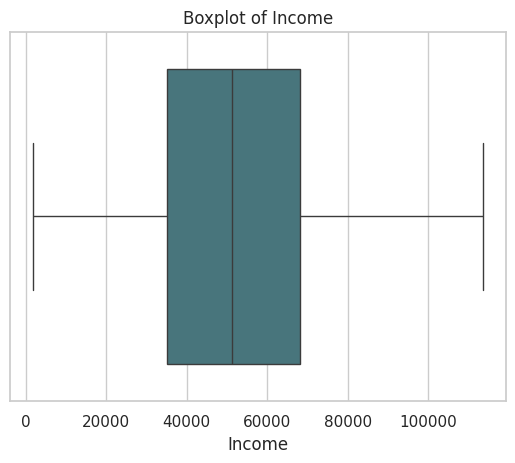

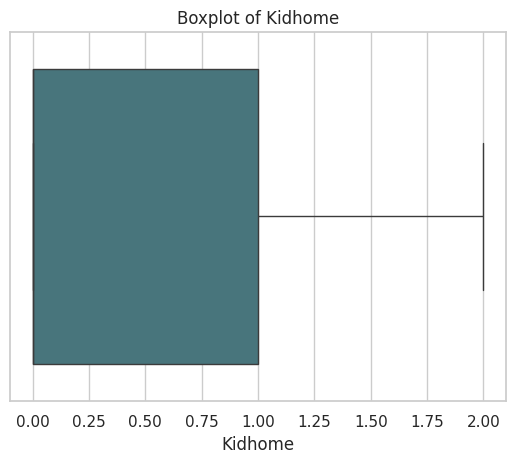

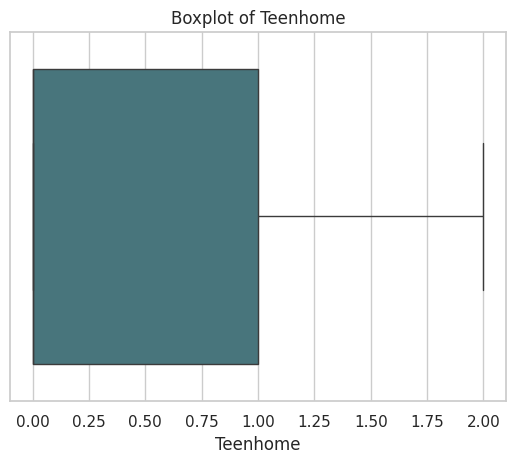

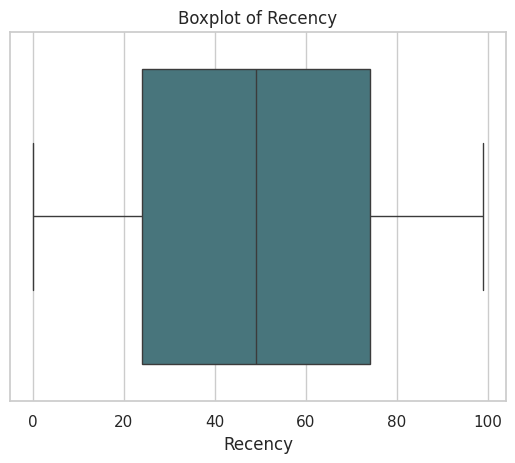

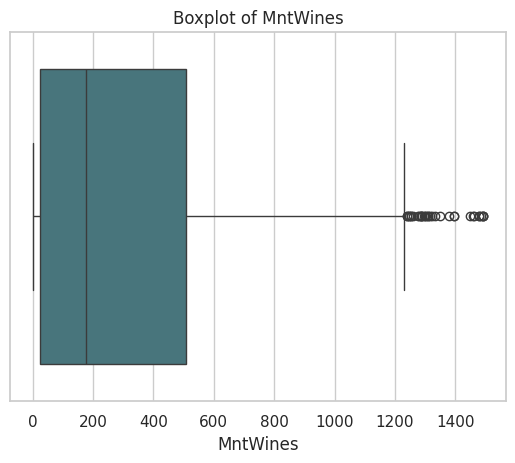

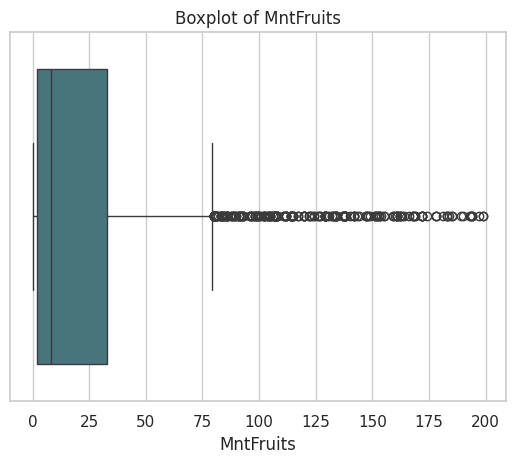

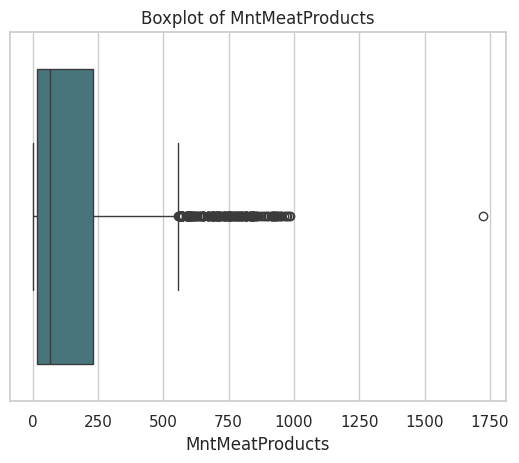

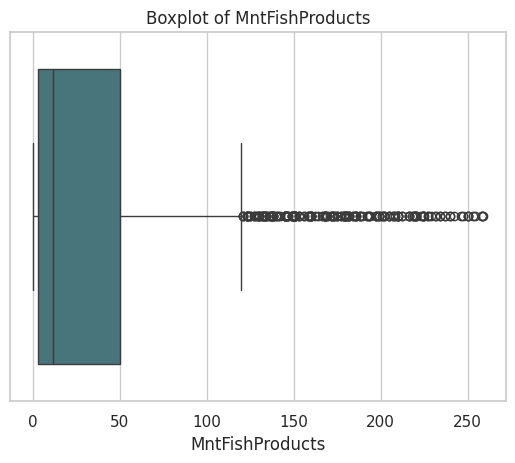

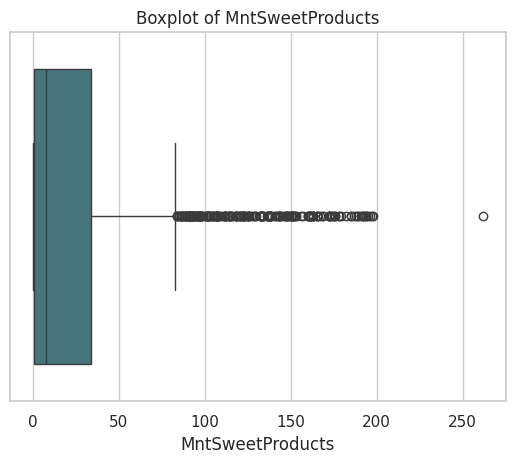

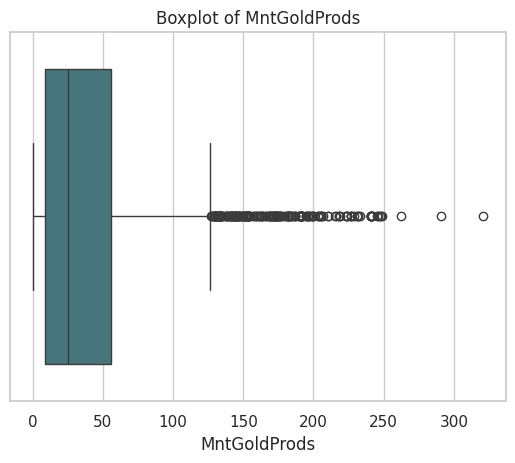

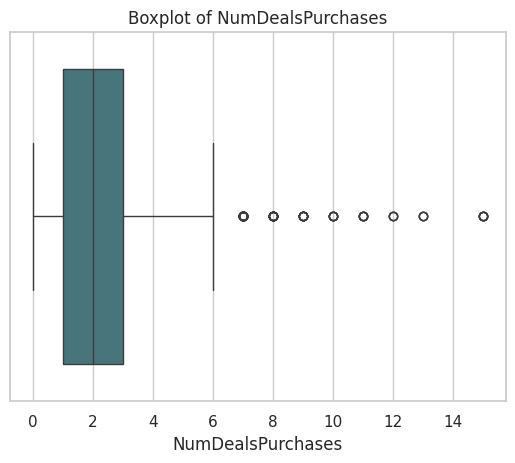

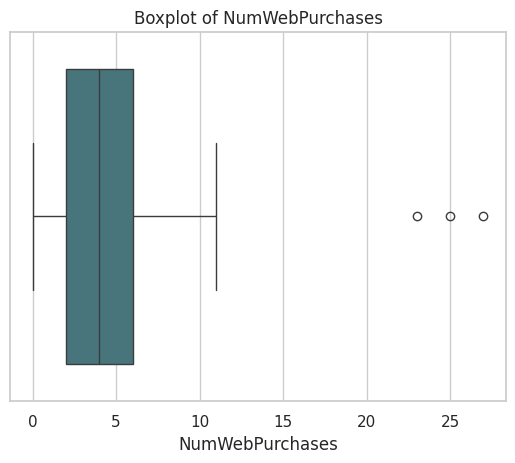

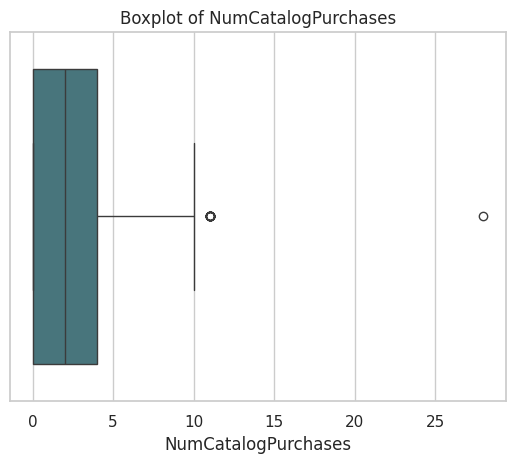

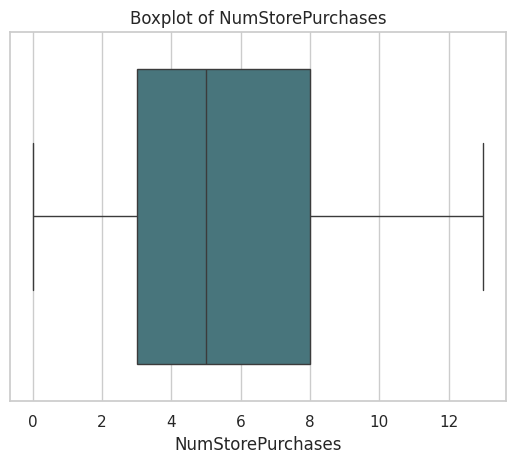

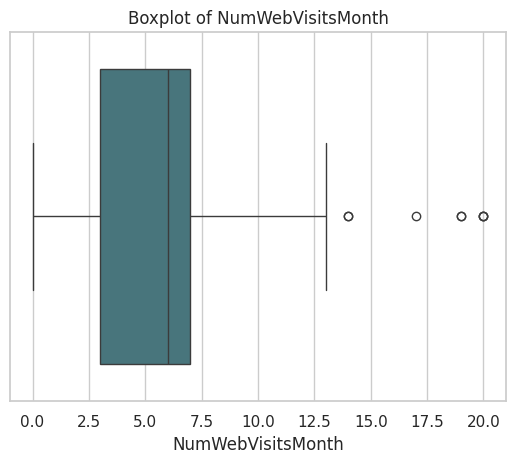

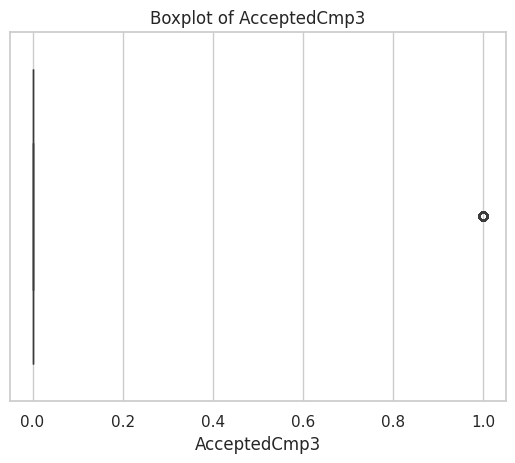

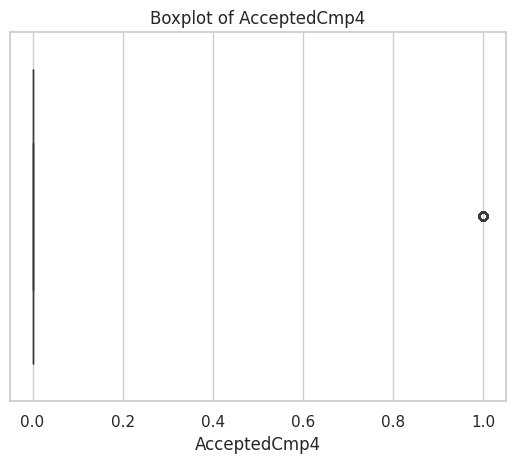

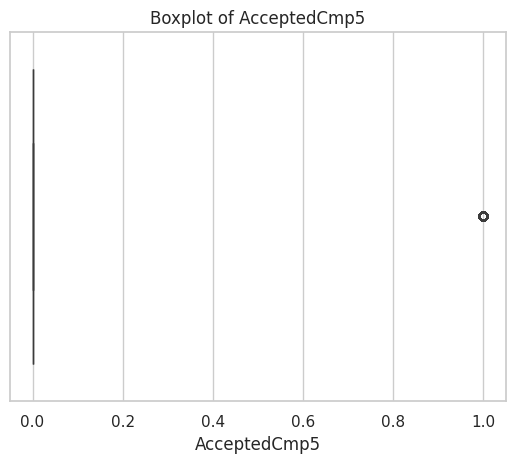

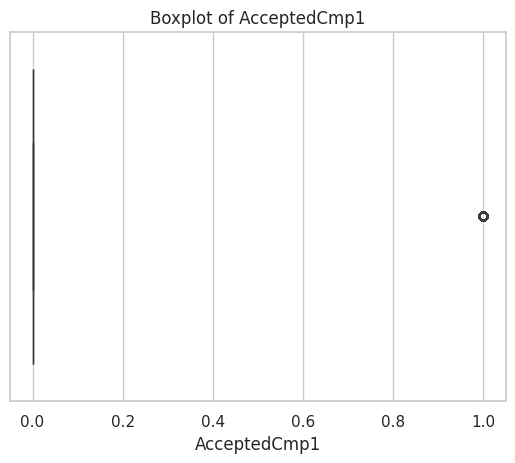

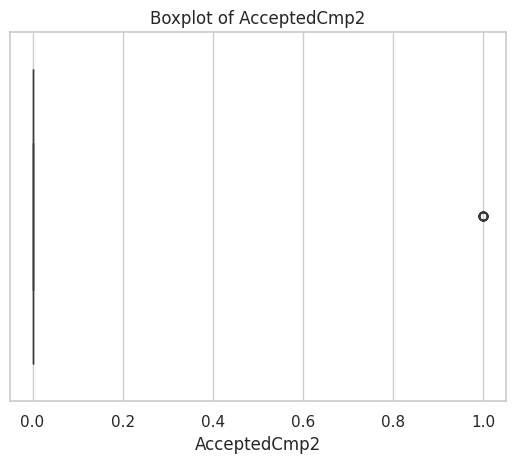

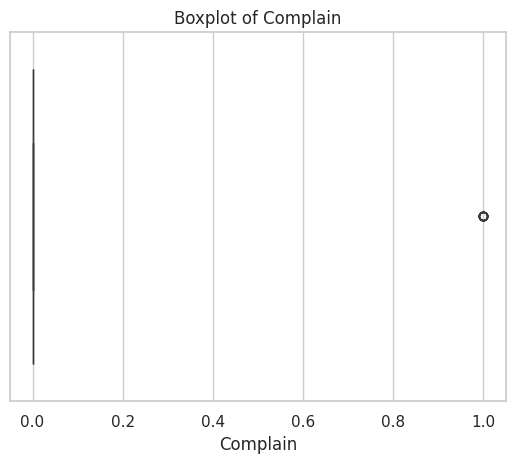

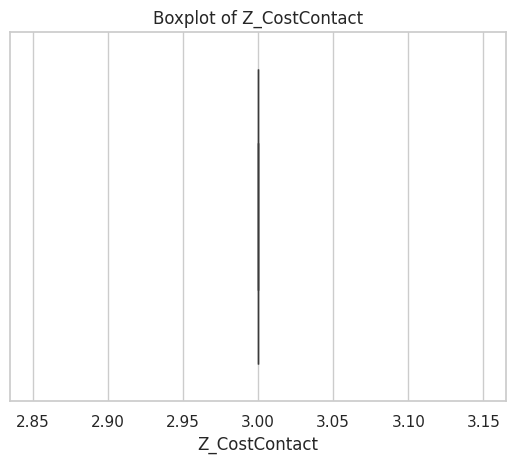

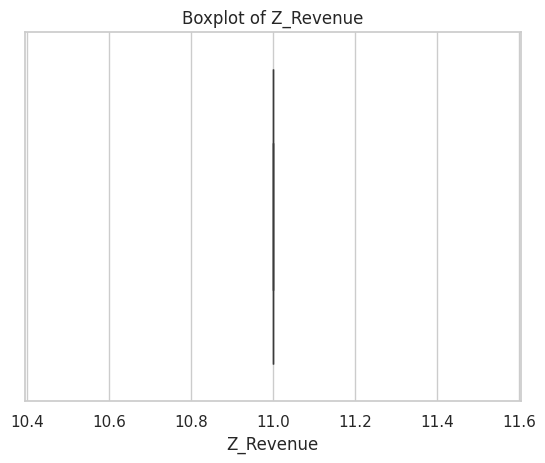

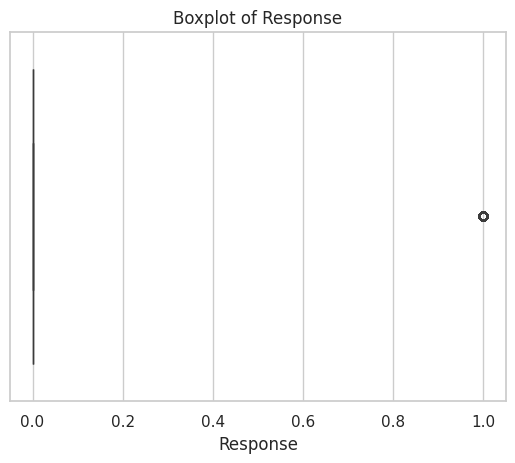

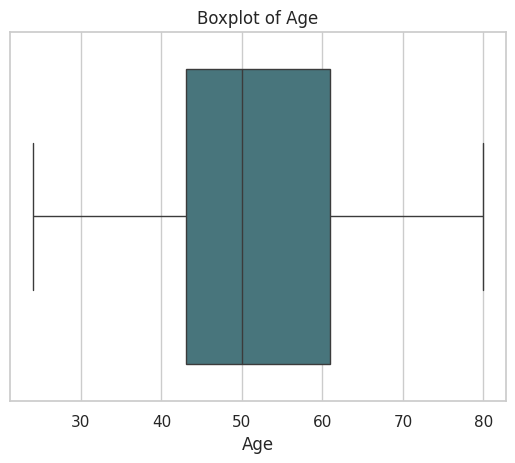

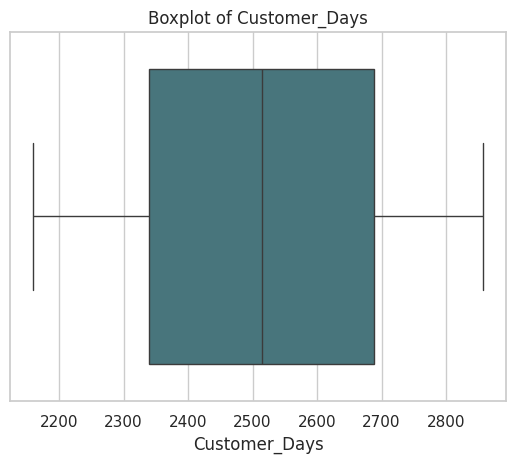

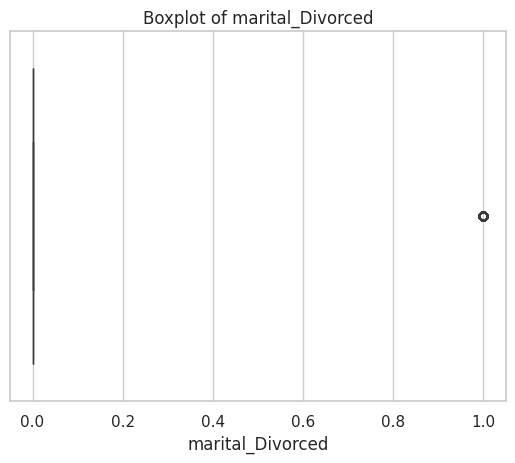

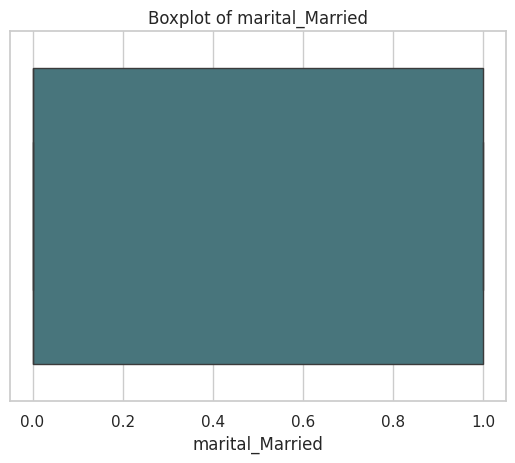

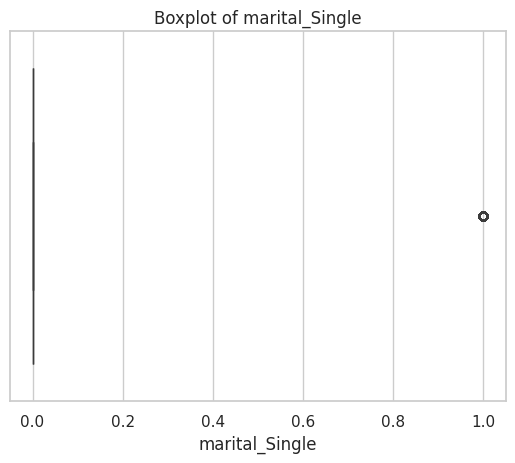

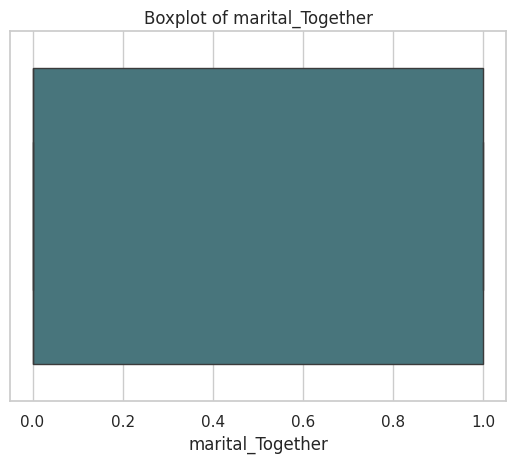

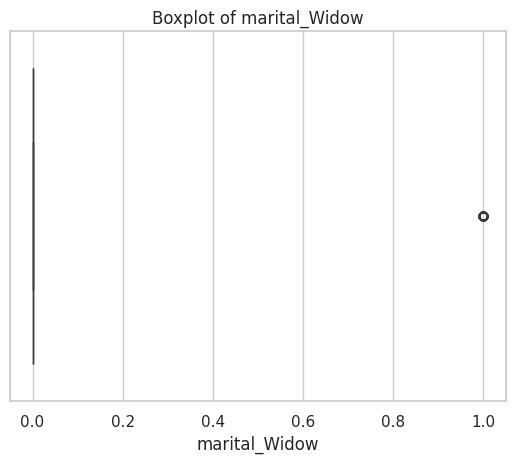

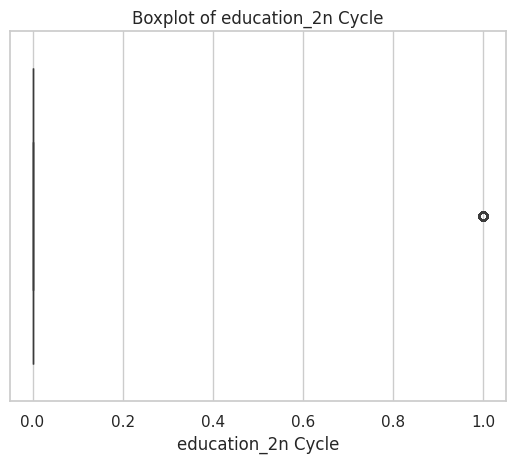

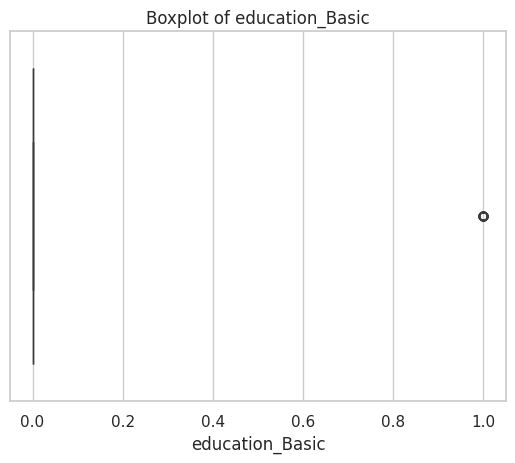

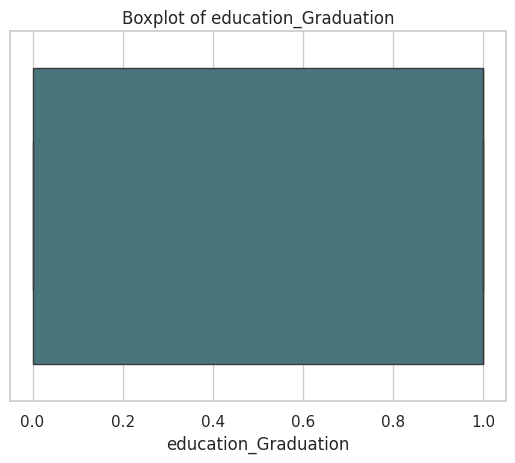

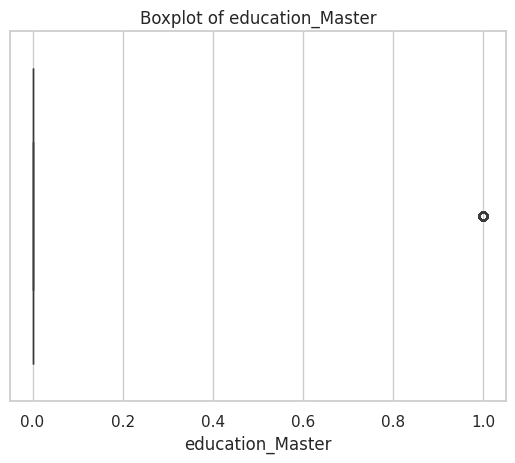

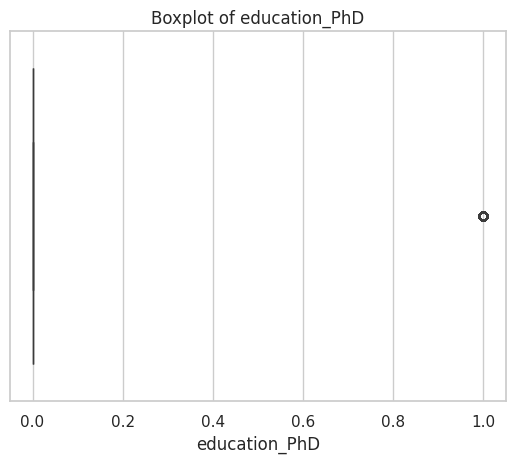

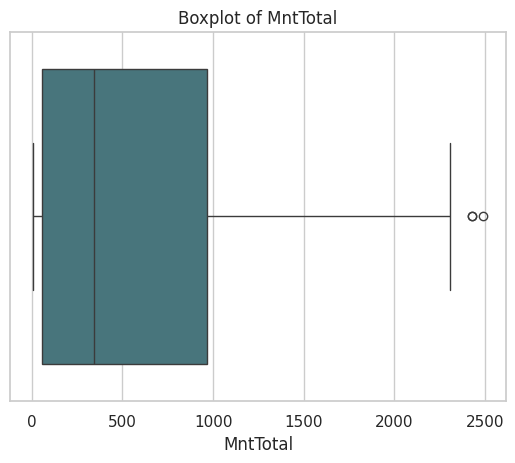

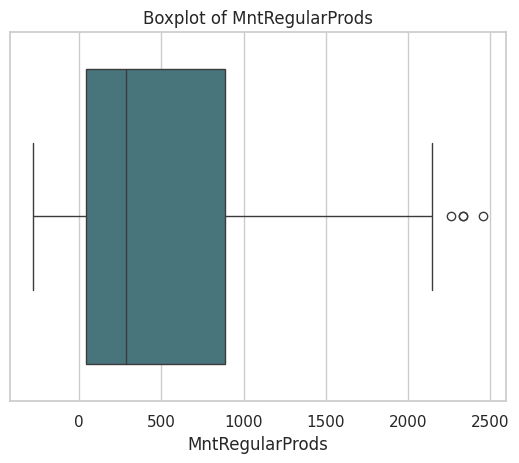

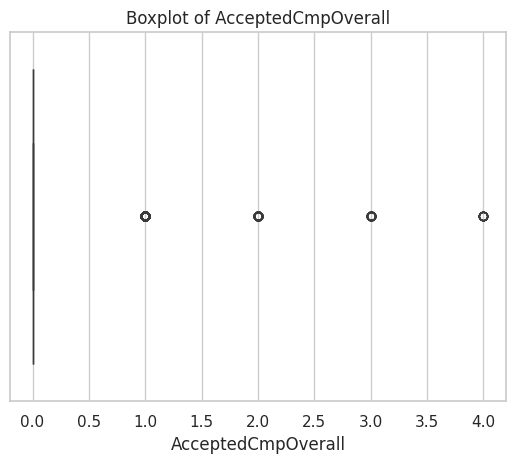

In [ ]:
int_float_cols = df.select_dtypes(include=['int','float']).columns

for col in int_float_cols:
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# **1. Observations: MntWines**

**1. Key Insights:**

**Anomalies & Outliers:**

Range: 1,250 - 1,480$

**2. Normal Distribution Analysis:**

Inter-Quartile Range (IQR):

Range: 30- 500

**3. Quartile Breakdown:**

Upper Quartile (Q3): 1,250

Lower Quartile (Q1): 45

Median: $190

**Analysis:**
The analysis of customer wine spending data reveals a wide range of expenditures, with a significant portion clustered between 30 and 500 dollars. However, a small number of high-value outliers were identified, potentially due to special occasions or bulk purchases. To gain a more accurate understanding of typical spending behavior, the interquartile range (IQR) was utilized, which excludes the influence of these outliers.


# **2. Observations: MntFruits**

**1. Key Insights:**

**Anomalies & Outliers:**

Range in $ : 78 - 200


**2. Normal Distribution Analysis:**


Inter-Quartile Range (IQR):
Range in $ : 5 - 28

**3. Quartile Breakdown:**

Upper Quartile (Q3): 78

Lower Quartile (Q1): 5

Median: 10

**Analysis:**

The analysis of customer fruit spending reveals a wide range of expenditures, with a significant portion clustered between 5 and 28. However, a small number of high-value outliers were identified, potentially due to bulk purchases, seasonal fluctuations, special events, dietary preferences, or household size. To ensure accurate forecasting, it is recommended to address these outliers by either removing them or analyzing them separately. The interquartile range (IQR) provides a reliable estimate of typical spending behavior, excluding the impact of extreme values.

#**3 .observations:  MntMeatProducts**

**1. Key Insights:**

**Anomalies & Outliers:**

Range: 550 - 1650

**2. Normal Distribution Analysis:**

Inter-Quartile Range (IQR):

Range: 5 - 240


**3. Quartile Breakdown**

Upper Quartile (Q3): 240

Lower Quartile (Q1): 0

Median: 75

**Analysis:**

The analysis of customer meat spending reveals a wide range of expenditures, with a significant portion clustered between 5 and 240 per week. However, a small number of high-value outliers were identified, potentially due to bulk purchases, special events, or dietary preferences. To ensure accurate forecasting, it is recommended to address these outliers by either removing them or analyzing them separately. The interquartile range (IQR) provides a reliable estimate of typical spending behavior, excluding the impact of extreme values.



# **4. Observations: MntFishProducts**

**1. Key Insights:**

Anomalies & Outliers:
Range: 120 - 260
2. Normal Distribution Analysis:

Inter-Quartile Range (IQR):
Range: 5 - 50
3. Quartile Breakdown:

Upper Quartile (Q3): 119
Lower Quartile (Q1): 0
Median: 13

**Analysis:**

The analysis of customer fish spending reveals a wide range of expenditures, with a significant portion clustered between 5 and 50 per week. However, a small number of high-value outliers were identified, potentially due to bulk purchases, special events, or dietary preferences. To ensure accurate forecasting, it is recommended to address these outliers by either removing them or analyzing them separately. The interquartile range (IQR) provides a reliable estimate of typical spending behavior, excluding the impact of extreme values.



# **5. Observations: MntsweetProducts**

1. Key Insights:

Anomalies & Outliers:
Range: 85 - 260
2. Normal Distribution Analysis:

Inter-Quartile Range (IQR):
Range: 1 - 40
3. Quartile Breakdown:

Upper Quartile (Q3): 84
Lower Quartile (Q1): 0
Median: $10

**Analysis:**

The analysis of customer sweet spending reveals a wide range of expenditures, with a significant portion clustered between $1 and $40 per week. However, a small number of high-value outliers were identified, potentially due to bulk purchases, special events, or dietary preferences. To ensure accurate forecasting, it is recommended to address these outliers by either removing them or analyzing them separately. The interquartile range (IQR) provides a reliable estimate of typical spending behavior, excluding the impact of extreme values.

# **6. Observations: MntgoldProducts**

1. Key Insights:

Anomalies & Outliers:
Range: 125 - 325
2. Normal Distribution Analysis:

Inter-Quartile Range (IQR):
Range: 8 - 55
3. Quartile Breakdown:

Upper Quartile (Q3): 124
Lower Quartile (Q1): 0
Median: $25

Analysis:

The analysis of customer gold spending reveals a wide range of expenditures, with a significant portion clustered between $8 and $55 per week. However, a small number of high-value outliers were identified, potentially due to bulk purchases, special events, or investment purposes. To ensure accurate forecasting, it is recommended to address these outliers by either removing them or analyzing them separately. The interquartile range (IQR) provides a reliable estimate of typical spending behavior, excluding the impact of extreme values.


# **7. Observations: numofdealspurchases**
1. Key Insights:

Anomalies & Outliers:
Range: 7 - 15
2. Normal Distribution Analysis:

Inter-Quartile Range (IQR):
Range: 1 - 3

3. Quartile Breakdown:

Upper Quartile boundry (Q3): 6
Lower Quartile boundry (Q1): 0

Median: 2

Analysis:

The analysis of customer deal purchases reveals a relatively concentrated range, with most customers engaging in 1 to 3 deals per period. However, a small number of high-value outliers were identified, potentially indicating a segment of customers with significantly higher engagement levels. To ensure accurate forecasting, it is recommended to address these outliers by either removing them or analyzing them separately. The interquartile range (IQR) provides a reliable estimate of typical deal purchase behavior, excluding the impact of extreme values.


# **8. Observations: numwebpurchases**

1. Key Insights:

Anomalies & Outliers:

Range: 20 - 30

2. Normal Distribution Analysis:

Inter-Quartile Range (IQR):

Range: 1 - 6

3. Quartile Breakdown:

Upper Quartile Boundary (Q3): 11
Lower Quartile Boundary (Q1): 0

Median: 4

Analysis:
Customer engagement in web purchases reveals that most customers make between 1 and 6 purchases, with a median of 4. However, there are significant outliers with purchase counts ranging from 20 to 30. These high-frequency outliers may distort predictive models and may be indicative of a small segment of highly engaged customers. To ensure precise forecasting, it is recommended to either exclude these outliers or analyze them separately. The IQR helps in understanding typical web purchase behavior and can guide the development of strategies to target frequent purchasers.

# **8. Observations: numofdealspurchases**

1. Key Insights:

Anomalies & Outliers:

Range: 10 - 30

2. Normal Distribution Analysis:

Inter-Quartile Range (IQR):
Range: 0 - 4

3. Quartile Breakdown:

Upper Quartile Boundary (Q3): 10
Lower Quartile Boundary (Q1): 0

Median: 3

Analysis:

Customer behavior in catalog purchases shows that the majority make between 0 and 4 purchases, with a median of 3. Significant outliers, with purchase counts ranging from 10 to 30, may distort the analysis and could represent a small group of highly engaged customers. To ensure accuracy in predictive modeling, it is advisable to exclude or separately analyze these high-frequency outliers. The IQR provides a solid basis for understanding typical catalog purchase behavior and can guide strategies for targeting and engaging with frequent catalog purchasers.


# **9. Observations: numwebvisits**

1. Key Insights:

Anomalies & Outliers:
Range: 13 - 20
2. Normal Distribution Analysis:

Inter-Quartile Range (IQR):
Range: 2.6 - 7.4
3. Quartile Breakdown:

Upper Quartile Boundary (Q3): 12.6
Lower Quartile Boundary (Q1): 0
Median: 6
Analysis:
Customer web visit behavior shows a majority visiting between 2.6 and 7.4 times, with a median of 6 visits. Significant outliers, with visit counts ranging from 13 to 20, indicate a small group of highly engaged users. These outliers can skew predictive models, so it is recommended to either exclude these extreme values or analyze them separately. The IQR offers a clear view of typical web visit patterns, which can inform strategies to better engage with the core customer base and address the needs of highly active users.


# **10. Observations: mnttotal**
1. Key Insights:

Anomalies & Outliers:
Range: 2,500 - 22,500
2. Normal Distribution Analysis:

Inter-Quartile Range (IQR):
Range: 10 - 990
3. Quartile Breakdown:

Upper Quartile Boundary (Q3): 2,400
Lower Quartile Boundary (Q1): 0
Median: 400
Analysis:
Customer spending on total products reveals a broad range of behavior. Most customers spend between 10 and 990, with a median expenditure of 400. Significant outliers, with spending ranging from 2,500 to 22,500, suggest a small segment of high-value purchasers. These outliers may skew predictive models and should be analyzed separately or excluded to maintain accuracy. The IQR provides a solid understanding of typical spending patterns, which can help in developing targeted marketing strategies and promotions.


# **11. Observations: mnttotal**

1. Key Insights:

Anomalies & Outliers:
Range: 2,100 - 2,500
2. Normal Distribution Analysis:

Inter-Quartile Range (IQR):
Range: 5 - 900
3. Quartile Breakdown:

Upper Quartile Boundary (Q3): 2,100
Lower Quartile Boundary (Q1): 0 (corrected to reflect accurate boundaries)
Median: 300
Analysis:
Customer spending on regular products shows a wide range, with most spending between 5 and 900 and a median expenditure of $300. Significant outliers, with spending ranging from 2,100 to 2,500, indicate a segment of high-value customers whose spending behavior may skew predictive models. To ensure accuracy in forecasting, it is advisable to either exclude or separately analyze these high-value outliers. The IQR provides a clear view of typical spending behavior and can inform targeted marketing and promotional strategies.

# **Dealing with outliers by imputing the mode( most recurring value ) of the column**

Column: Income
Q1 = 35196.0
Q3 = 68281.0
IQR = 33085.0
Upper bound value = 117908.5
Lower bound value = -14431.5


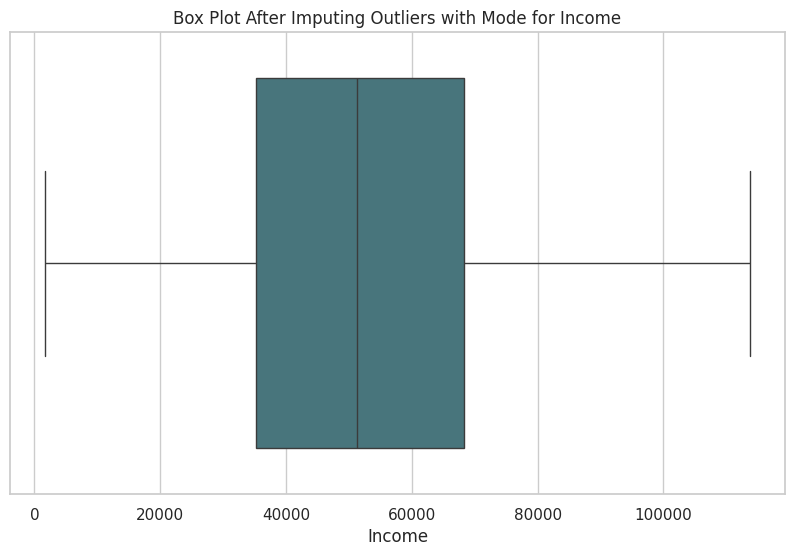

Column: Kidhome
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
Upper bound value = 2.5
Lower bound value = -1.5


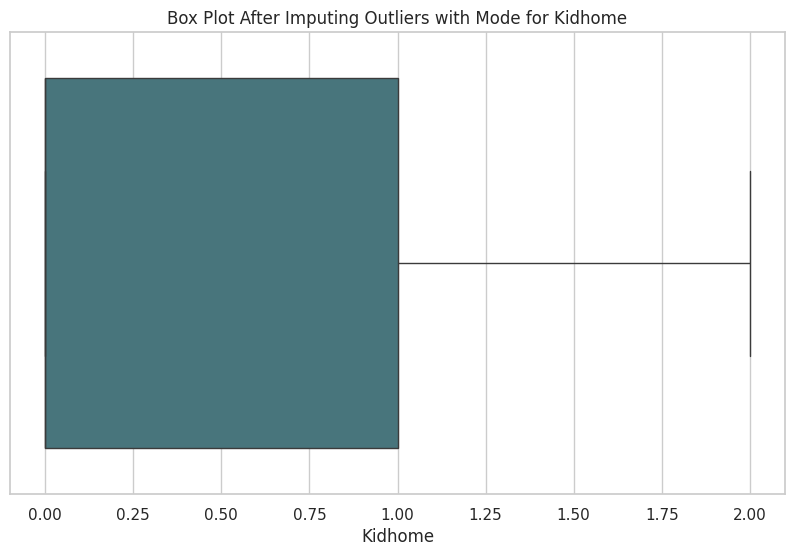

Column: Teenhome
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
Upper bound value = 2.5
Lower bound value = -1.5


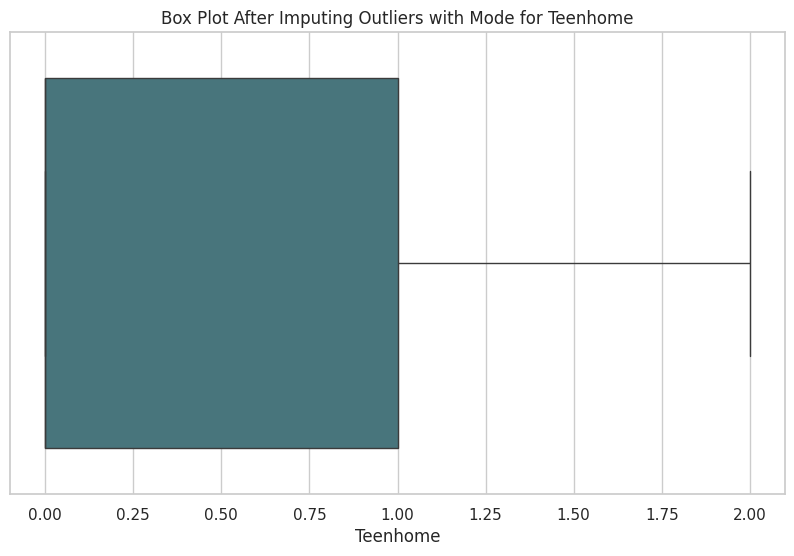

Column: Recency
Q1 = 24.0
Q3 = 74.0
IQR = 50.0
Upper bound value = 149.0
Lower bound value = -51.0


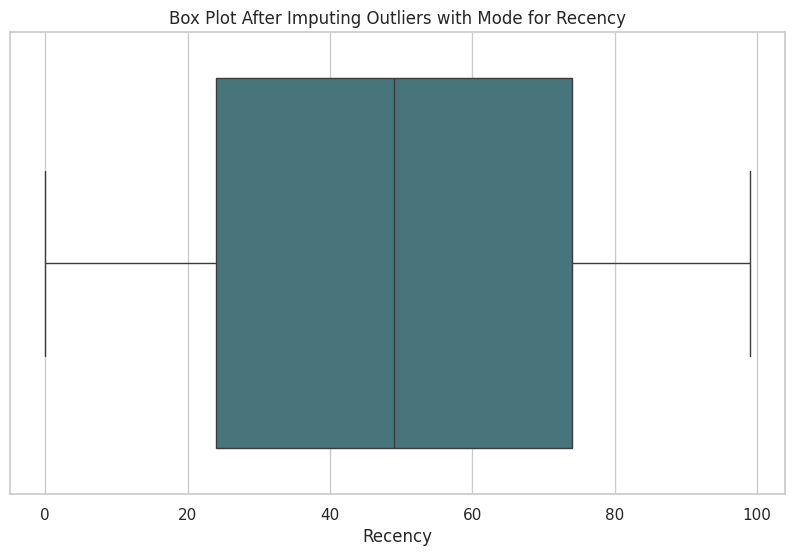

Column: MntWines
Q1 = 24.0
Q3 = 507.0
IQR = 483.0
Upper bound value = 1231.5
Lower bound value = -700.5


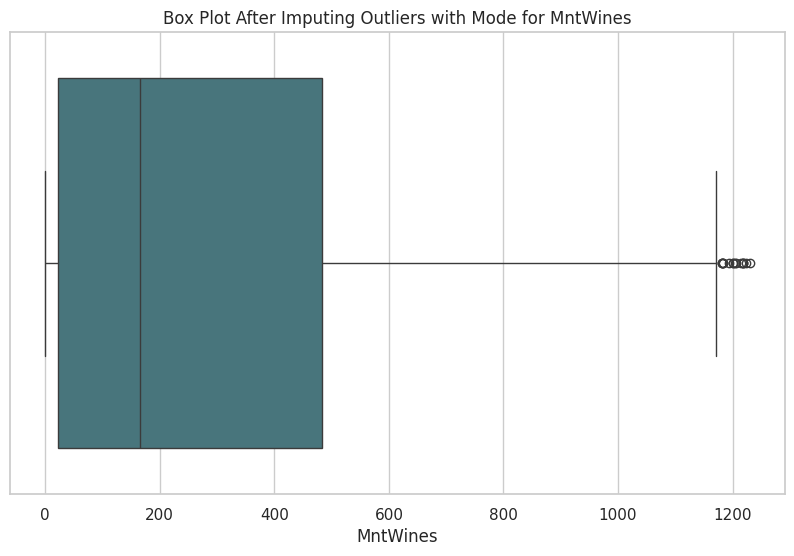

Column: MntFruits
Q1 = 2.0
Q3 = 33.0
IQR = 31.0
Upper bound value = 79.5
Lower bound value = -44.5


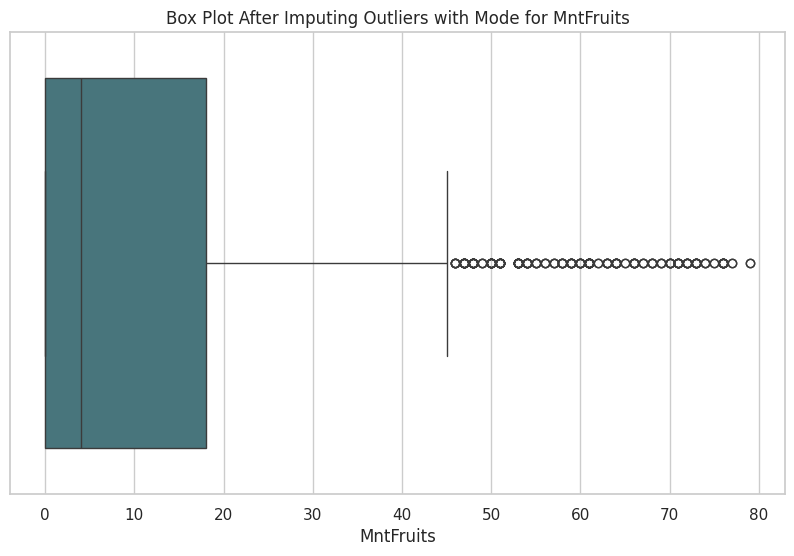

Column: MntMeatProducts
Q1 = 16.0
Q3 = 232.0
IQR = 216.0
Upper bound value = 556.0
Lower bound value = -308.0


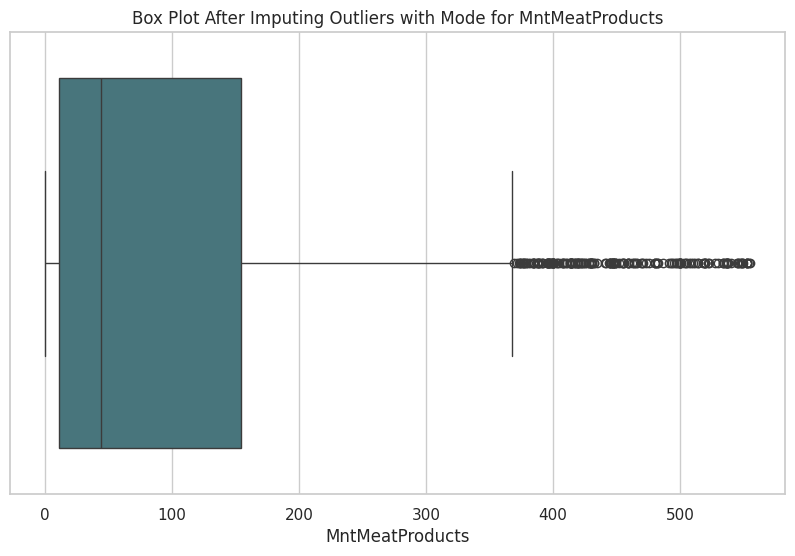

Column: MntFishProducts
Q1 = 3.0
Q3 = 50.0
IQR = 47.0
Upper bound value = 120.5
Lower bound value = -67.5


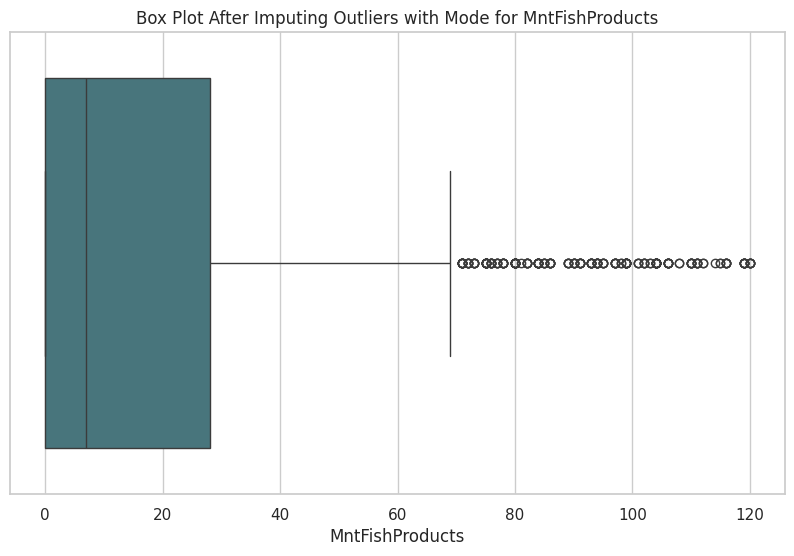

Column: MntSweetProducts
Q1 = 1.0
Q3 = 34.0
IQR = 33.0
Upper bound value = 83.5
Lower bound value = -48.5


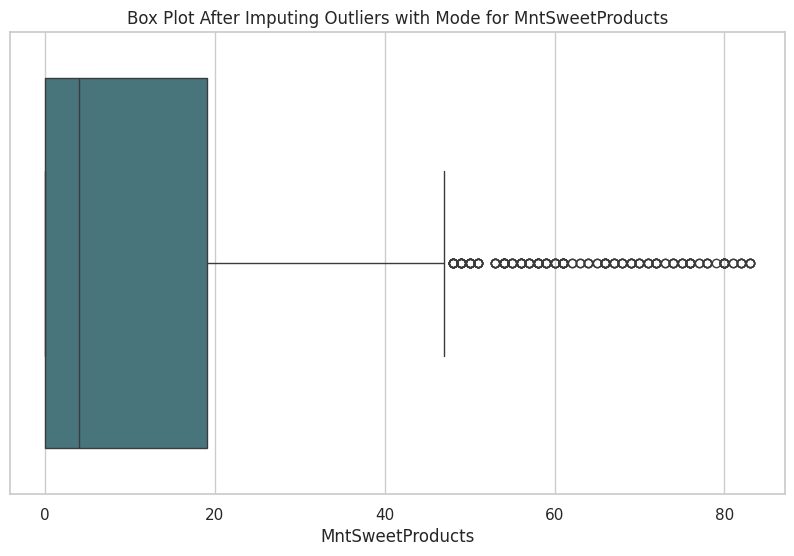

Column: MntGoldProds
Q1 = 9.0
Q3 = 56.0
IQR = 47.0
Upper bound value = 126.5
Lower bound value = -61.5


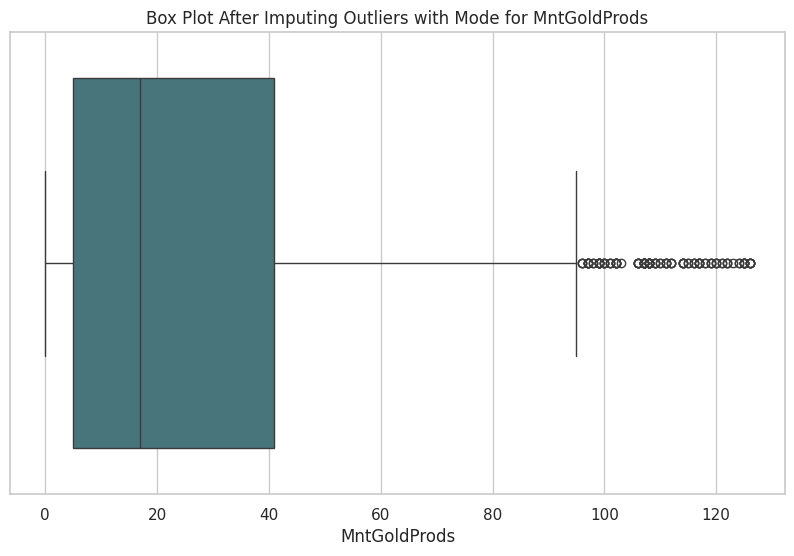

Column: NumDealsPurchases
Q1 = 1.0
Q3 = 3.0
IQR = 2.0
Upper bound value = 6.0
Lower bound value = -2.0


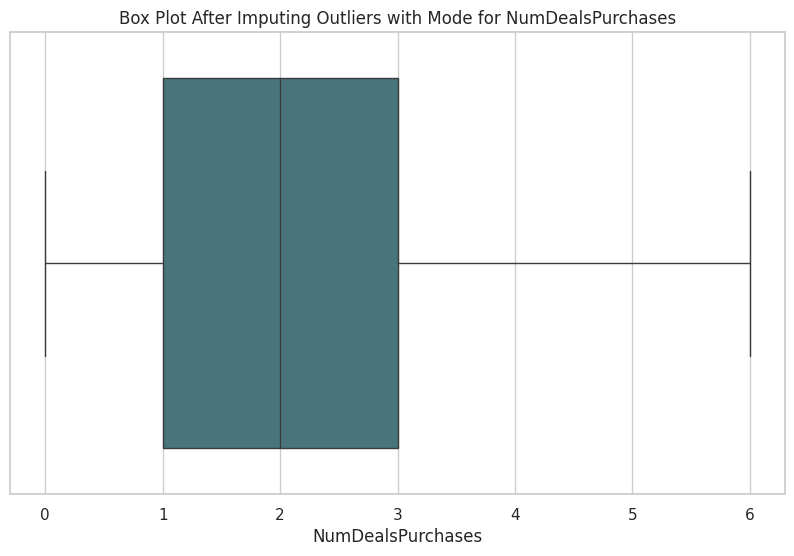

Column: NumWebPurchases
Q1 = 2.0
Q3 = 6.0
IQR = 4.0
Upper bound value = 12.0
Lower bound value = -4.0


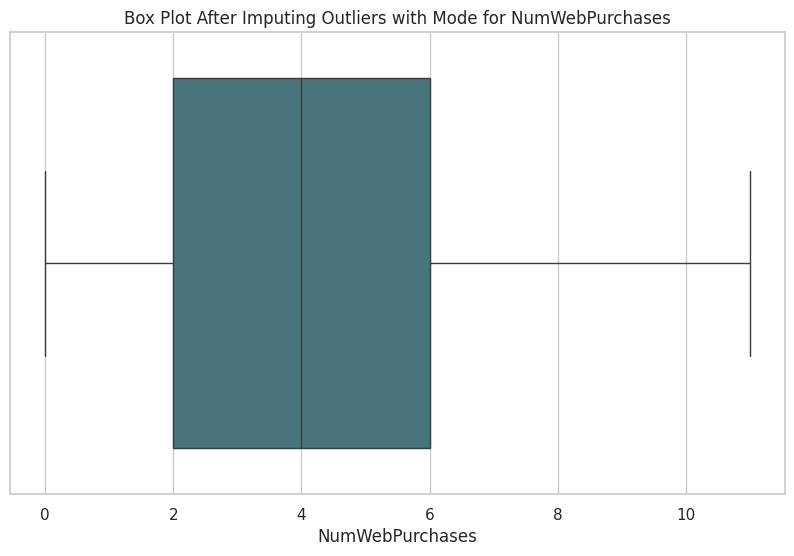

Column: NumCatalogPurchases
Q1 = 0.0
Q3 = 4.0
IQR = 4.0
Upper bound value = 10.0
Lower bound value = -6.0


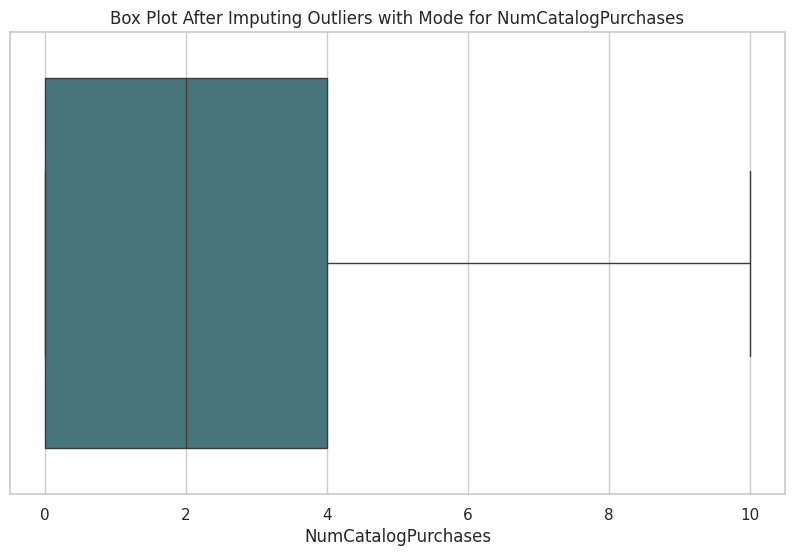

Column: NumStorePurchases
Q1 = 3.0
Q3 = 8.0
IQR = 5.0
Upper bound value = 15.5
Lower bound value = -4.5


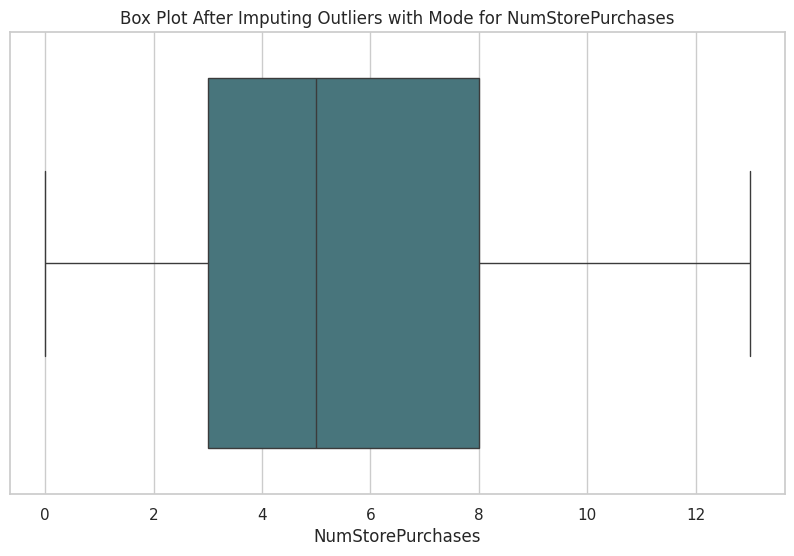

Column: NumWebVisitsMonth
Q1 = 3.0
Q3 = 7.0
IQR = 4.0
Upper bound value = 13.0
Lower bound value = -3.0


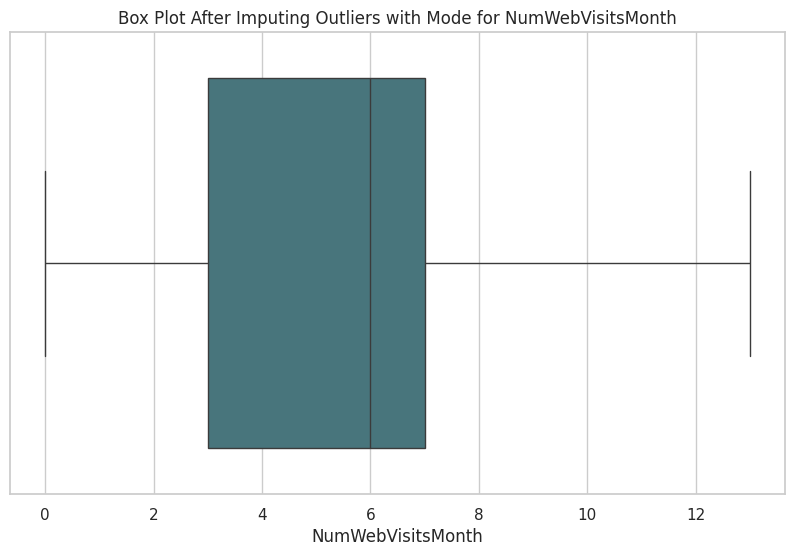

Column: MntTotal
Q1 = 56.0
Q3 = 964.0
IQR = 908.0
Upper bound value = 2326.0
Lower bound value = -1306.0


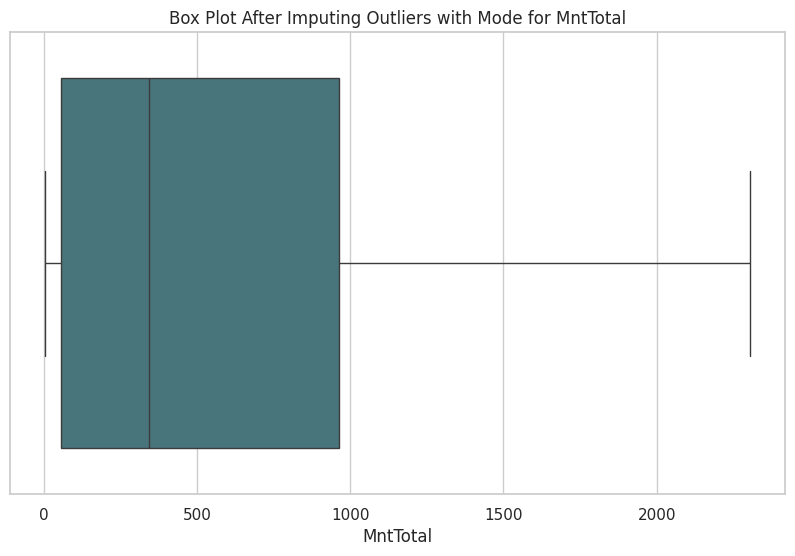

Column: MntRegularProds
Q1 = 42.0
Q3 = 884.0
IQR = 842.0
Upper bound value = 2147.0
Lower bound value = -1221.0


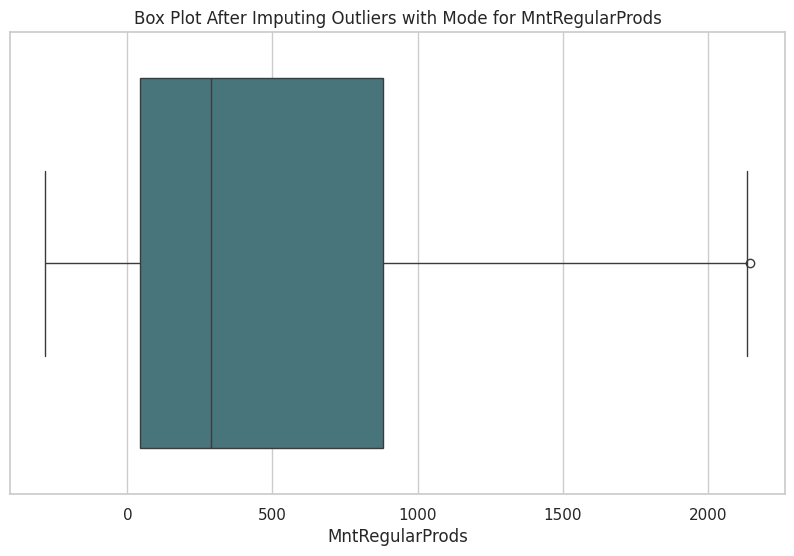

In [ ]:
selected_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                    'MntTotal', 'MntRegularProds']

for column in selected_columns:

    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)


    IQR = Q3 - Q1
    print(f"Column: {column}")
    print(f"Q1 = {Q1}")
    print(f"Q3 = {Q3}")
    print(f"IQR = {IQR}")


    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR


    print(f"Upper bound value = {upper_bound}")
    print(f"Lower bound value = {lower_bound}")


    mode_value = df_no_outliers[column].mode()[0]
    df_no_outliers[column] = df_no_outliers[column].apply(
        lambda x: mode_value if x < lower_bound or x > upper_bound else x
    )

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_no_outliers[column])
    plt.title(f'Box Plot After Imputing Outliers with Mode for {column}')
    plt.show()


# **Dealing with remaining outliers through caping**

Column: Income
Q1 = 35196.0
Q3 = 68281.0
IQR = 33085.0
Upper bound value = 117908.5
Lower bound value = -14431.5


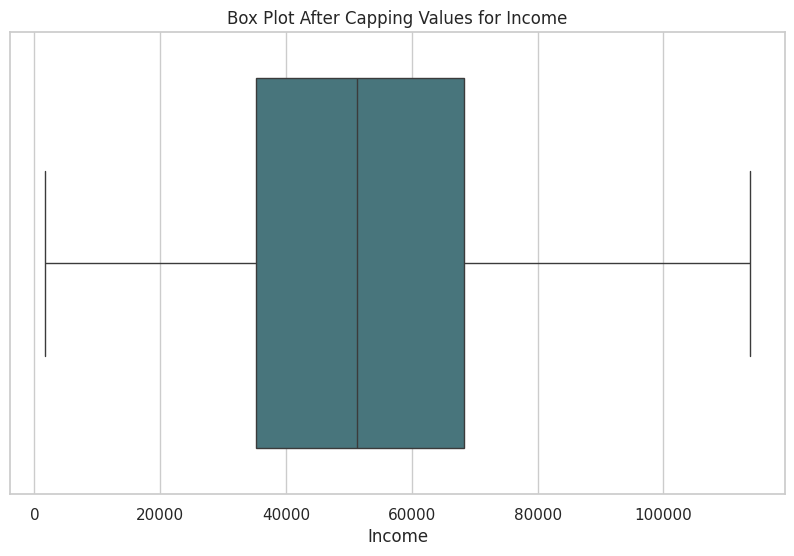

Column: Kidhome
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
Upper bound value = 2.5
Lower bound value = -1.5


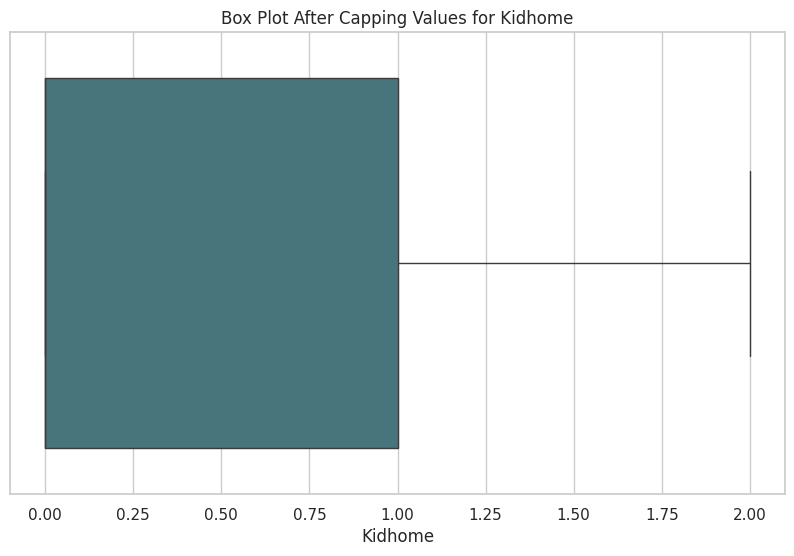

Column: Teenhome
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
Upper bound value = 2.5
Lower bound value = -1.5


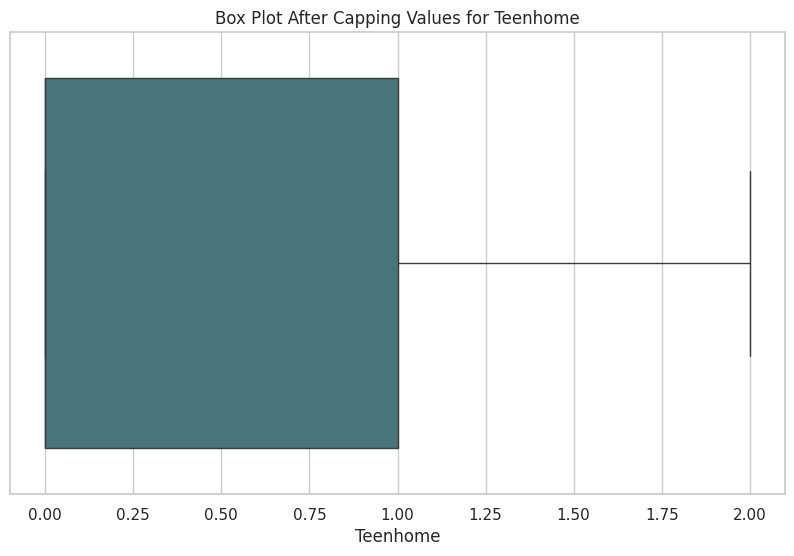

Column: Recency
Q1 = 24.0
Q3 = 74.0
IQR = 50.0
Upper bound value = 149.0
Lower bound value = -51.0


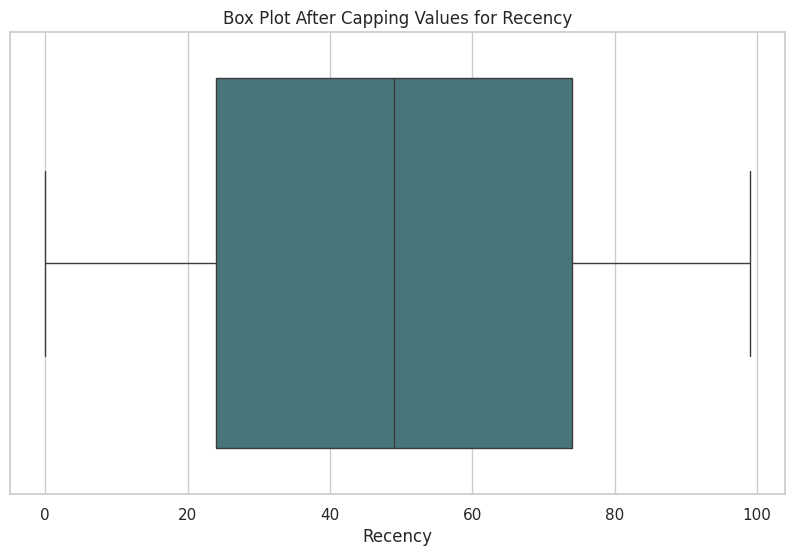

Column: MntWines
Q1 = 22.0
Q3 = 483.0
IQR = 461.0
Upper bound value = 1174.5
Lower bound value = -669.5


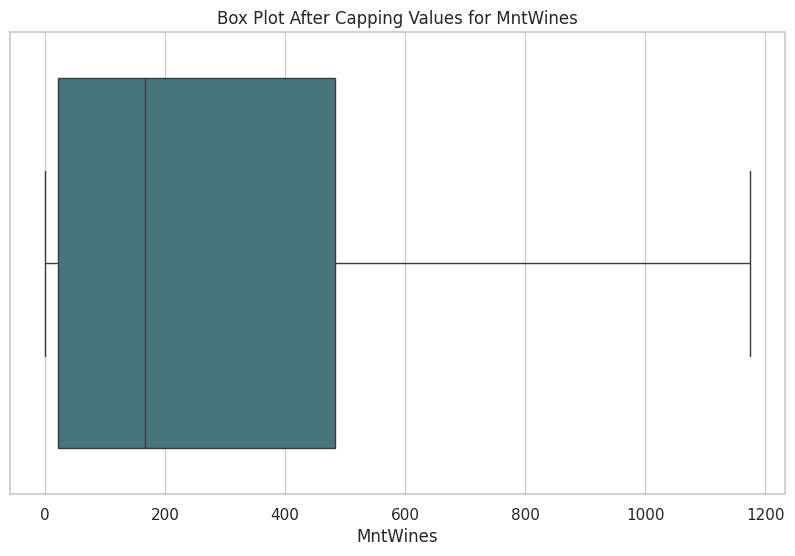

Column: MntFruits
Q1 = 0.0
Q3 = 18.0
IQR = 18.0
Upper bound value = 45.0
Lower bound value = -27.0


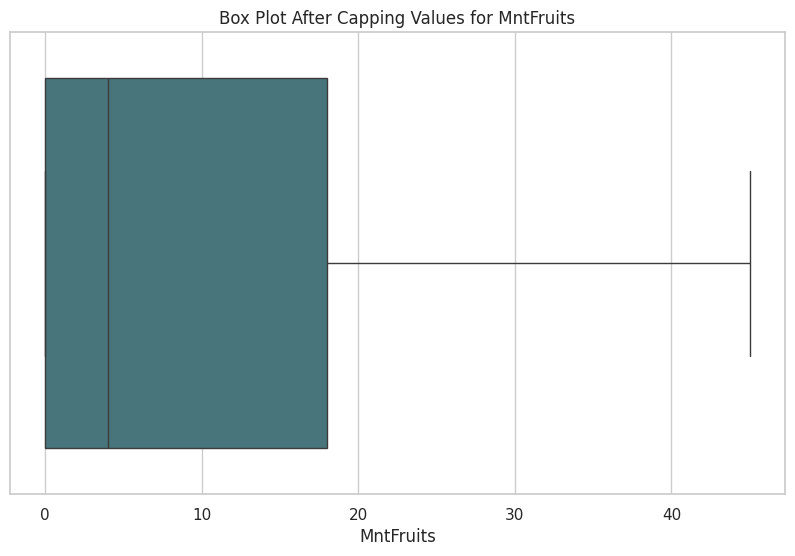

Column: MntMeatProducts
Q1 = 11.0
Q3 = 154.0
IQR = 143.0
Upper bound value = 368.5
Lower bound value = -203.5


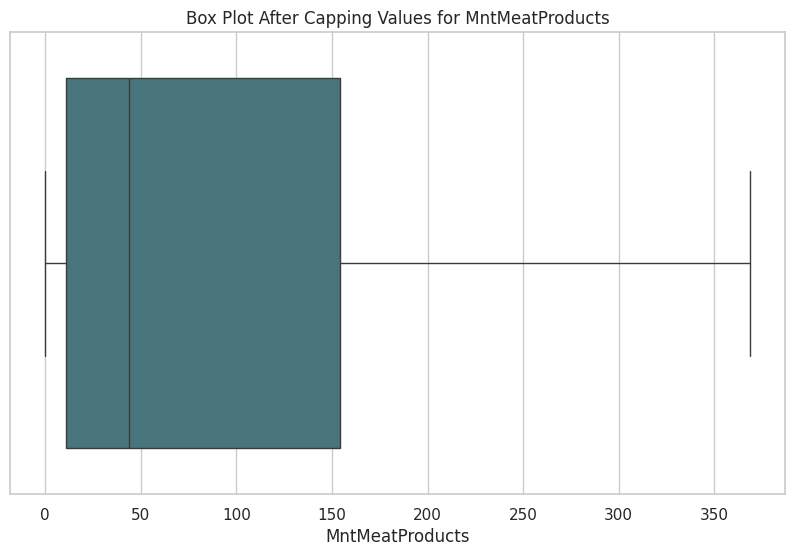

Column: MntFishProducts
Q1 = 0.0
Q3 = 28.0
IQR = 28.0
Upper bound value = 70.0
Lower bound value = -42.0


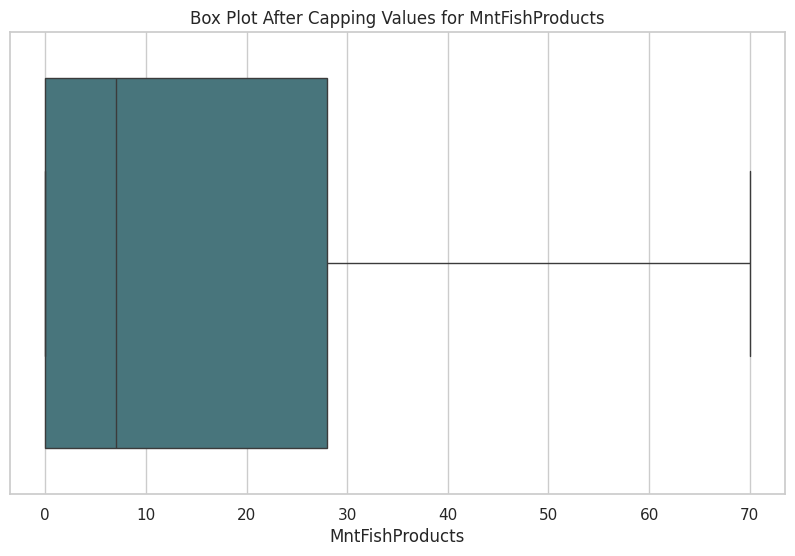

Column: MntSweetProducts
Q1 = 0.0
Q3 = 19.0
IQR = 19.0
Upper bound value = 47.5
Lower bound value = -28.5


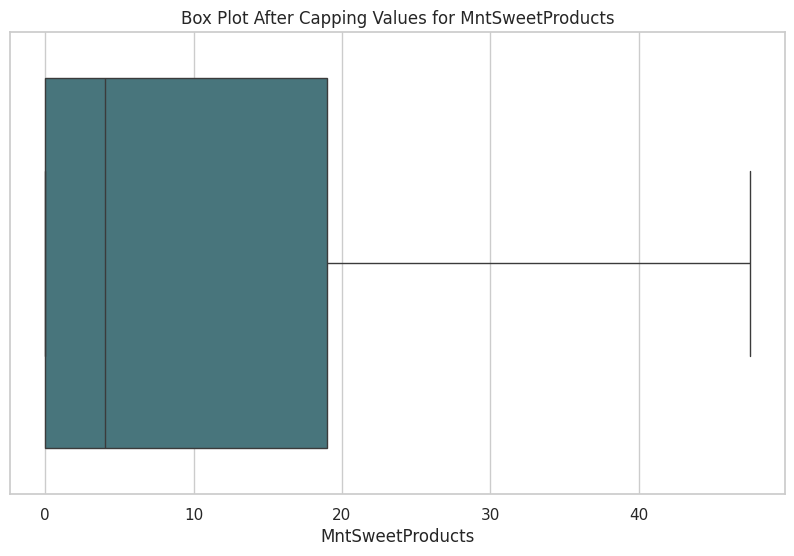

Column: MntGoldProds
Q1 = 5.0
Q3 = 41.0
IQR = 36.0
Upper bound value = 95.0
Lower bound value = -49.0


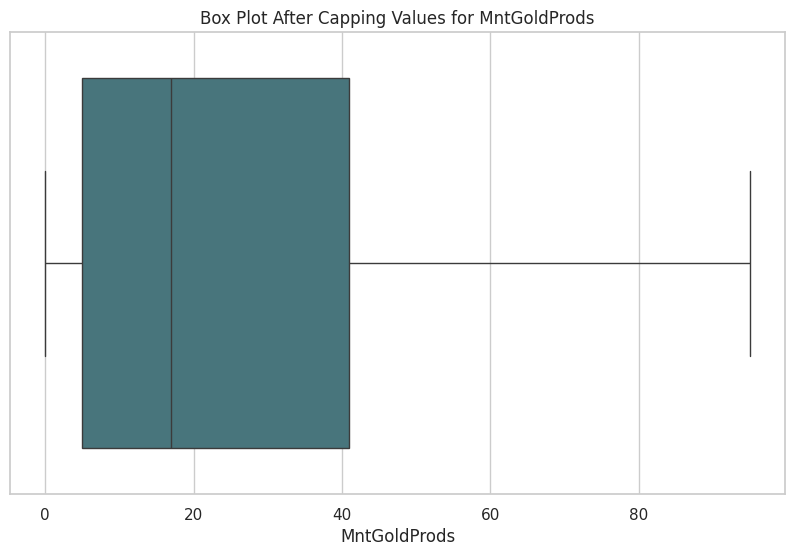

Column: NumDealsPurchases
Q1 = 1.0
Q3 = 3.0
IQR = 2.0
Upper bound value = 6.0
Lower bound value = -2.0


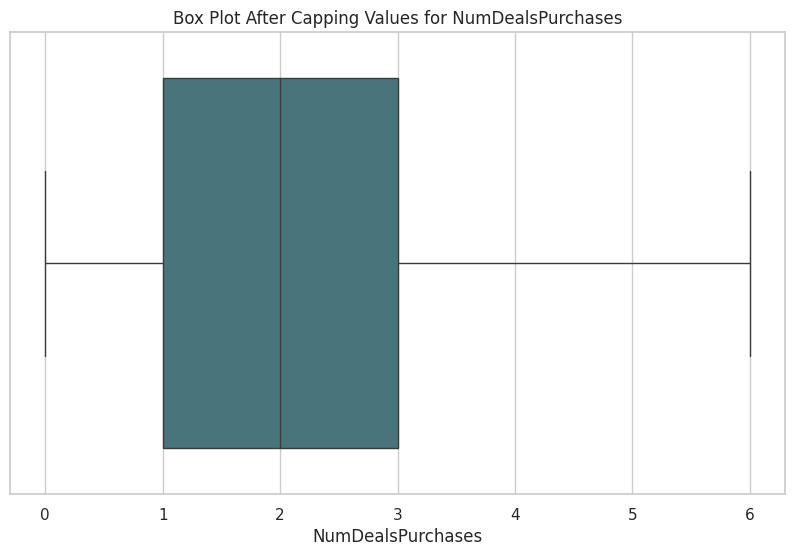

Column: NumWebPurchases
Q1 = 2.0
Q3 = 6.0
IQR = 4.0
Upper bound value = 12.0
Lower bound value = -4.0


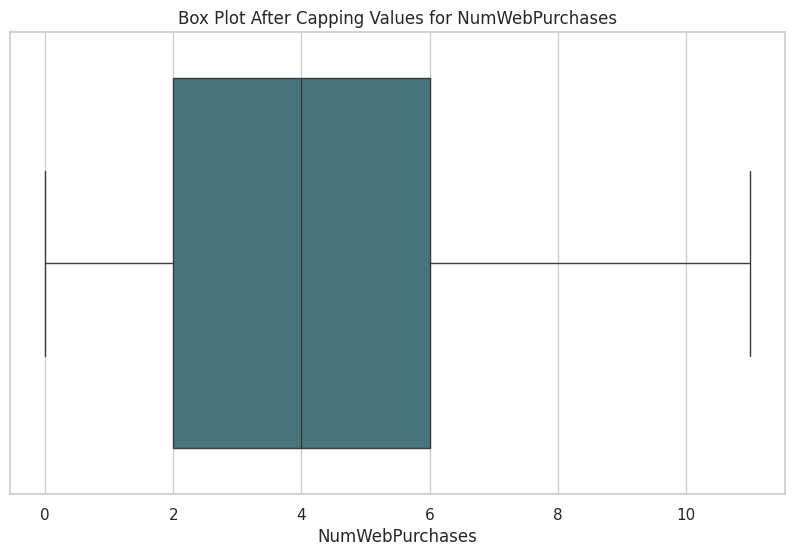

Column: NumCatalogPurchases
Q1 = 0.0
Q3 = 4.0
IQR = 4.0
Upper bound value = 10.0
Lower bound value = -6.0


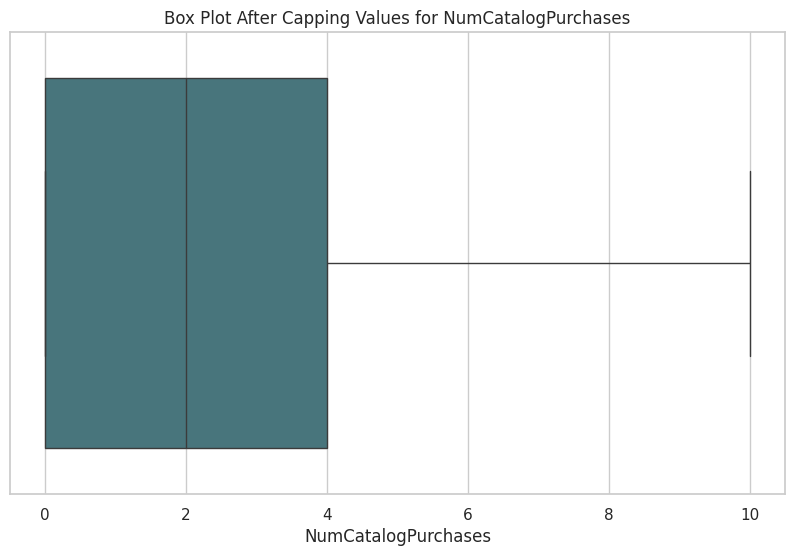

Column: NumStorePurchases
Q1 = 3.0
Q3 = 8.0
IQR = 5.0
Upper bound value = 15.5
Lower bound value = -4.5


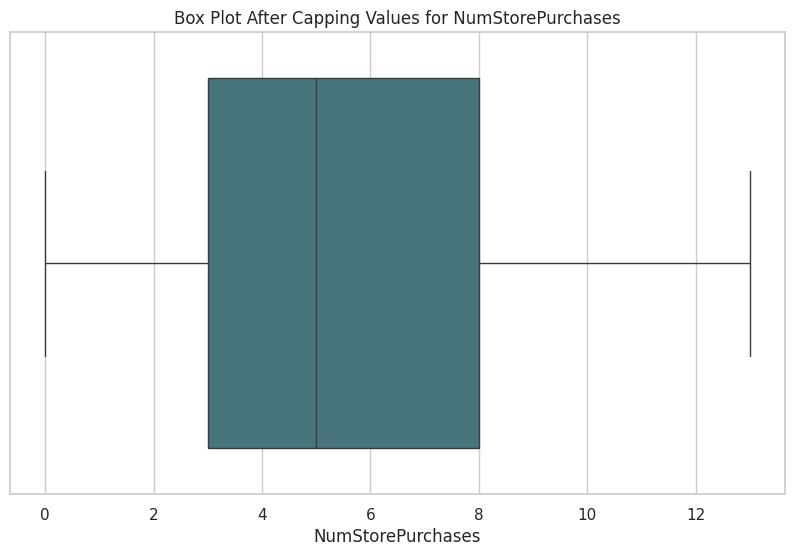

Column: NumWebVisitsMonth
Q1 = 3.0
Q3 = 7.0
IQR = 4.0
Upper bound value = 13.0
Lower bound value = -3.0


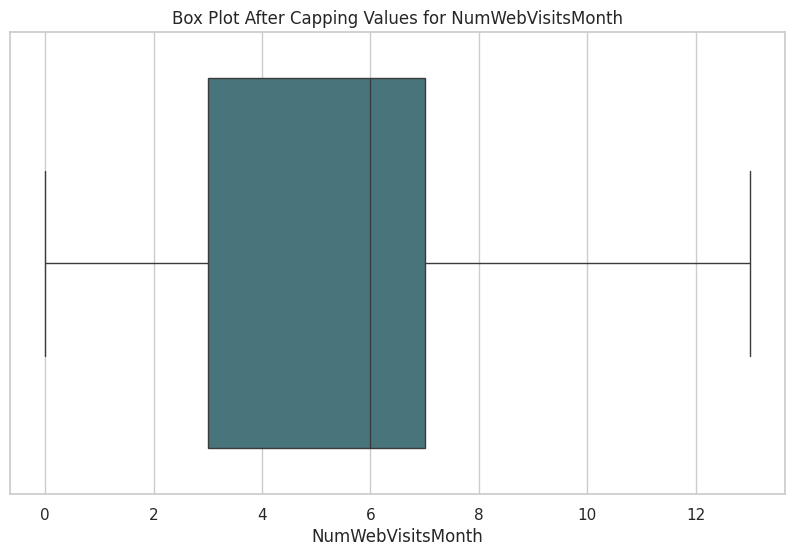

Column: MntTotal
Q1 = 55.0
Q3 = 962.0
IQR = 907.0
Upper bound value = 2322.5
Lower bound value = -1305.5


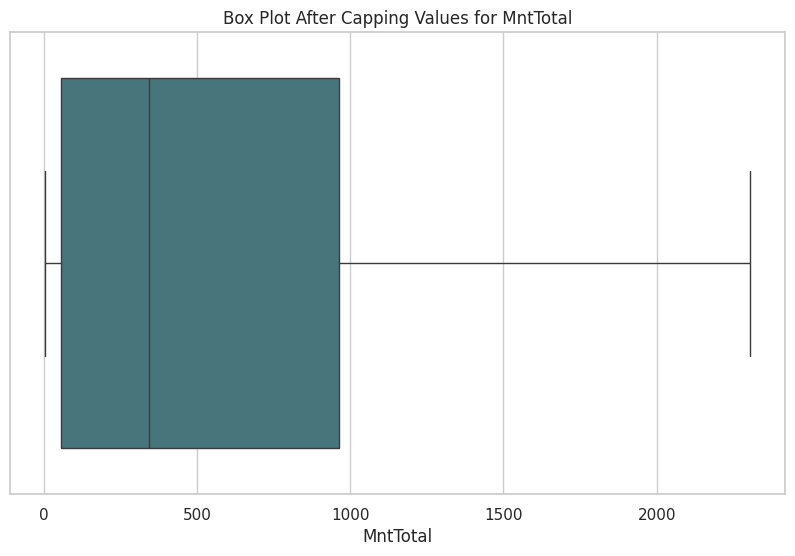

Column: MntRegularProds
Q1 = 42.0
Q3 = 880.0
IQR = 838.0
Upper bound value = 2137.0
Lower bound value = -1215.0


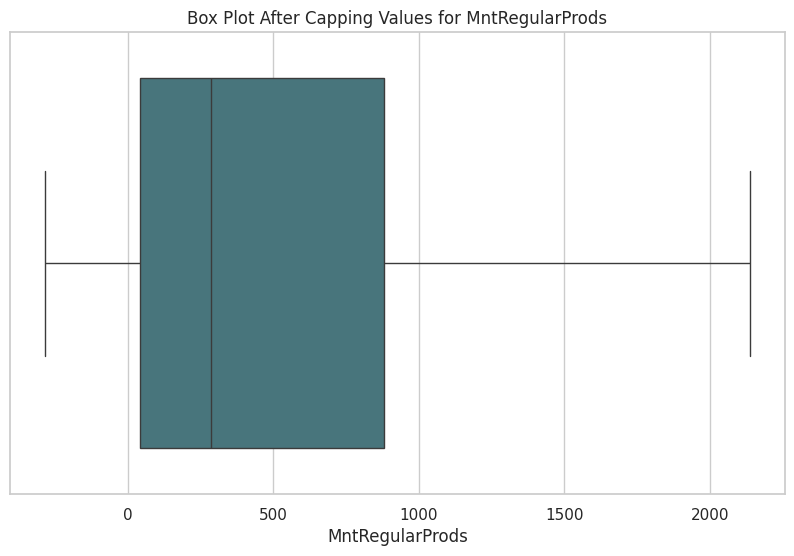

In [ ]:
selected_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                    'MntTotal', 'MntRegularProds']

for column in selected_columns:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)


    IQR = Q3 - Q1
    print(f"Column: {column}")
    print(f"Q1 = {Q1}")
    print(f"Q3 = {Q3}")
    print(f"IQR = {IQR}")

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Print outlier bounds
    print(f"Upper bound value = {upper_bound}")
    print(f"Lower bound value = {lower_bound}")

    # Caping the values
    df_no_outliers[column] = df_no_outliers[column].clip(lower_bound, upper_bound)

    # Plot the capped data
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_no_outliers[column])
    plt.title(f'Box Plot After Capping Values for {column}')
    plt.show()


# **Visualizing data with no outliers**

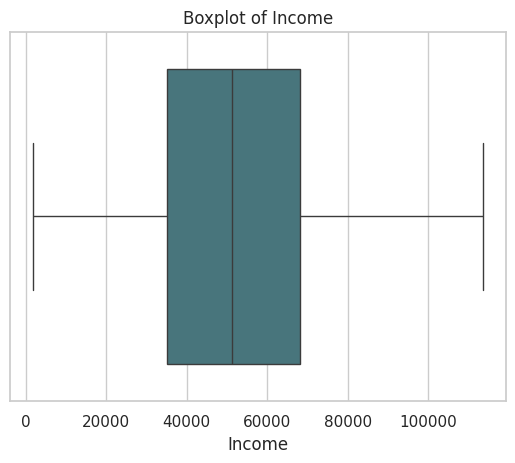

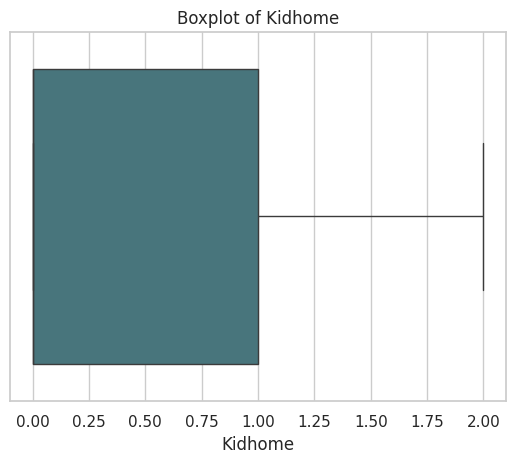

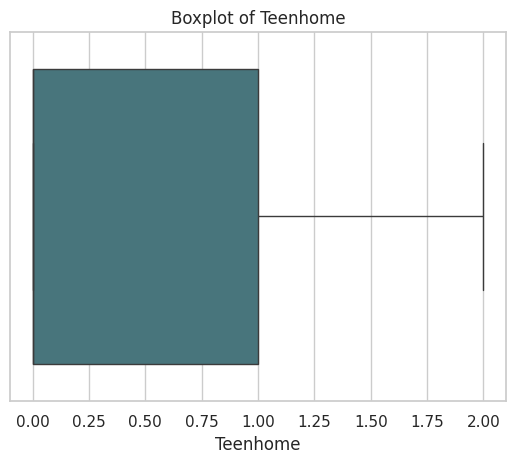

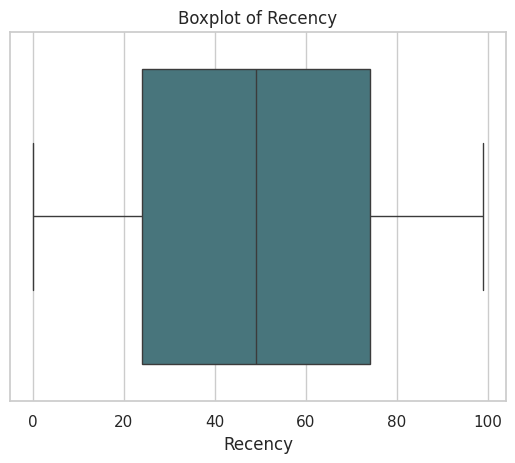

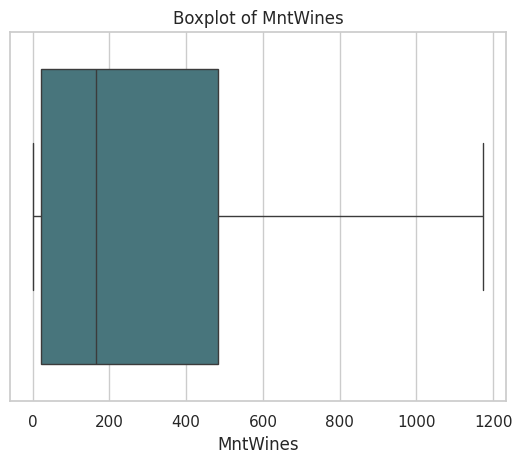

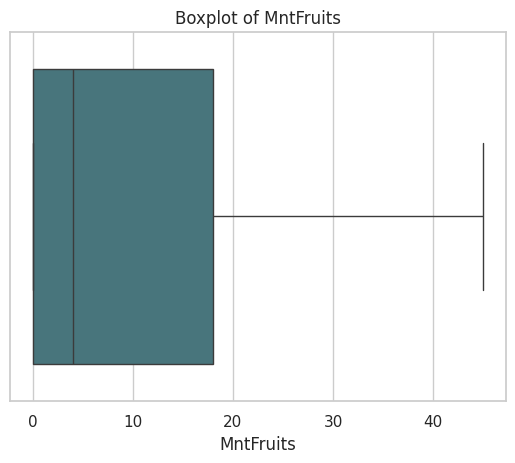

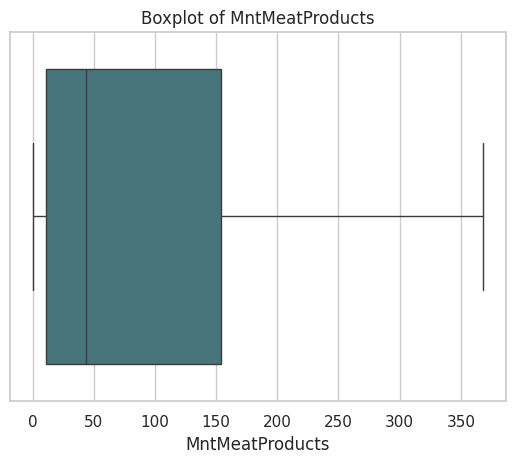

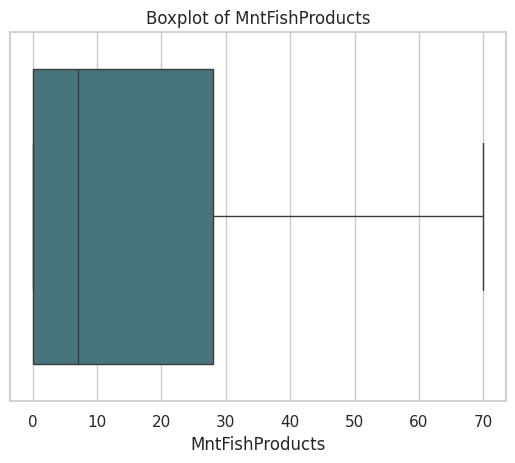

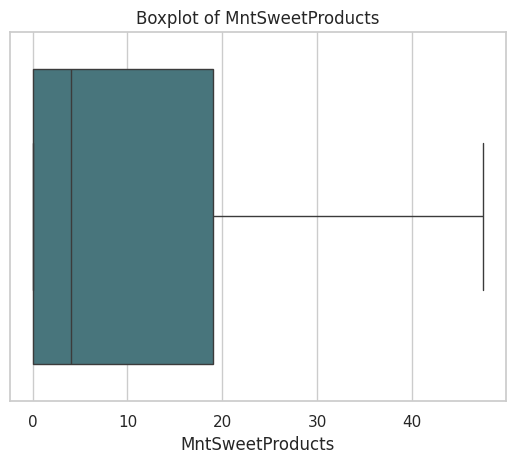

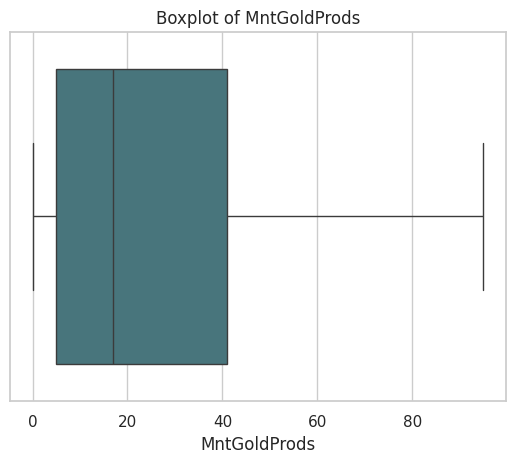

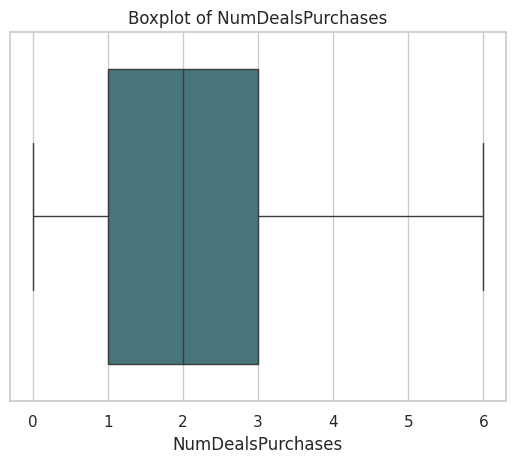

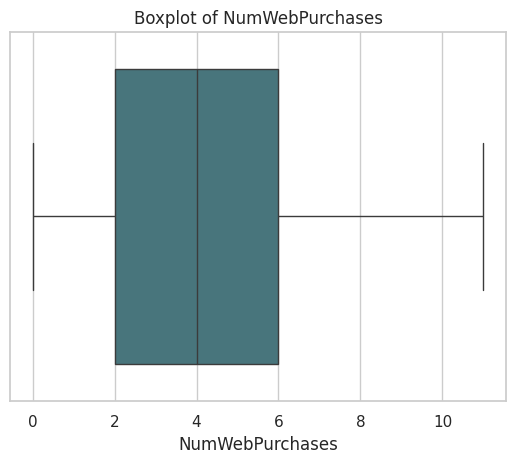

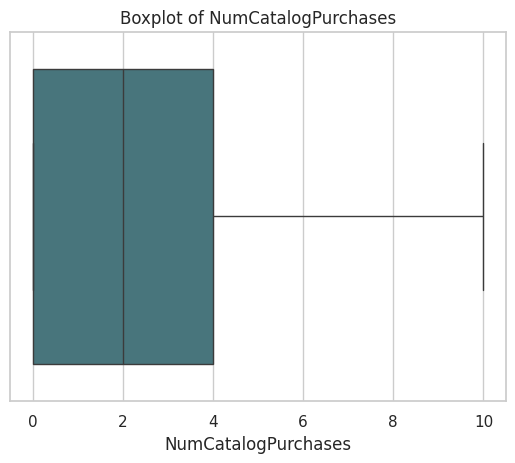

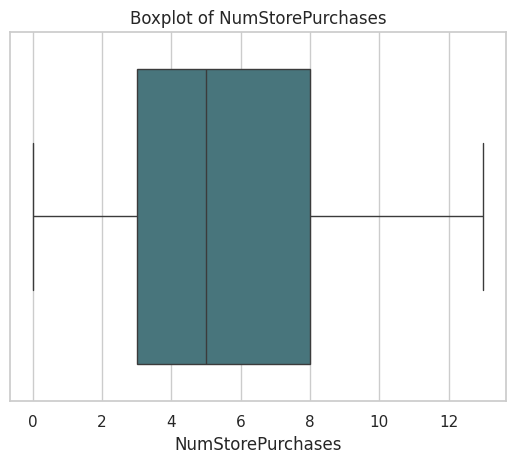

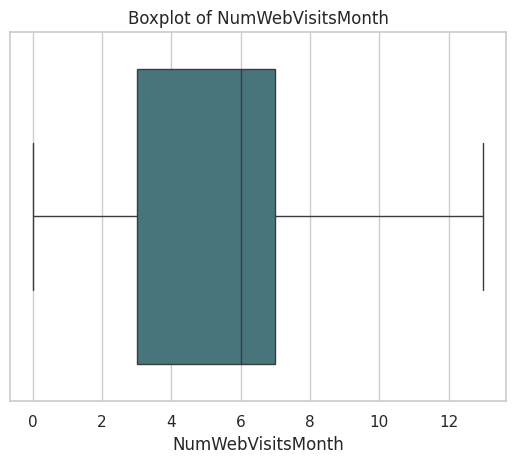

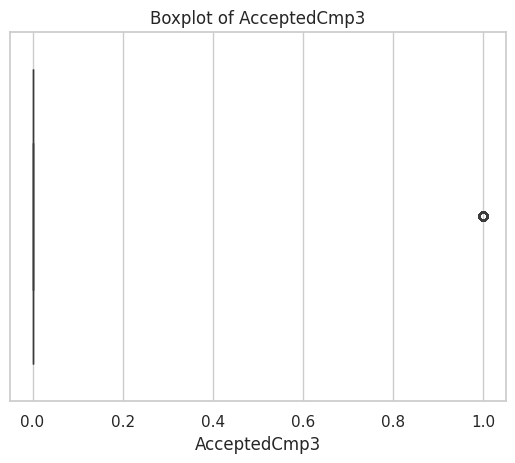

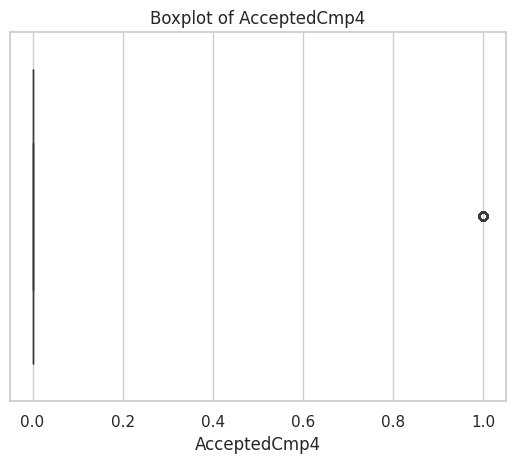

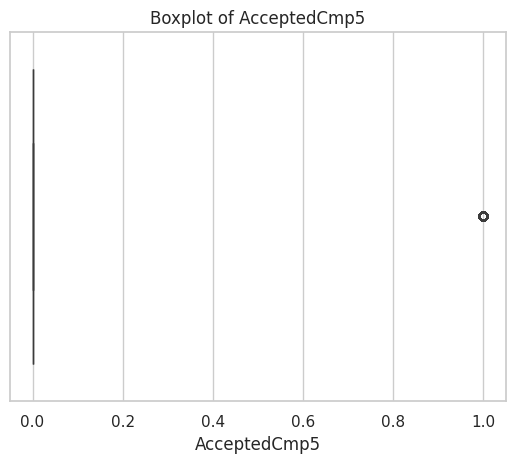

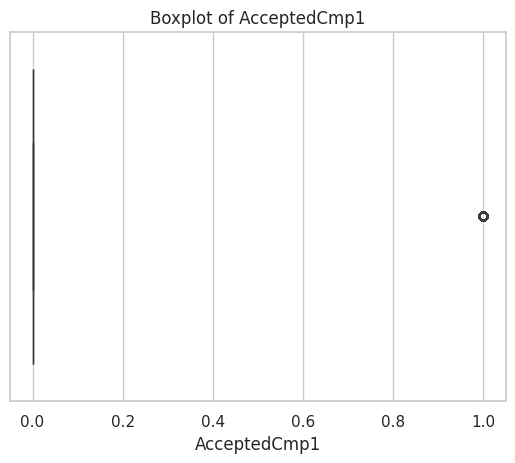

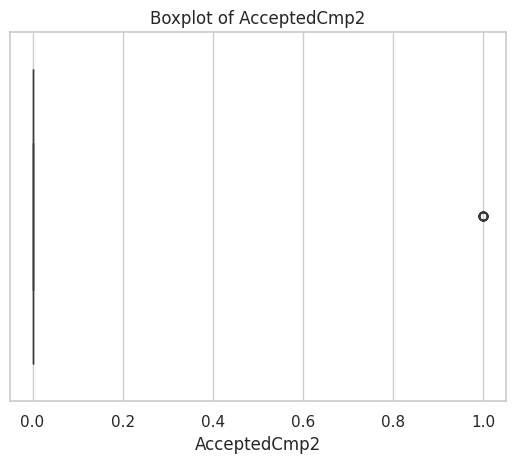

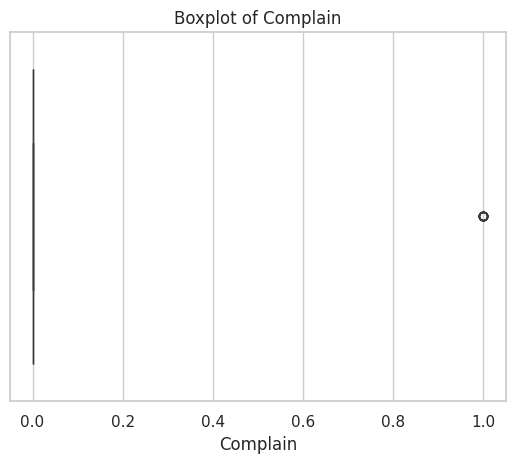

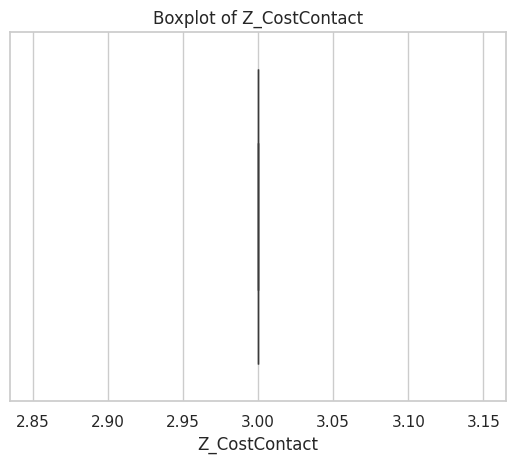

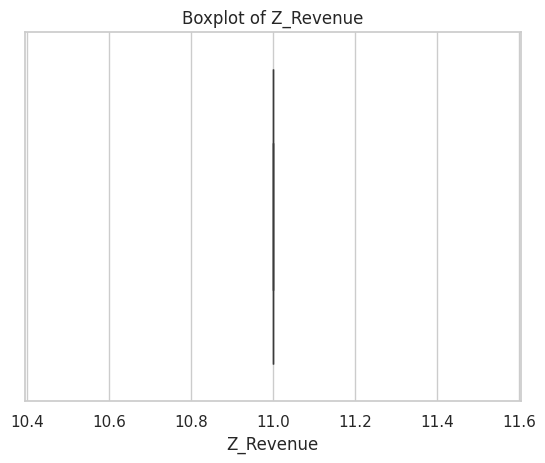

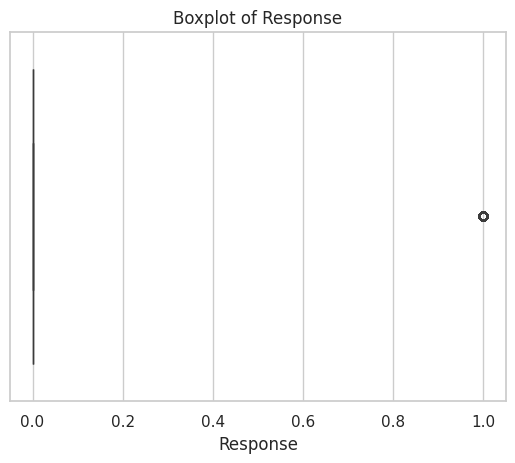

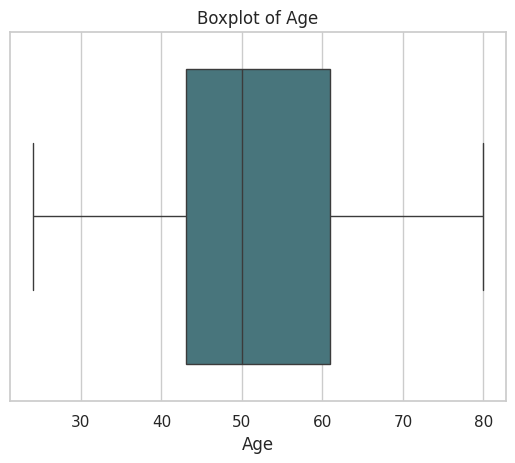

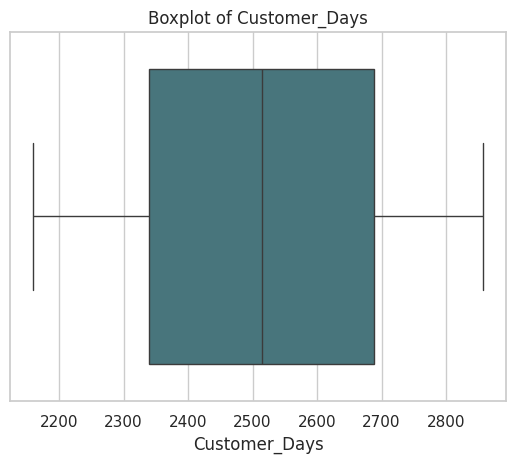

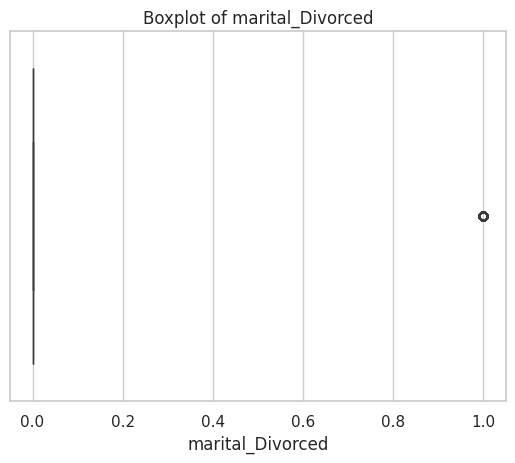

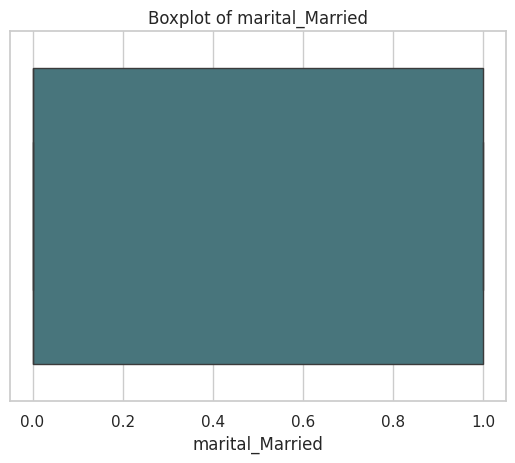

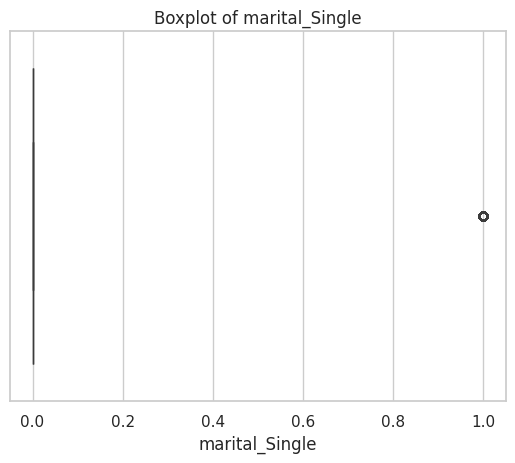

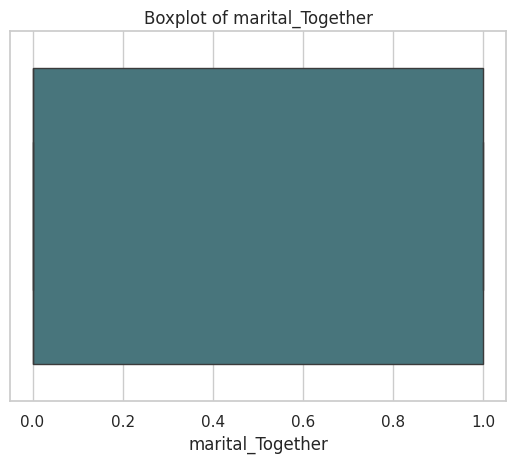

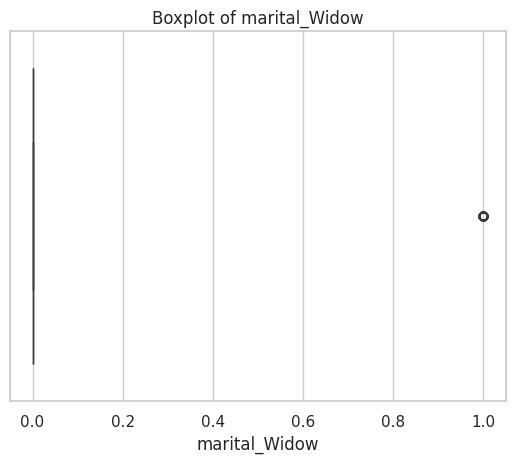

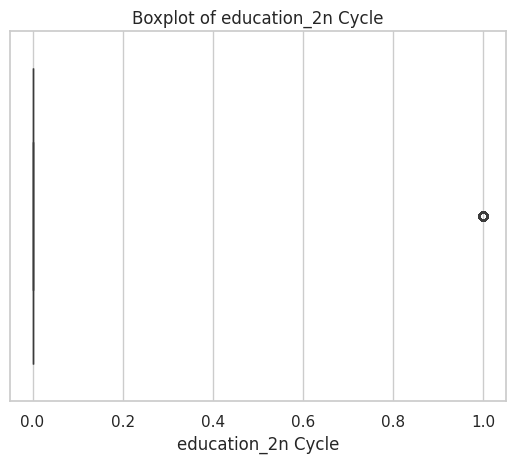

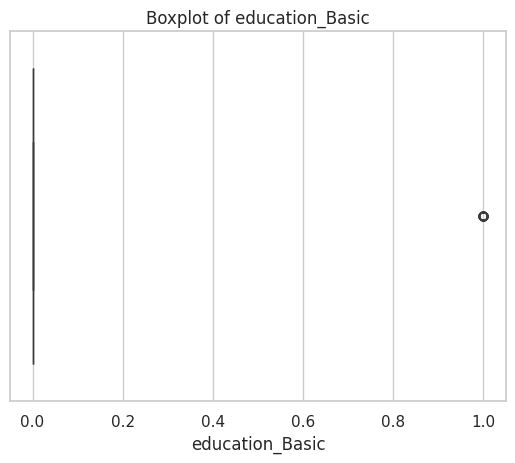

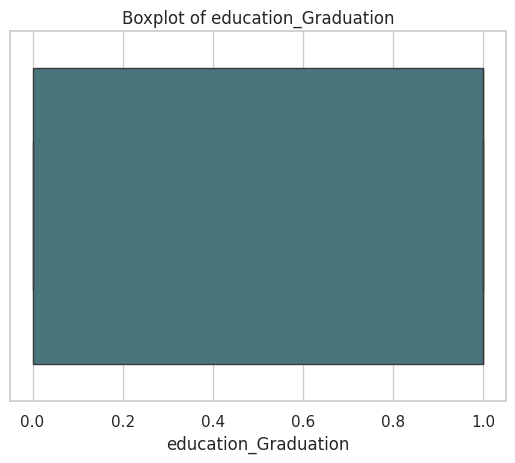

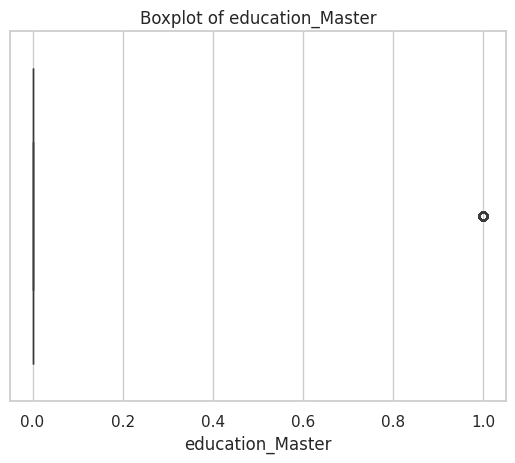

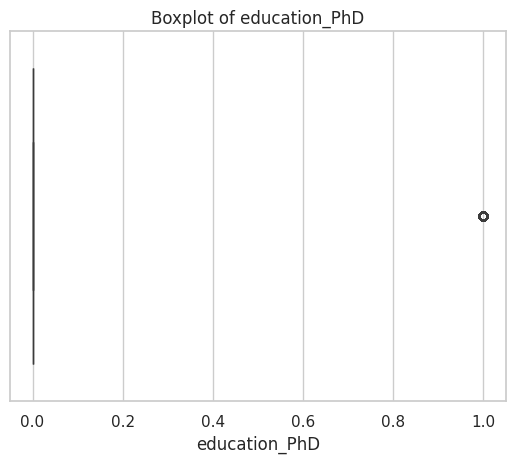

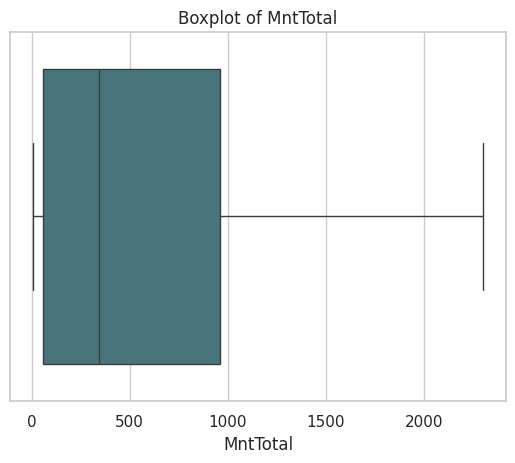

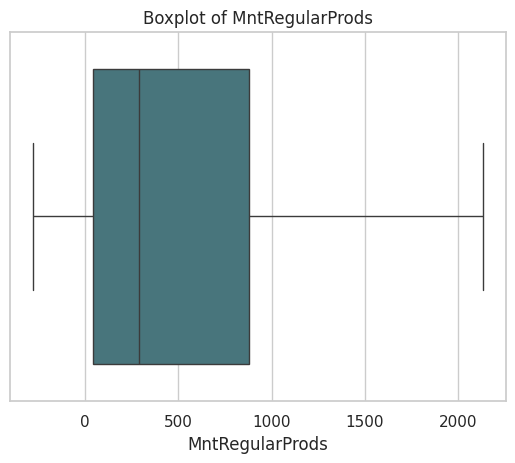

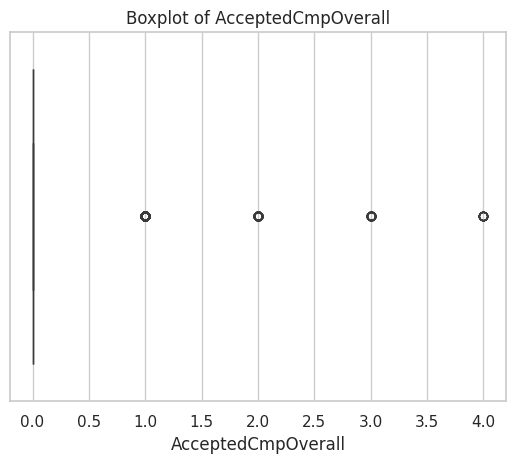

In [ ]:
int_float_cols = df_no_outliers.select_dtypes(include=['int','float']).columns

# Create boxplots
for col in int_float_cols:
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
df_no_outliers

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58     635.0          0   
1     46344.0        1         1       38      11.0          1   
2     71613.0        0         0       26     426.0         45   
3     26646.0        1         0       26      11.0          4   
4     58293.0        1         0       94     173.0         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46     709.0         43   
2201  64014.0        2         1       56     406.0          0   
2202  56981.0        0         0       91     908.0         45   
2203  69245.0        0         1        8     428.0         30   
2204  52869.0        1         1       40      84.0          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0               368.5                0               0.0            88   
1                 6.0                2               1.0             6   
2               127.0               70              21.0            42   
3                20.0               10               3.0             5   
4               118.0               46              27.0            15   
...               ...              ...               ...           ...   
2200            182.0               42               0.0             3   
2201             30.0                0               0.0             8   
2202            217.0               32              12.0            24   
2203            214.0               70              30.0            61   
2204             61.0                2               1.0            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2200                  2                9                    3   
2201                  1                8                    2   
2202                  1                2                    3   
2203                  2                6                    5   
2204                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2200                  4                  5             0             0   
2201                  5                  7             0             0   
2202                 13                  6             0             1   
2203                 10                  3             0             0   
2204                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                0             0             0         0              3   
1                0             0             0         0              3   
2                0             0             0         0              3   
3                0             0             0         0              3   
4                0             0             0         0              3   
...            ...           ...           ...       ...            ...   
2200             0             0             0         0              3   
2201             0             1             0         

Now all the columns are normalized and is ready for transformation

This is clean dataset, free from outliers, providing a more accurate representation of typical customer behavior.

**This leads to:**

Accurate forecasting

Targeted marketing

Improved segmentation

Enhanced decision making

In [ ]:
df_no_outliers.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                float64
MntFruits                 int64
MntMeatProducts         float64
MntFishProducts           int64
MntSweetProducts        float64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
education_2n Cycle        int64
education_Basic           int64
education_Graduation      int64
education_Master          int64
education_PhD             int64
MntTotal                  int64
MntRegularProds           int64
AcceptedCmpOverall        int64
dtype: object

# **unique values in each column**

---



In [ ]:
for column in df_no_outliers:
    unique_values = df_no_outliers[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print("\n")

Unique values in Income:
[58138. 46344. 71613. ... 56981. 69245. 52869.]


Unique values in Kidhome:
[0 1 2]


Unique values in Teenhome:
[0 1 2]


Unique values in Recency:
[58 38 26 94 16 34 32 19 68 59 82 53 23 51 20 91 86 41 42 63  0 69 89  4
 96 56 31  8 55 37 76 99  3 88 72 24 92 39 29  2 54 57 30 12 18 75 90  1
 40  9 87  5 95 48 70 79 84 44 43 35 15 17 46 27 25 74 85 65 13 83 10 21
 61 73 47 36 49 28 64 78 77 81 80 45 14 52 98 93 50 60 11 66 97 62  6 33
 22 71 67  7]


Unique values in MntWines:
[6.3500e+02 1.1000e+01 4.2600e+02 1.7300e+02 5.2000e+02 2.3500e+02
 7.6000e+01 1.4000e+01 2.8000e+01 6.0000e+00 1.9400e+02 2.3300e+02
 3.0000e+00 1.0060e+03 5.3000e+01 8.4000e+01 1.0120e+03 4.0000e+00
 8.6000e+01 1.0000e+00 8.6700e+02 3.8400e+02 2.7000e+02 3.6000e+01
 6.8400e+02 8.0000e+00 1.1200e+02 1.1000e+02 9.6000e+01 4.8200e+02
 4.0000e+01 7.0200e+02 5.5000e+01 4.3700e+02 4.2100e+02 1.3000e+01
 9.0000e+00 1.2300e+02 8.2600e+02 2.4500e+02 6.5000e+02 1.2000e+01
 5.1000e+02 3.2800e+02




 **Sorted Unique Values**

---



In [ ]:
for column in df_no_outliers:
    unique_values = sorted(df_no_outliers[column].unique())
    print(f"Unique values in {column} (sorted):")
    print(unique_values)
    print("\n")

Unique values in Income (sorted):
[1730.0, 2447.0, 3502.0, 4023.0, 4428.0, 4861.0, 5305.0, 5648.0, 6560.0, 6835.0, 7144.0, 7500.0, 8028.0, 8820.0, 8940.0, 9255.0, 9548.0, 9722.0, 10245.0, 10404.0, 10979.0, 11012.0, 11448.0, 12393.0, 12571.0, 13084.0, 13260.0, 13533.0, 13624.0, 13672.0, 13724.0, 14045.0, 14188.0, 14421.0, 14515.0, 14661.0, 14796.0, 14849.0, 14906.0, 14918.0, 15033.0, 15038.0, 15056.0, 15072.0, 15253.0, 15287.0, 15315.0, 15345.0, 15716.0, 15759.0, 15862.0, 16005.0, 16014.0, 16185.0, 16248.0, 16269.0, 16529.0, 16531.0, 16581.0, 16626.0, 16653.0, 16813.0, 16860.0, 16927.0, 17003.0, 17117.0, 17144.0, 17148.0, 17256.0, 17323.0, 17345.0, 17459.0, 17487.0, 17649.0, 17688.0, 18100.0, 18169.0, 18222.0, 18227.0, 18351.0, 18358.0, 18393.0, 18492.0, 18589.0, 18690.0, 18701.0, 18746.0, 18793.0, 18890.0, 18929.0, 18978.0, 18988.0, 19107.0, 19329.0, 19346.0, 19414.0, 19419.0, 19444.0, 19485.0, 19510.0, 19514.0, 19656.0, 19740.0, 19789.0, 19986.0, 20130.0, 20180.0, 20193.0, 20194.0, 20

# **Unique Values**

**Total Columns: 21**

Column Analysis:


**Income: Numeric:** representing the annual income of customers.


Range: [58138, 71613]

Distribution: Likely skewed right, with a higher concentration of lower-income customers.

**Kidhome: Categorical** representing the number of children in the household.


Unique Values: [0, 1, 2]

**Teenhome: Categorical** representing the number of teenagers in the household.

Unique Values: [0, 1, 2]

**Recency:** Numeric, representing the number of days since the customer's last purchase.

Range: [0, 99]

Distribution: Likely skewed right, with a higher concentration of customers who have recently made purchases.


**MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds: Numeric** representing the spending amount on each product category.

**Range (for MntWines):** [6.35, 1132.5]
Distribution: Likely skewed right, with a higher concentration of customers spending smaller amounts.



**NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth: Numeric,** representing the number of purchases made through different channels.


**Range (for NumDealsPurchases):** [0, 6]
Distribution: Likely skewed right, with a higher concentration of customers making fewer purchases.

**AcceptedCmp1-5:** Categorical, indicating whether customers accepted marketing

campaigns 1-5.

Unique Values: [0, 1]
Complain: Categorical, indicating whether customers filed complaints.

Unique Values: [0, 1]
Z_CostContact: Numeric, representing the cost per contact.

Unique Values: [3]
Z_Revenue: Numeric, representing revenue generated.

Unique Values: [11]


**Response:** Categorical, indicating whether customers responded to marketing campaigns.

Unique Values: [0, 1]


**Age:** Numeric, representing the age of customers.

Range: [24, 80]
Distribution: Likely skewed right, with a higher concentration of younger customers.
Customer_Days: Numeric, representing the number of days since the customer became a member.

Range: [2159, 2857]

Distribution: Likely skewed right, with a higher concentration of newer customers.

**Marital:** Categorical, representing the marital status of customers.

Unique Values: [Divorced, Married, Single, Together, Widow]

**Education:** Categorical, representing the highest level of education attained by customers.

Unique Values: [2n Cycle, Basic, Graduation, Master, PhD]

---

# **FEATURE ENGINEERING**


---





# **1. YEAR_BIRTH ( Feature )**

---

**NEW COLUMN** : YEAR_BIRTH : BIRTH YEAR OF CLIENT

**FROM COLUMN** : AGE : AGE OF THE CLIENT



In [ ]:
from datetime import date

current_year = date.today().year

df_no_outliers['Year_Birth'] = current_year - df_no_outliers['Age']

df_no_outliers.head()


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58     635.0          0            368.5   
1  46344.0        1         1       38      11.0          1              6.0   
2  71613.0        0         0       26     426.0         45            127.0   
3  26646.0        1         0       26      11.0          4             20.0   
4  58293.0        1         0       94     173.0         43            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                0               0.0            88                  3   
1                2               1.0             6                  2   
2               70              21.0            42                  1   
3               10               3.0             5                  2   
4               46              27.0            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               1                 0   
1                 0                0               1                 0   
2                 0                0               0                 1   
3                 0                0               0                 1   
4                 0                1               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  Year_Birth  
0                   0        1961  
1                   0        1958  
2                   0        1969  
3                   0        1988  
4                   0        1985








# **2. Revenue_generated ( Feature )**

---

**NEW COLUMN** : Revenue_generated : total revenue generated  

**FROM COLUMN** : Mnt(all products) : The total sum of the amount spent on the 6
product categories



In [ ]:
df_no_outliers['Revenue_generated'] = df_no_outliers['MntWines'] + df_no_outliers['MntFruits'] + df_no_outliers['MntMeatProducts'] + \
                                   df_no_outliers['MntFishProducts'] + df_no_outliers['MntSweetProducts'] + \
                                   df_no_outliers['MntGoldProds']


df_no_outliers.head(10)



Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58     635.0          0            368.5   
1  46344.0        1         1       38      11.0          1              6.0   
2  71613.0        0         0       26     426.0         45            127.0   
3  26646.0        1         0       26      11.0          4             20.0   
4  58293.0        1         0       94     173.0         43            118.0   
5  62513.0        0         1       16     520.0         42             98.0   
6  55635.0        0         1       34     235.0         45            164.0   
7  33454.0        1         0       32      76.0         10             56.0   
8  30351.0        1         0       19      14.0          0             24.0   
9   5648.0        1         1       68      28.0          0              6.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                0               0.0            88                  3   
1                2               1.0             6                  2   
2               70              21.0            42                  1   
3               10               3.0             5                  2   
4               46              27.0            15                  5   
5                0              42.0            14                  2   
6               50              47.5            27                  4   
7                3               1.0            23                  2   
8                3               3.0             2                  1   
9                1               1.0            13                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   
5                6                    4                 10                  6   
6                7                    3                  7                  6   
7                4                    0                  4                  8   
8                3                    0                  2                  9   
9                1                    0                  0                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             1             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   
5         0              3         11         0   53           2452   
6         0              3         11         0   49           2752   
7         0              3       

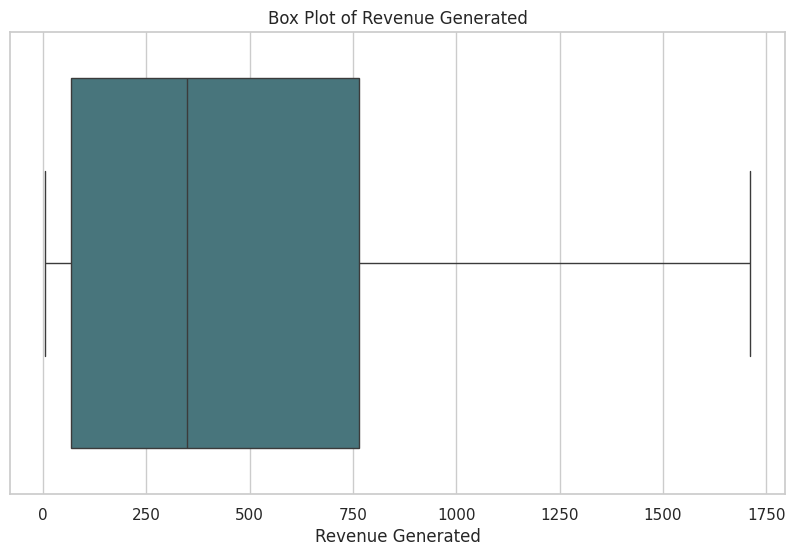

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Revenue_generated'])
plt.title('Box Plot of Revenue Generated')
plt.xlabel('Revenue Generated')
plt.show()

column revenue generated gave a real time analysis of howmuch revenue isgenrated in the whole time frame and can also be utilized for analyzing that how much it is imortant  we can clearly see that






# **3. Total_Purchases**

---

**NEW COLUMN** : Total_Purchases : total revenue generated  

**FROM COLUMN** : (...Purchases) : The total sum of all the 4 purchases features

**COLUMN EXPLANATION:** THE TOTAL AMOUNT OF PRODUCTS THAT A COSTUMER HAS PURCHASED


In [ ]:
df_no_outliers['Total_Purchases'] = df_no_outliers[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

df_no_outliers.head(10)

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58     635.0          0            368.5   
1  46344.0        1         1       38      11.0          1              6.0   
2  71613.0        0         0       26     426.0         45            127.0   
3  26646.0        1         0       26      11.0          4             20.0   
4  58293.0        1         0       94     173.0         43            118.0   
5  62513.0        0         1       16     520.0         42             98.0   
6  55635.0        0         1       34     235.0         45            164.0   
7  33454.0        1         0       32      76.0         10             56.0   
8  30351.0        1         0       19      14.0          0             24.0   
9   5648.0        1         1       68      28.0          0              6.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                0               0.0            88                  3   
1                2               1.0             6                  2   
2               70              21.0            42                  1   
3               10               3.0             5                  2   
4               46              27.0            15                  5   
5                0              42.0            14                  2   
6               50              47.5            27                  4   
7                3               1.0            23                  2   
8                3               3.0             2                  1   
9                1               1.0            13                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   
5                6                    4                 10                  6   
6                7                    3                  7                  6   
7                4                    0                  4                  8   
8                3                    0                  2                  9   
9                1                    0                  0                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             1             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   
5         0              3         11         0   53           2452   
6         0              3         11         0   49           2752   
7         0              3       





# **4. TotalAmount_Spent( Feature )**

---
**NEW COLUMN** : TotalAmount_Spent : total revenue generated  

**FROM COLUMN** : (MNT...) : adding all the Mnt* features

**EXPLANATION**: AMOUNT EACH COSTUMER HAS SPENT


In [ ]:
df_no_outliers['TotalAmount_Spent'] = df_no_outliers['MntWines'] + df_no_outliers['MntFruits'] + \
                                     df_no_outliers['MntMeatProducts'] + df_no_outliers['MntFishProducts'] + \
                                     df_no_outliers['MntSweetProducts'] + df_no_outliers['MntGoldProds']

df_no_outliers.head(10)


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58     635.0          0            368.5   
1  46344.0        1         1       38      11.0          1              6.0   
2  71613.0        0         0       26     426.0         45            127.0   
3  26646.0        1         0       26      11.0          4             20.0   
4  58293.0        1         0       94     173.0         43            118.0   
5  62513.0        0         1       16     520.0         42             98.0   
6  55635.0        0         1       34     235.0         45            164.0   
7  33454.0        1         0       32      76.0         10             56.0   
8  30351.0        1         0       19      14.0          0             24.0   
9   5648.0        1         1       68      28.0          0              6.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                0               0.0            88                  3   
1                2               1.0             6                  2   
2               70              21.0            42                  1   
3               10               3.0             5                  2   
4               46              27.0            15                  5   
5                0              42.0            14                  2   
6               50              47.5            27                  4   
7                3               1.0            23                  2   
8                3               3.0             2                  1   
9                1               1.0            13                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   
5                6                    4                 10                  6   
6                7                    3                  7                  6   
7                4                    0                  4                  8   
8                3                    0                  2                  9   
9                1                    0                  0                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             1             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   
5         0              3         11         0   53           2452   
6         0              3         11         0   49           2752   
7         0              3       






# **5. Family ( Feature )**

---

**NEW COLUMN** : Family : number of poeple in a family

**FROM COLUMN** :  Adding Kidhome + Teenhome + Marital_Status




In [ ]:
marital_mapping = {'marital_Divorced': 1, 'marital_Single': 1, 'marital_Married': 2, 'marital_Together': 2, 'marital_Widow': 1}

df_no_outliers['Marital_Status_Num'] = df_no_outliers['marital_Divorced'] + df_no_outliers['marital_Married'] * 2 + \
                                       df_no_outliers['marital_Single'] + df_no_outliers['marital_Together'] * 2 + \
                                       df_no_outliers['marital_Widow']
df_no_outliers.head()
df_no_outliers['Family'] = df_no_outliers['Kidhome'] + df_no_outliers['Teenhome'] + df_no_outliers['Marital_Status_Num']

df_no_outliers.head(10)


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58     635.0          0            368.5   
1  46344.0        1         1       38      11.0          1              6.0   
2  71613.0        0         0       26     426.0         45            127.0   
3  26646.0        1         0       26      11.0          4             20.0   
4  58293.0        1         0       94     173.0         43            118.0   
5  62513.0        0         1       16     520.0         42             98.0   
6  55635.0        0         1       34     235.0         45            164.0   
7  33454.0        1         0       32      76.0         10             56.0   
8  30351.0        1         0       19      14.0          0             24.0   
9   5648.0        1         1       68      28.0          0              6.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                0               0.0            88                  3   
1                2               1.0             6                  2   
2               70              21.0            42                  1   
3               10               3.0             5                  2   
4               46              27.0            15                  5   
5                0              42.0            14                  2   
6               50              47.5            27                  4   
7                3               1.0            23                  2   
8                3               3.0             2                  1   
9                1               1.0            13                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   
5                6                    4                 10                  6   
6                7                    3                  7                  6   
7                4                    0                  4                  8   
8                3                    0                  2                  9   
9                1                    0                  0                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             1             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   
5         0              3         11         0   53           2452   
6         0              3         11         0   49           2752   
7         0              3       






# **6.  Educationnal_years ( Feature )**


---

**NEW COLUMN** : Educationnal_years : Total years of education

**FROM COLUMN** : [education_...] : Categorical column.

**explanation** number of years of education


In [ ]:
education_mapping = {
    'education_Basic': 10,
    'education_2n Cycle': 12,
    'education_Graduation': 16,
    'education_Master': 18,
    'education_PhD': 22
}

df_no_outliers['Educational_years'] = df_no_outliers['education_Basic'] * education_mapping['education_Basic'] + \
                                      df_no_outliers['education_2n Cycle'] * education_mapping['education_2n Cycle'] + \
                                      df_no_outliers['education_Graduation'] * education_mapping['education_Graduation'] + \
                                      df_no_outliers['education_Master'] * education_mapping['education_Master'] + \
                                      df_no_outliers['education_PhD'] * education_mapping['education_PhD']

df_no_outliers.head()


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58     635.0          0            368.5   
1  46344.0        1         1       38      11.0          1              6.0   
2  71613.0        0         0       26     426.0         45            127.0   
3  26646.0        1         0       26      11.0          4             20.0   
4  58293.0        1         0       94     173.0         43            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                0               0.0            88                  3   
1                2               1.0             6                  2   
2               70              21.0            42                  1   
3               10               3.0             5                  2   
4               46              27.0            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               1                 0   
1                 0                0               1                 0   
2                 0                0               0                 1   
3                 0                0               0                 1   
4                 0                1               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  Year_Birth  Revenue_generated  Total_Purchases  \
0                   0        1961             1091.5               25   
1                   0        1958               27.0                6   
2                   0        1969              731.0               21   
3                   0        1988               53.0                8   
4                   0        1985          






# **7. TotalCampaignsAcc ( Feature )**

----

**NEW COLUMN** : TotalCampaignsAcc : Total number of campaigns that were accepted by costumer.

**FROM COLUMN** : [AcceptedCmp..] : different campaigns




In [ ]:
df_no_outliers['TotalCampaignsAcc'] = df_no_outliers['AcceptedCmp1'] + df_no_outliers['AcceptedCmp2'] + \
                                     df_no_outliers['AcceptedCmp3'] + df_no_outliers['AcceptedCmp4'] + \
                                     df_no_outliers['AcceptedCmp5']

df_no_outliers.head()


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58     635.0          0            368.5   
1  46344.0        1         1       38      11.0          1              6.0   
2  71613.0        0         0       26     426.0         45            127.0   
3  26646.0        1         0       26      11.0          4             20.0   
4  58293.0        1         0       94     173.0         43            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                0               0.0            88                  3   
1                2               1.0             6                  2   
2               70              21.0            42                  1   
3               10               3.0             5                  2   
4               46              27.0            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               1                 0   
1                 0                0               1                 0   
2                 0                0               0                 1   
3                 0                0               0                 1   
4                 0                1               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  Year_Birth  Revenue_generated  Total_Purchases  \
0                   0        1961             1091.5               25   
1                   0        1958               27.0                6   
2                   0        1969              731.0               21   
3                   0        1988               53.0                8   
4                   0        1985          

---
---

# **Section 02: Exploratory Data Analysis (EDA)**

---
---


# **Univariate analysis:**

---

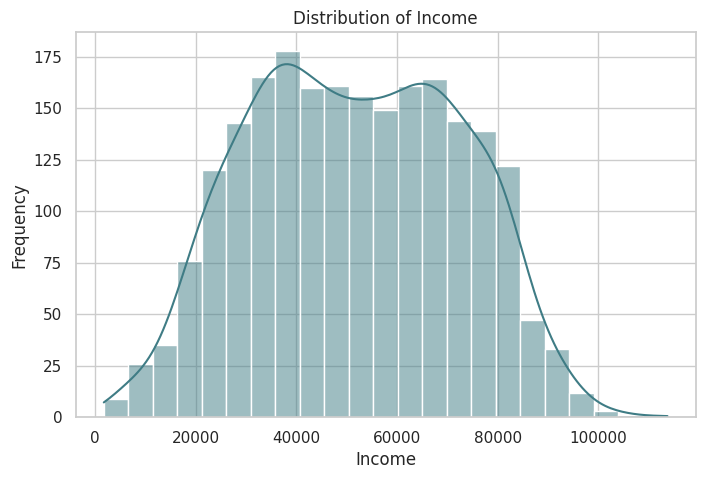

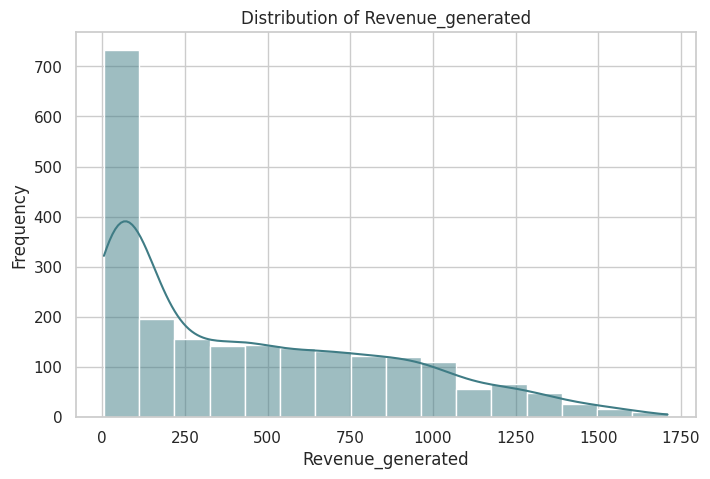

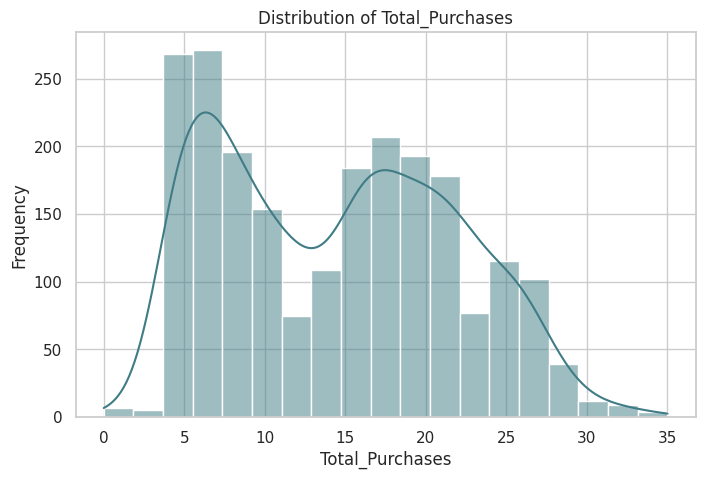

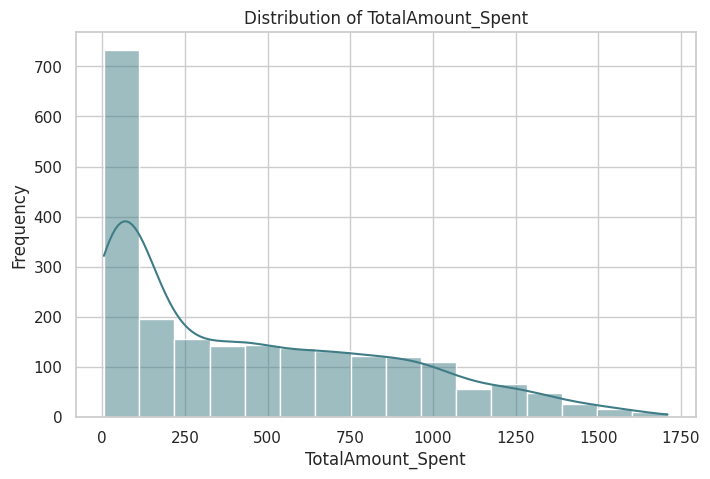

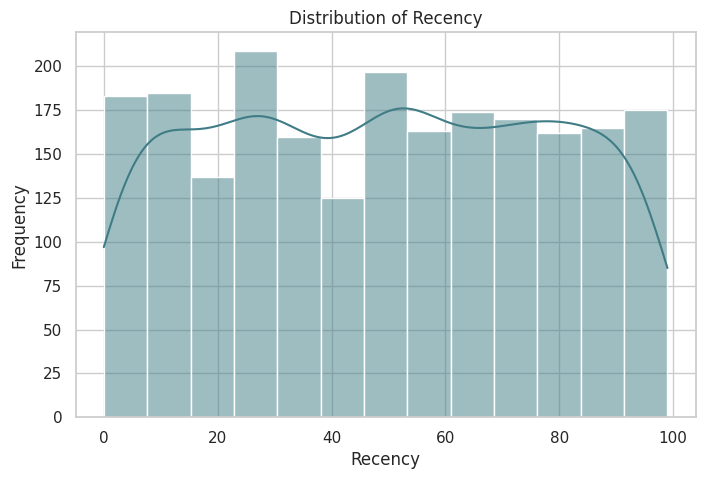

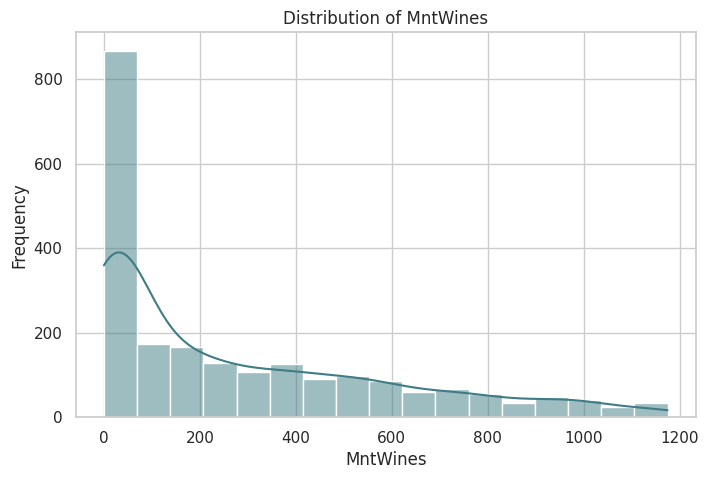

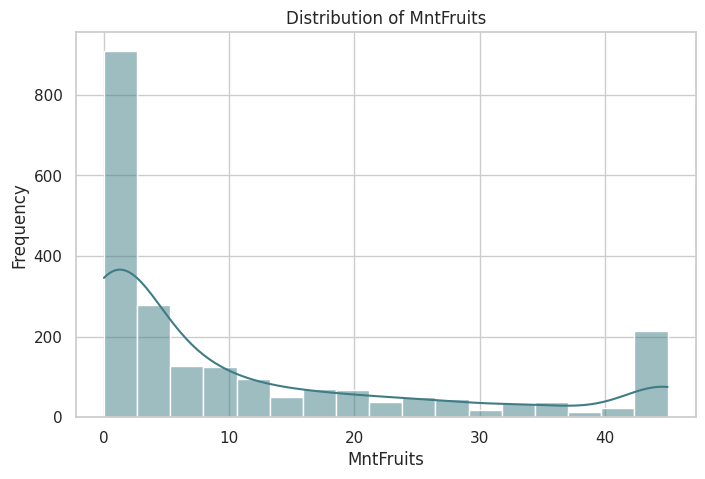

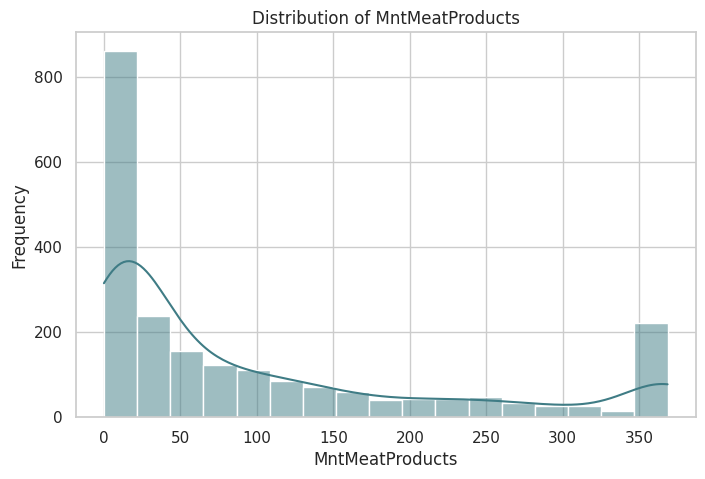

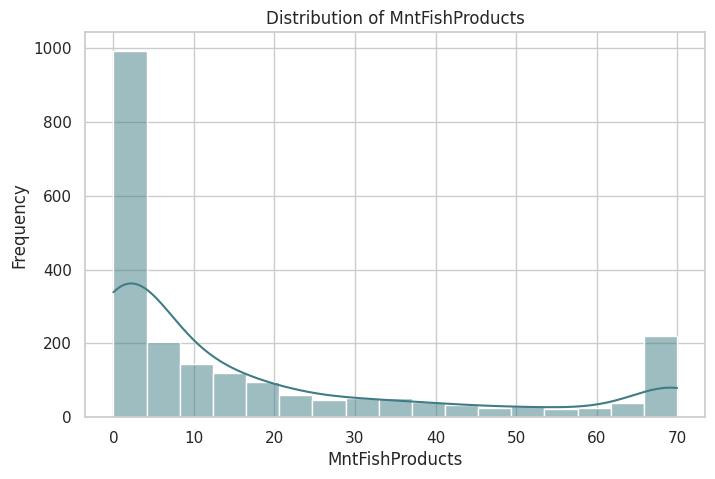

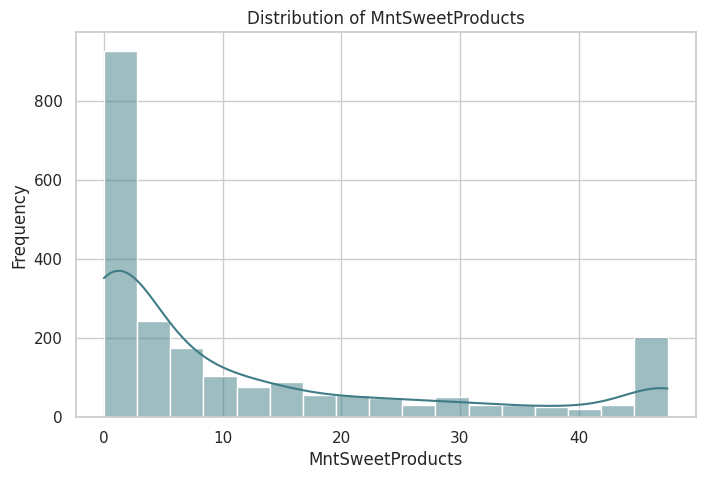

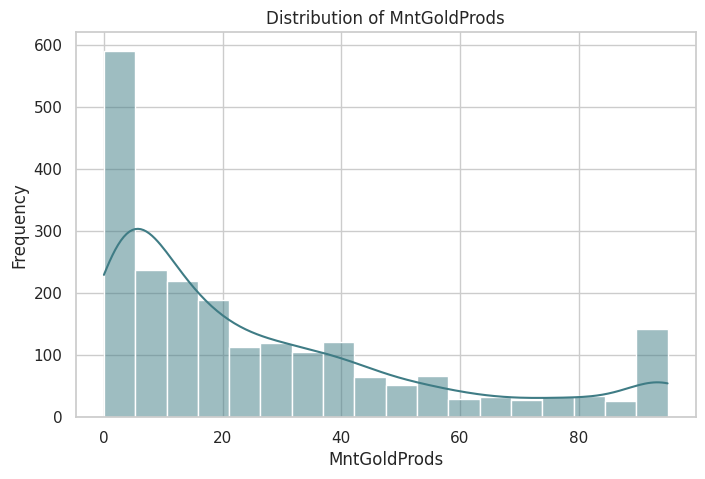

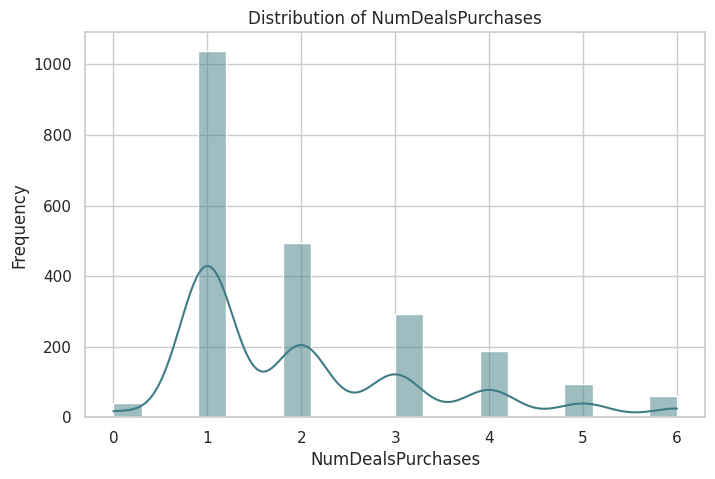

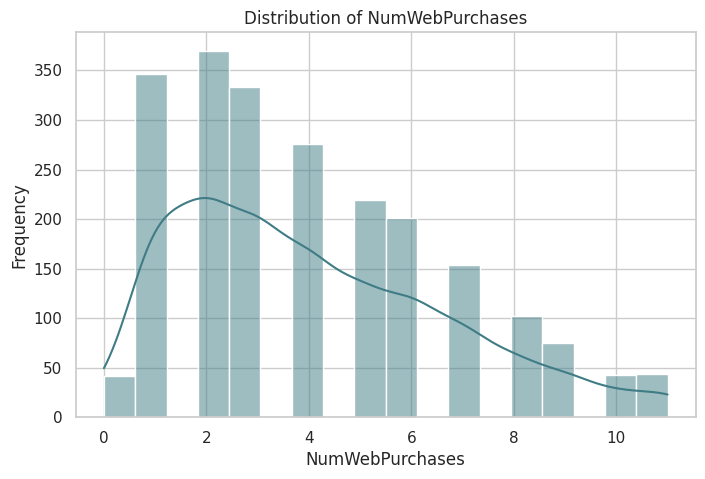

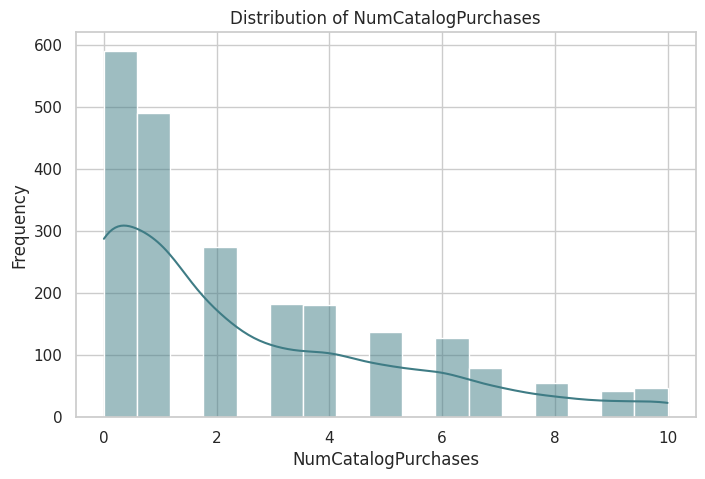

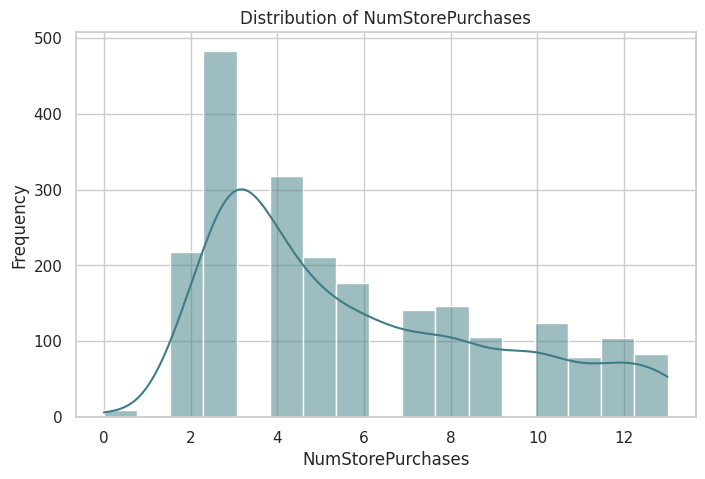

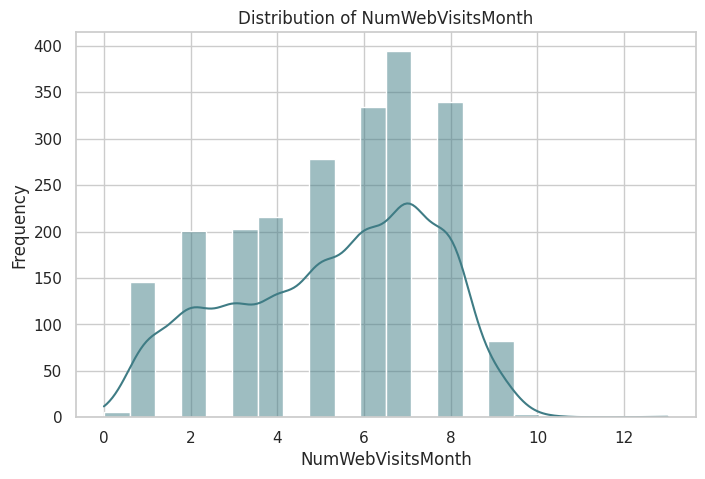

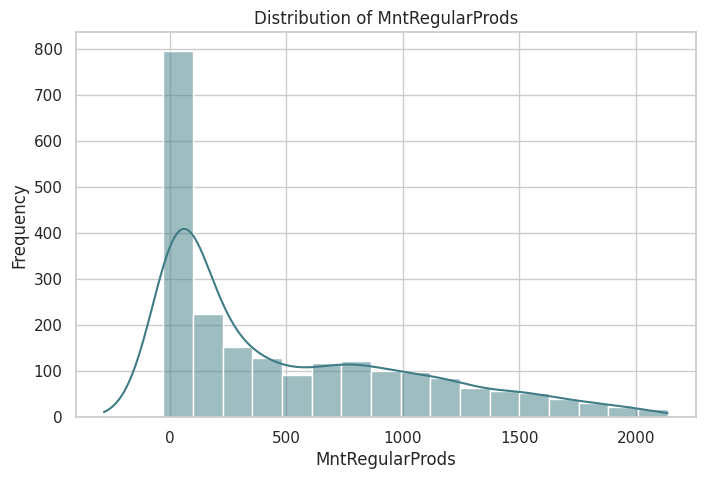

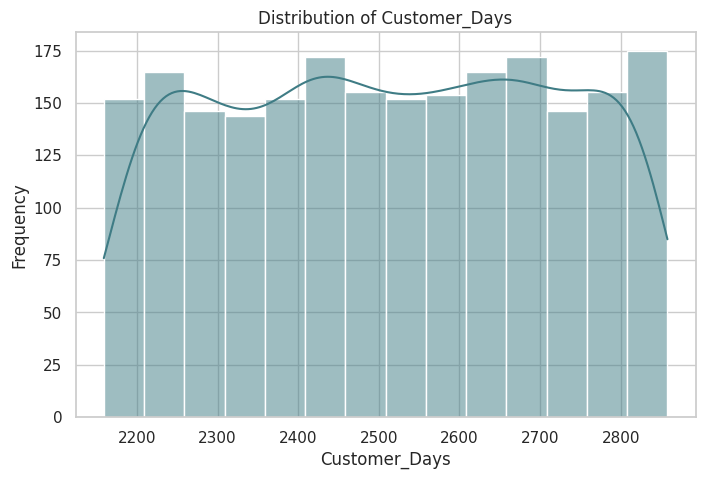

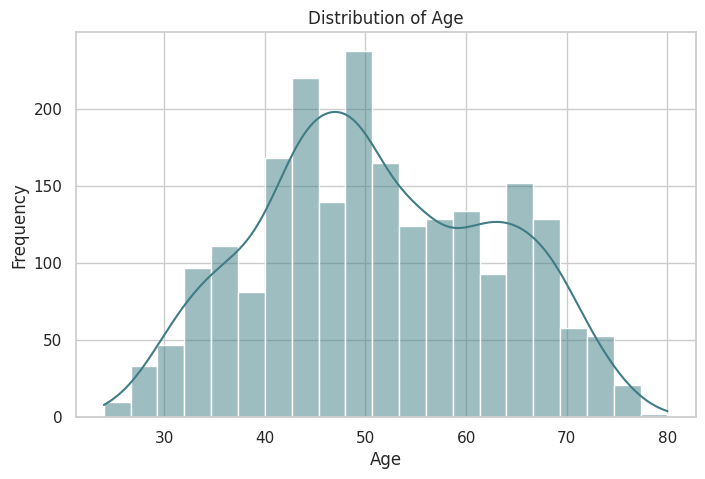

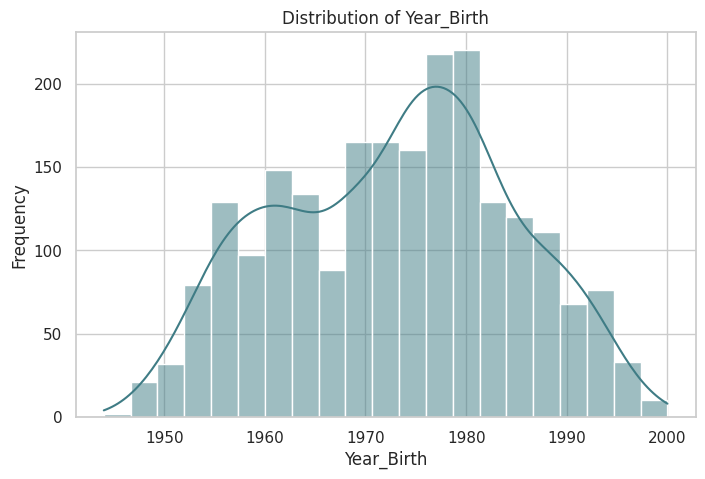

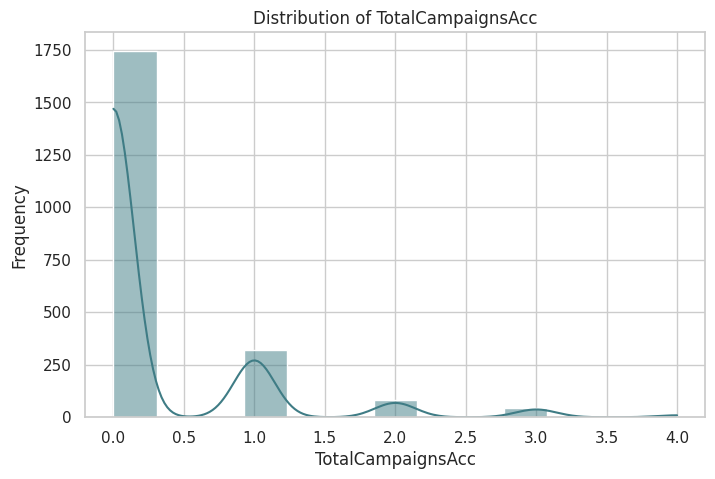

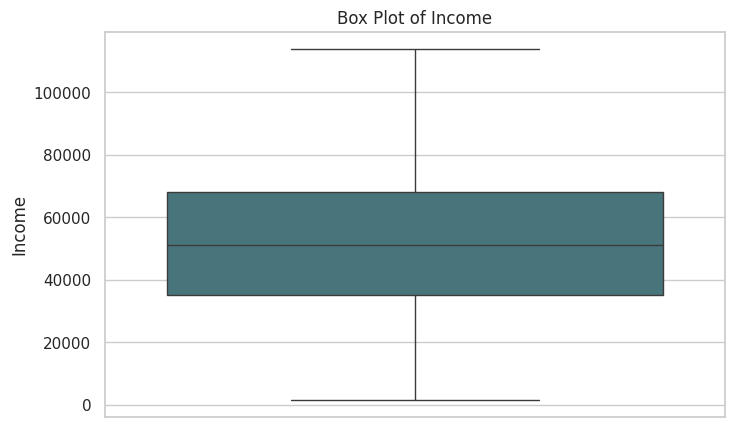

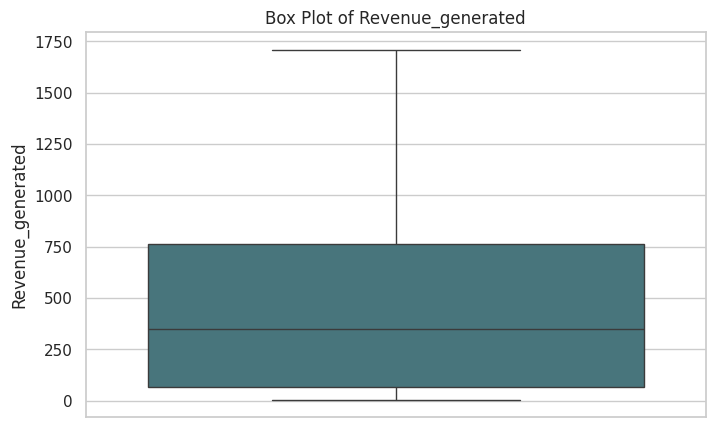

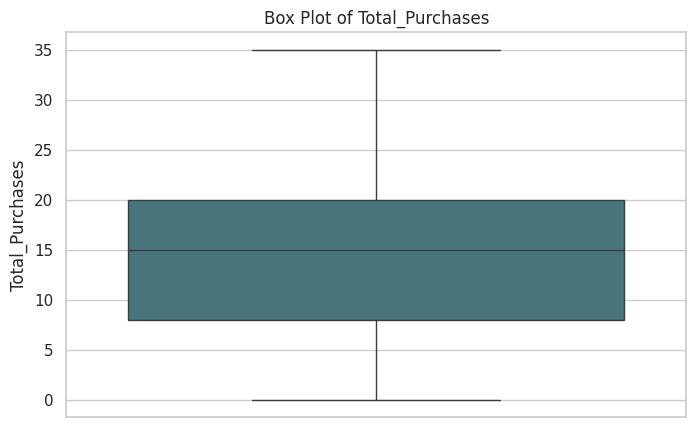

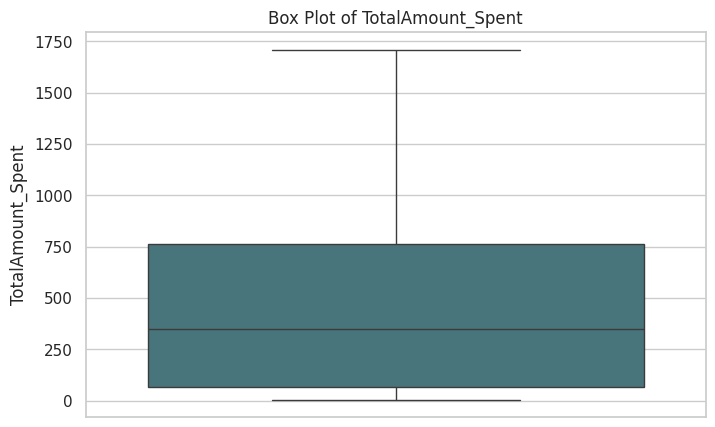

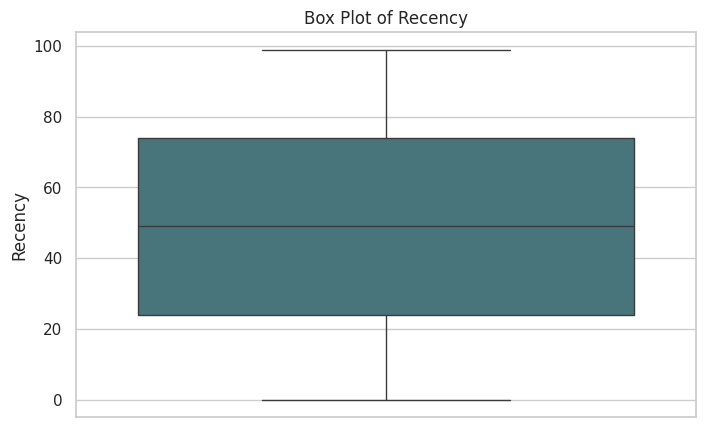

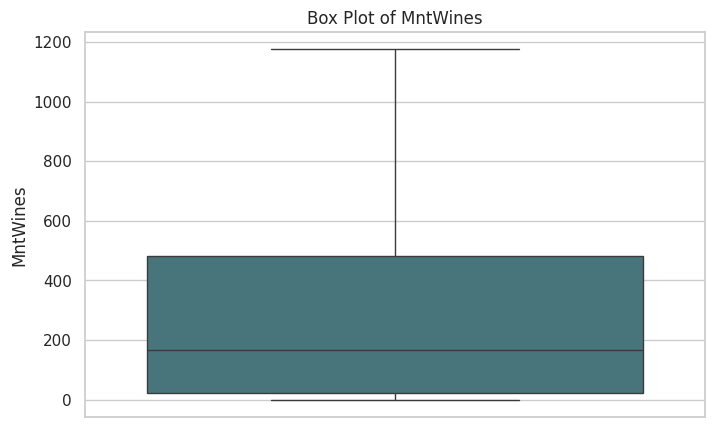

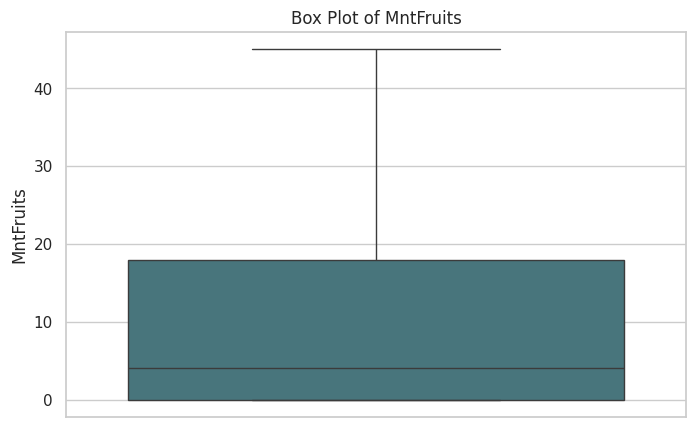

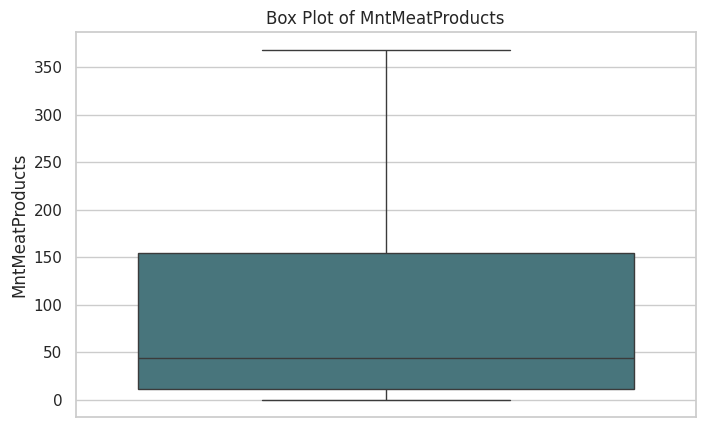

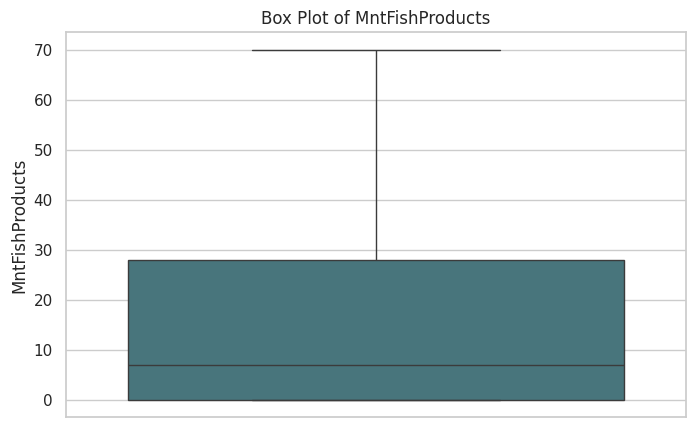

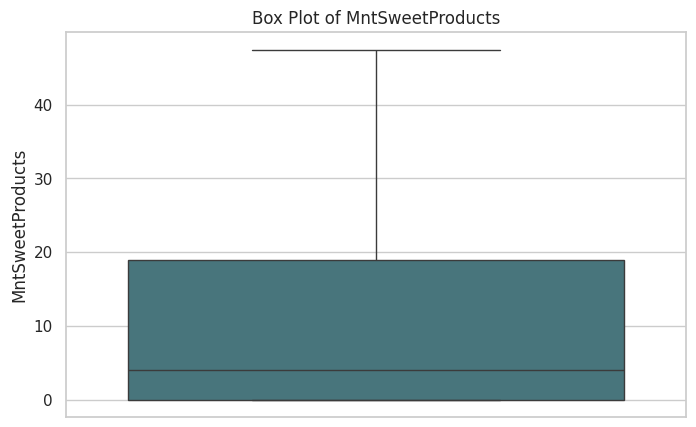

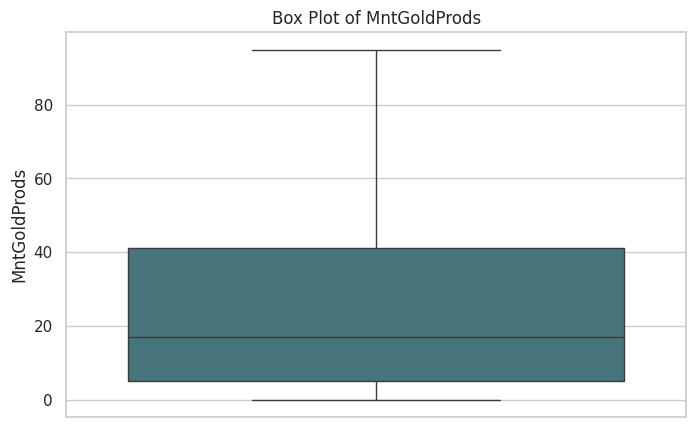

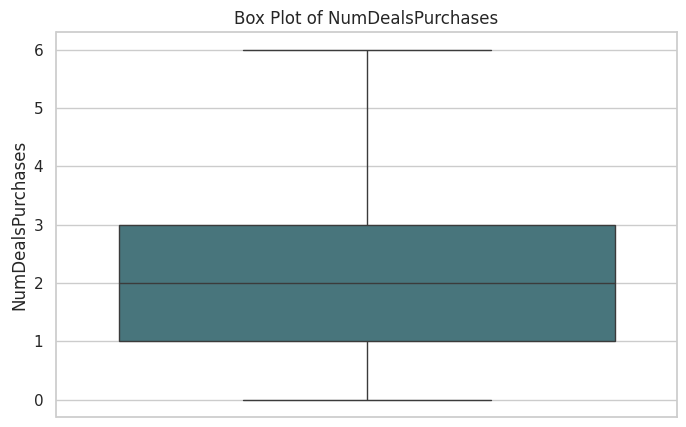

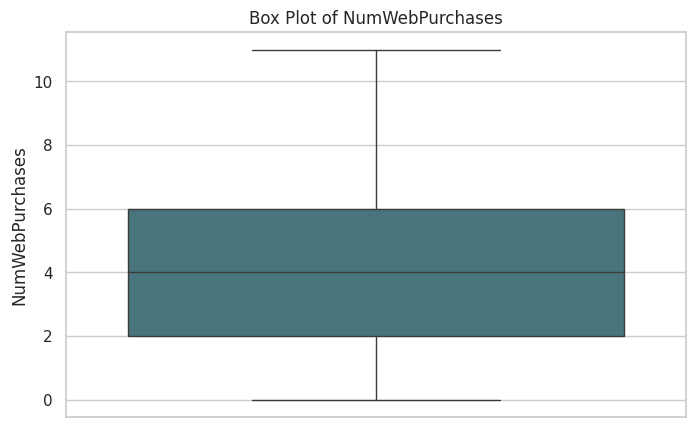

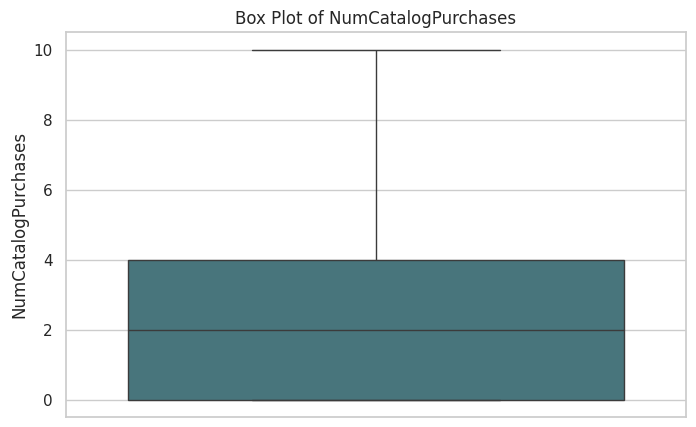

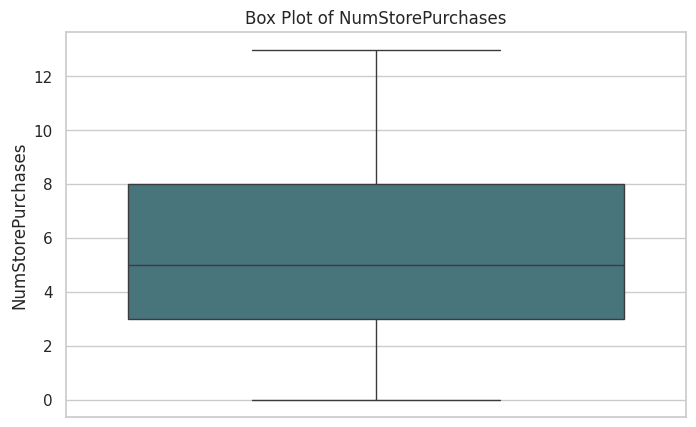

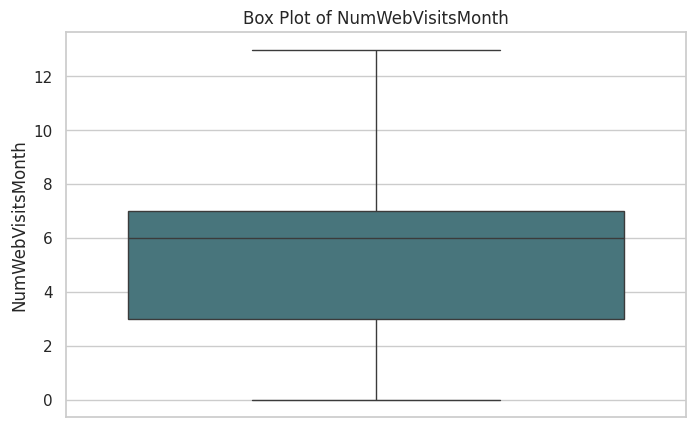

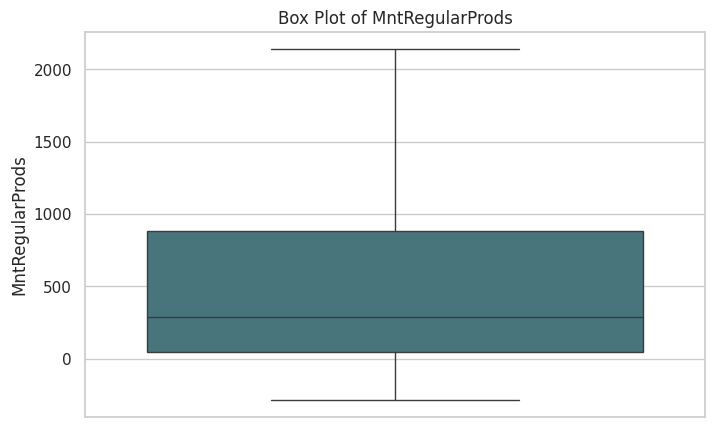

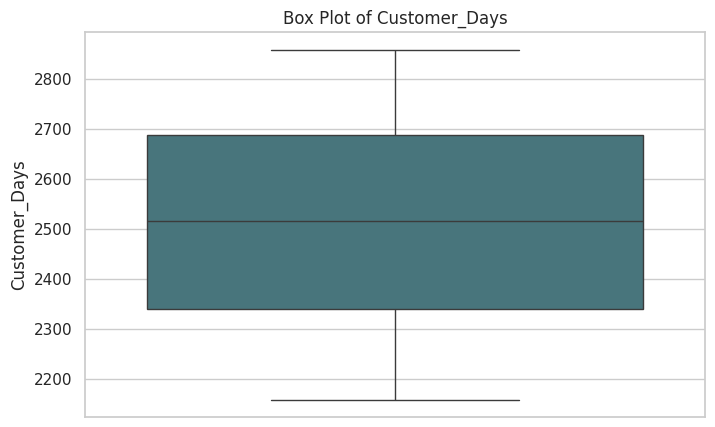

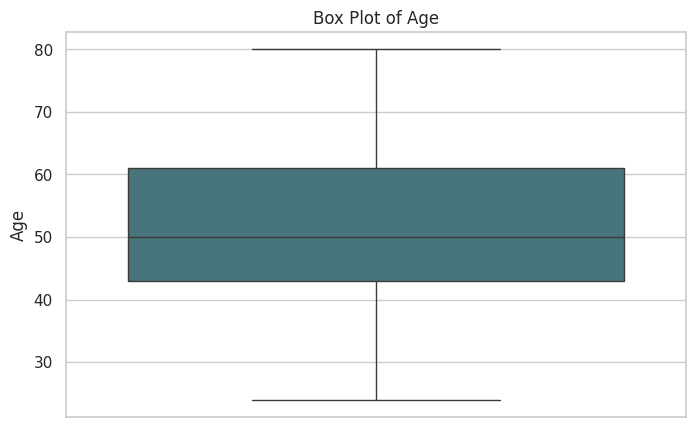

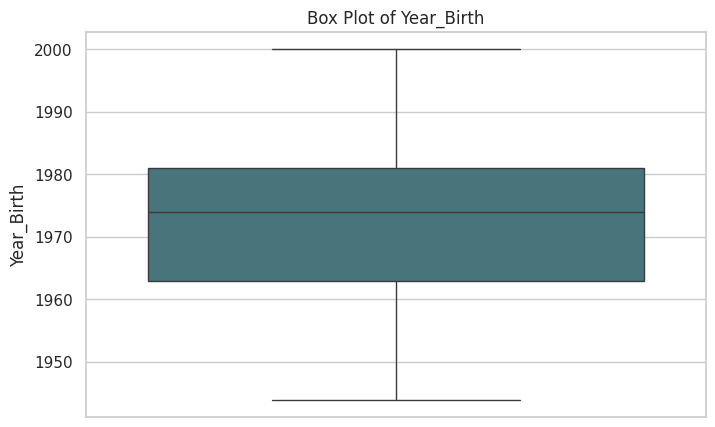

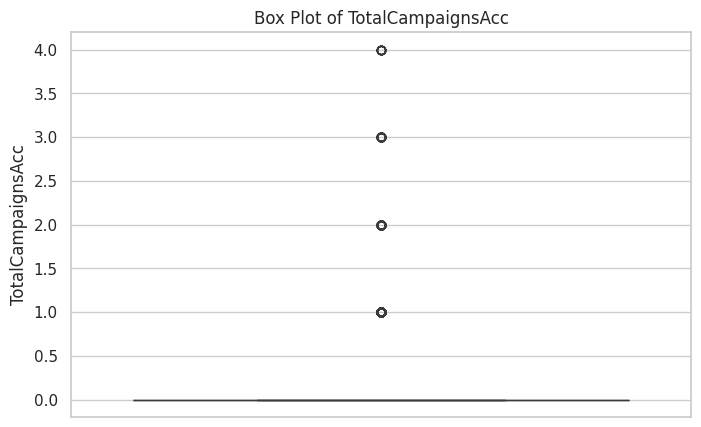

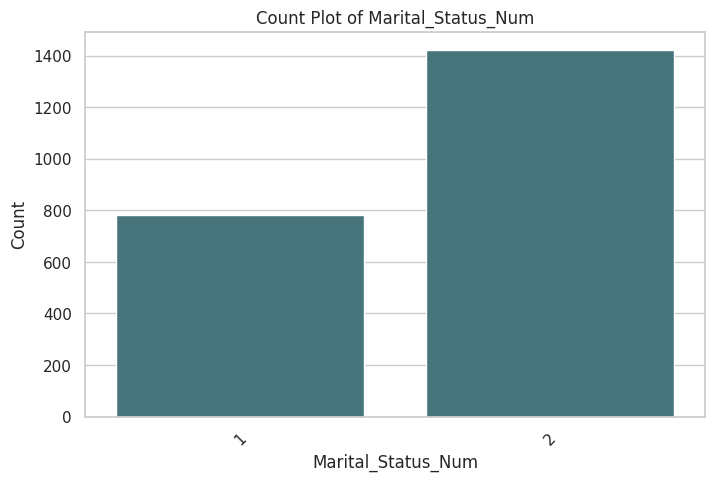

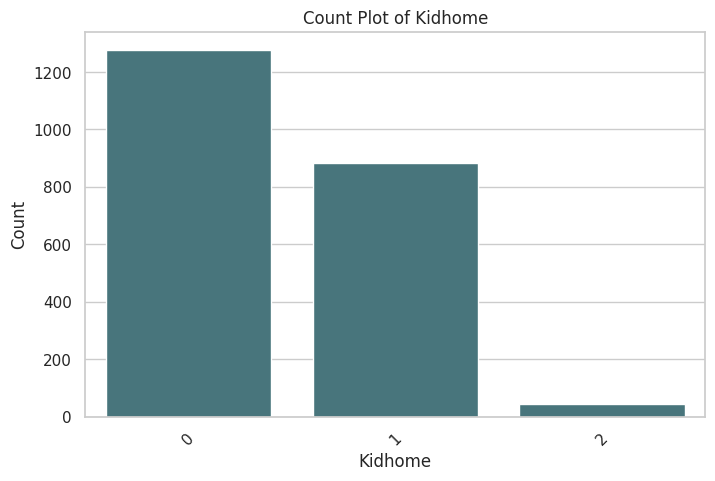

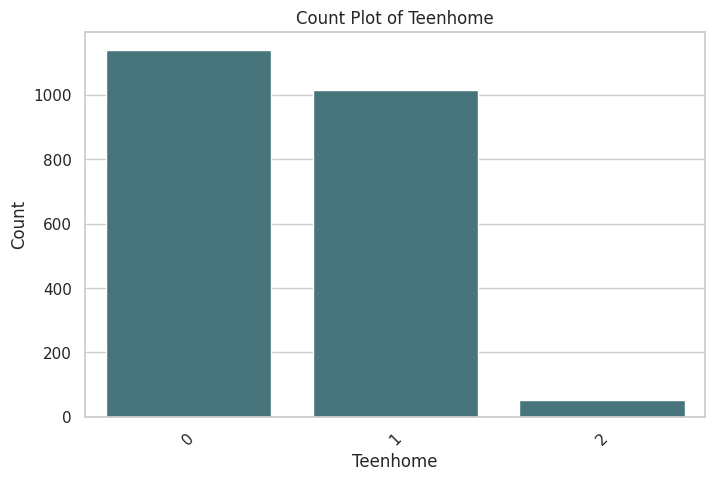

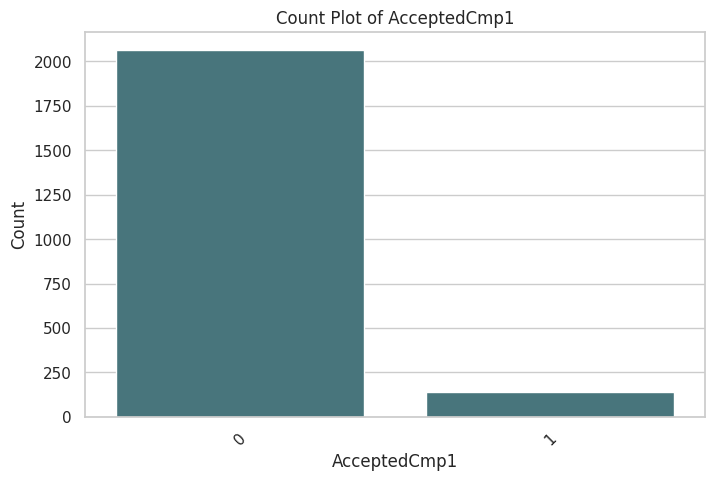

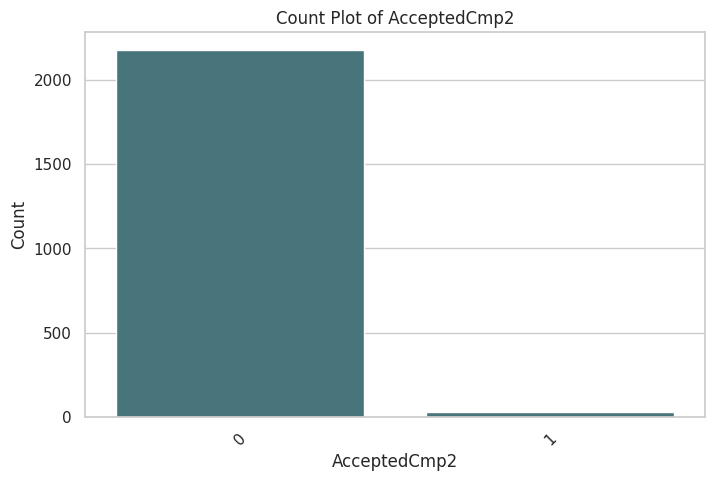

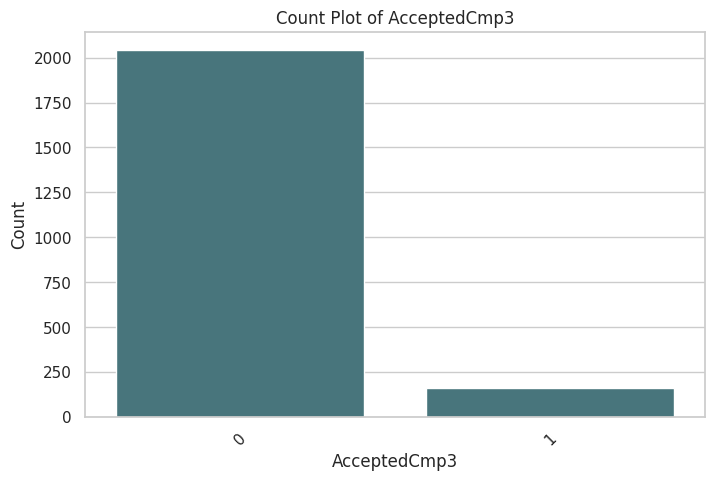

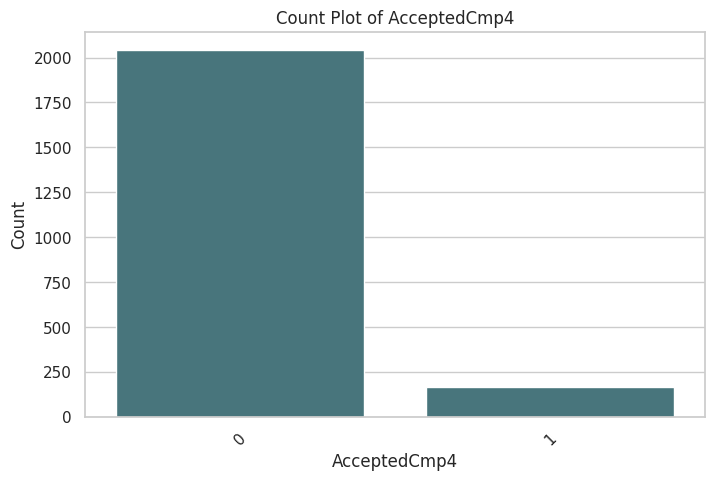

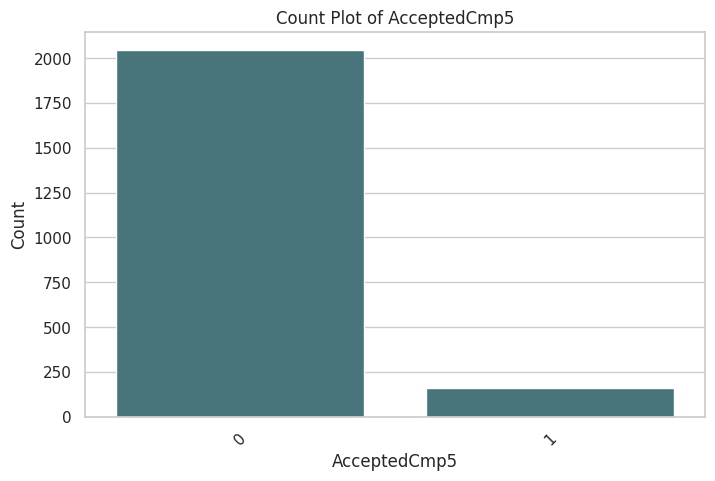

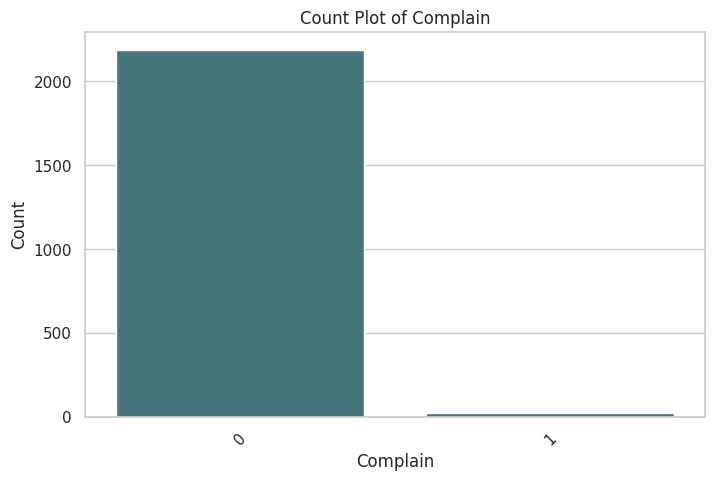

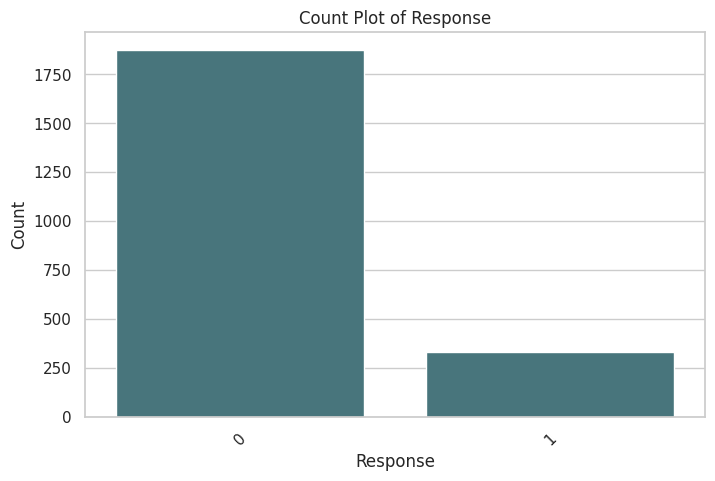

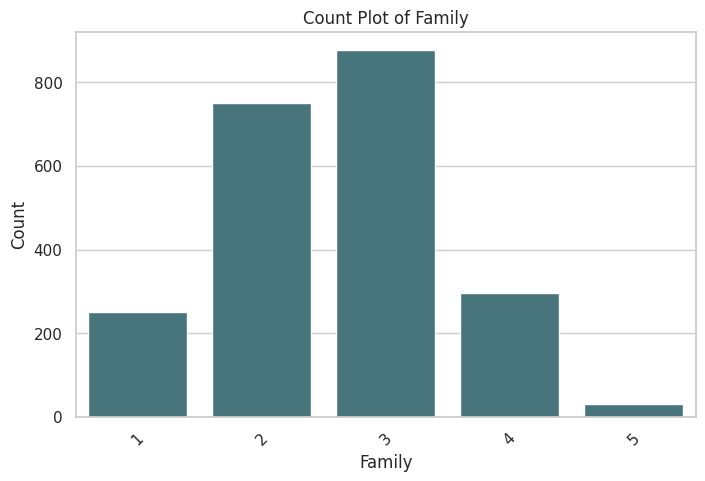

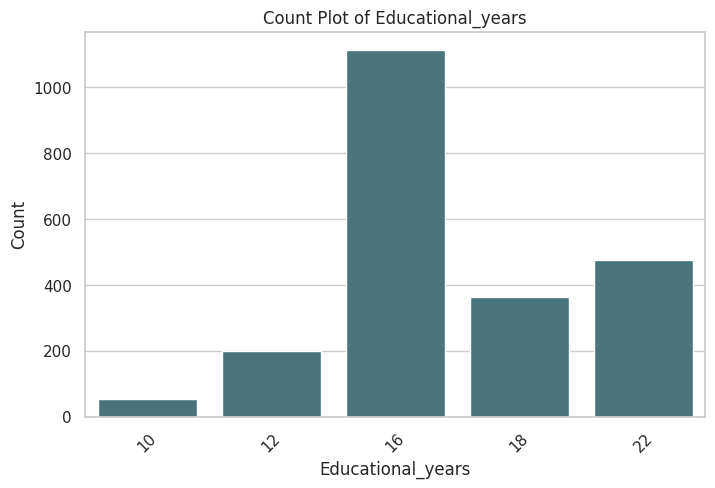

In [ ]:
numerical_vars = ['Income','Revenue_generated','Total_Purchases','TotalAmount_Spent','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                  'NumStorePurchases', 'NumWebVisitsMonth','MntRegularProds','Customer_Days','Age','Year_Birth','TotalCampaignsAcc']

categorical_vars = ['Marital_Status_Num', 'Kidhome', 'Teenhome',
                    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                    'AcceptedCmp5', 'Complain', 'Response','Family','Educational_years']

for var in numerical_vars:
  plt.figure(figsize=(8, 5))
  sns.histplot(df_no_outliers[var], kde=True)
  plt.title(f'Distribution of {var}')
  plt.xlabel(var)
  plt.ylabel('Frequency')
  plt.show()

# Box plots for numerical variables
for var in numerical_vars:
  plt.figure(figsize=(8, 5))
  sns.boxplot(y=df_no_outliers[var])
  plt.title(f'Box Plot of {var}')
  plt.ylabel(var)
  plt.show()


# Count plots for categorical variables

for var in categorical_vars:
  plt.figure(figsize=(8, 5))
  sns.countplot(x=df_no_outliers[var])
  plt.title(f'Count Plot of {var}')
  plt.xlabel(var)
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()


# **Bivariate analysis:**

---

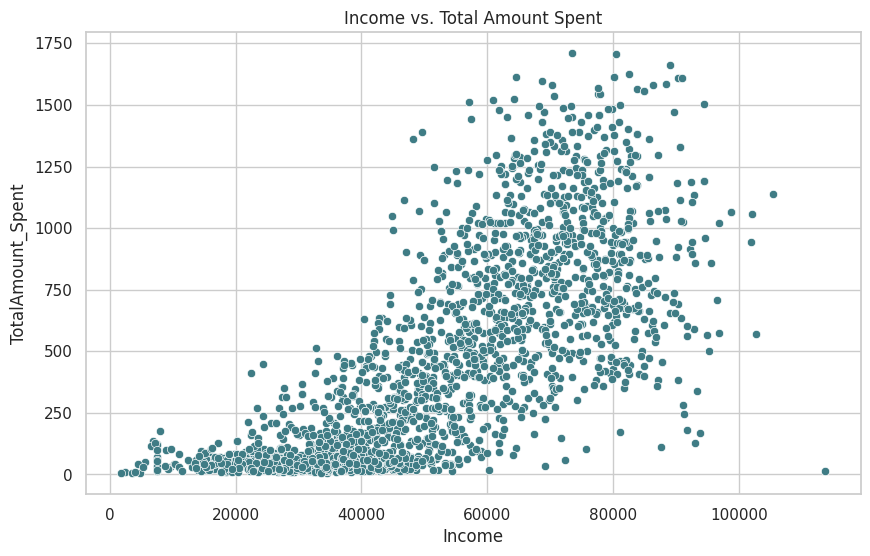

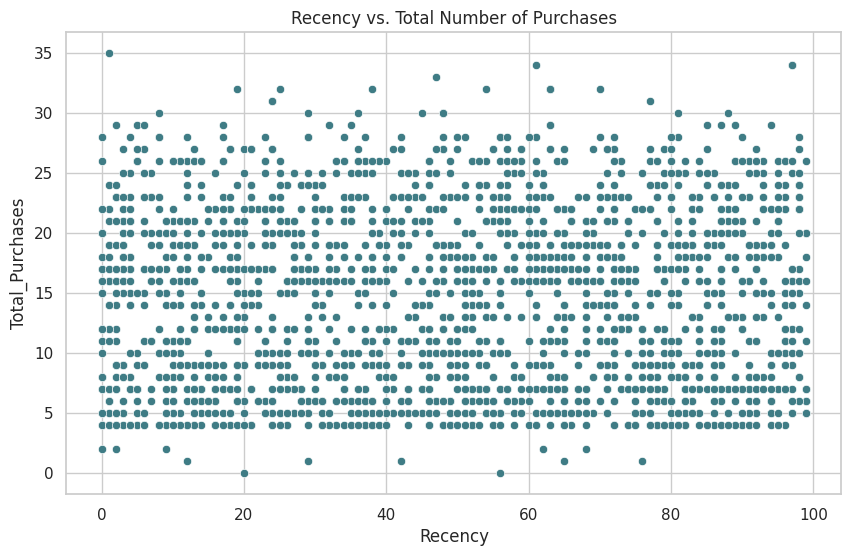

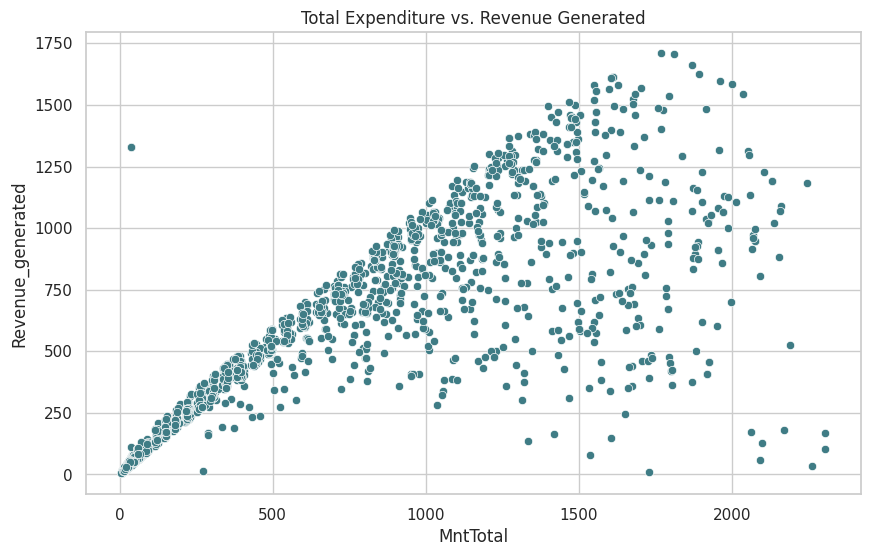

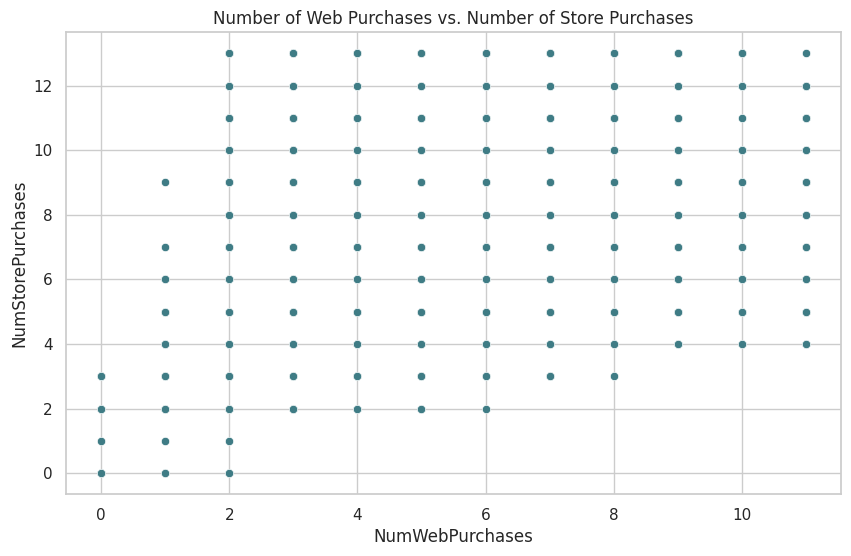

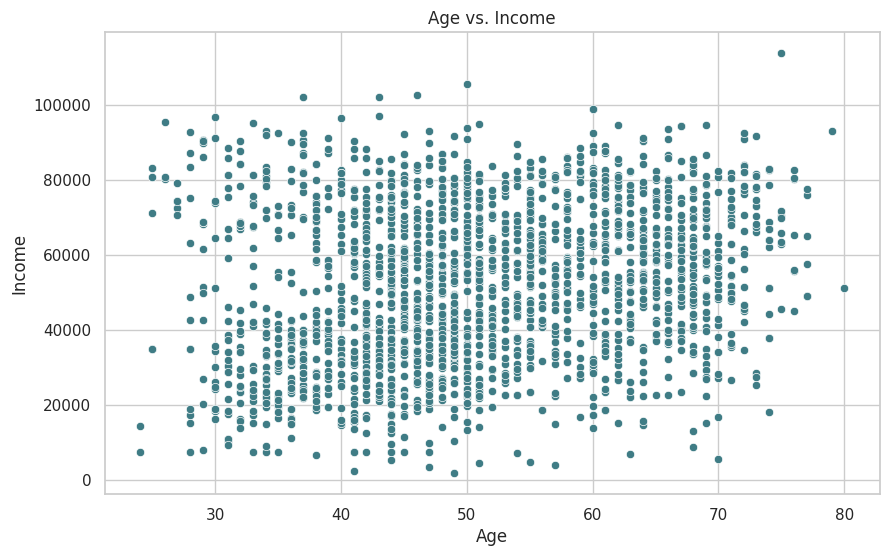

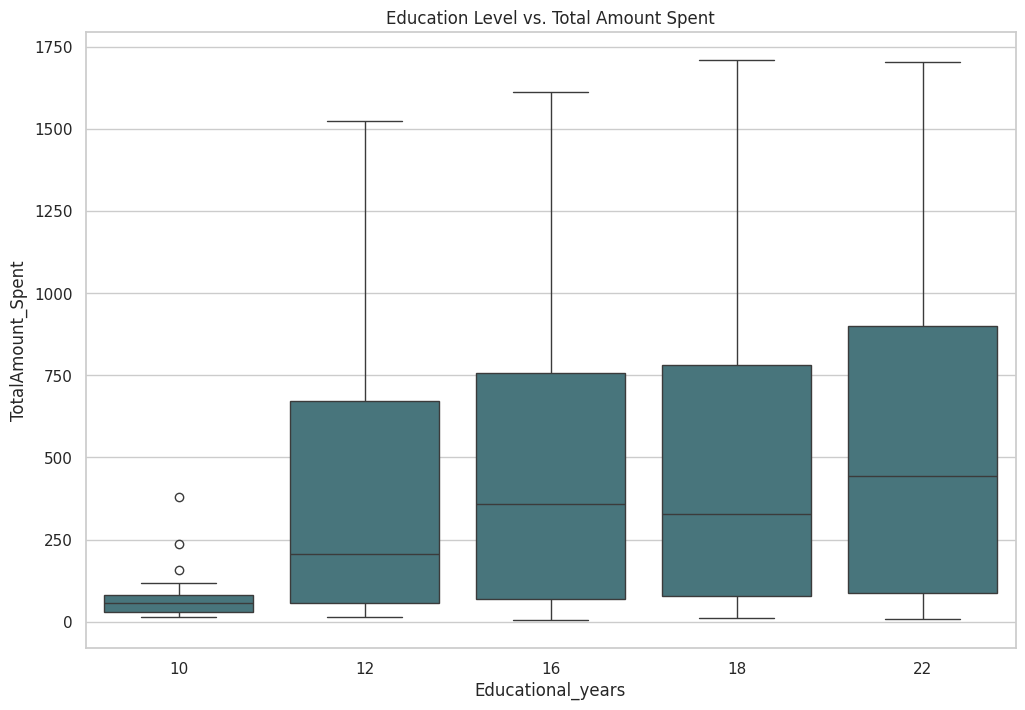

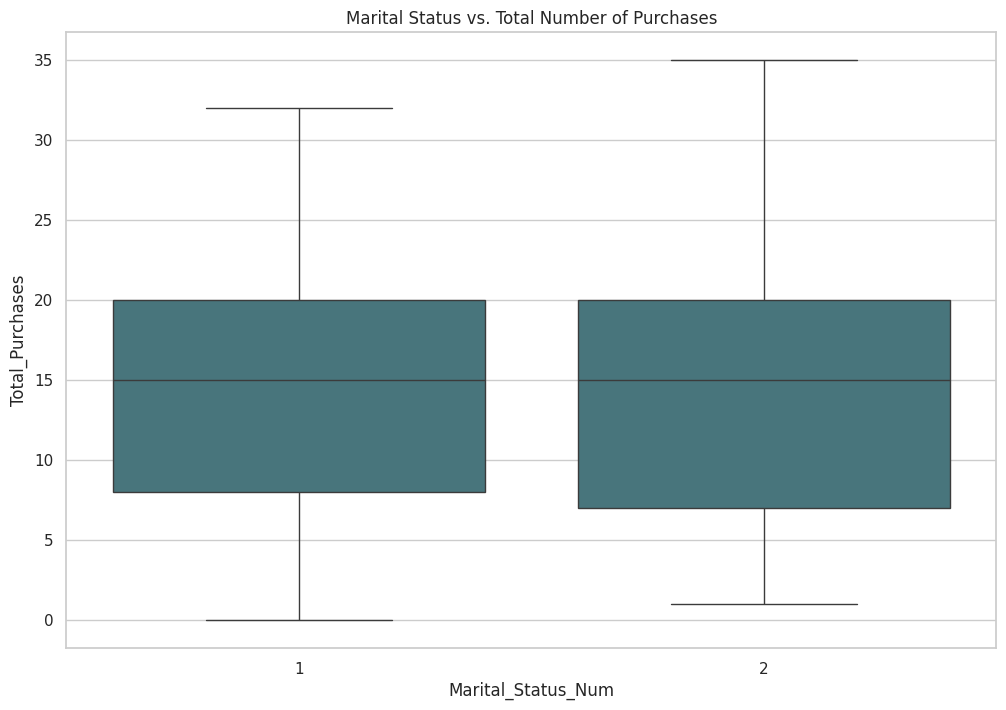

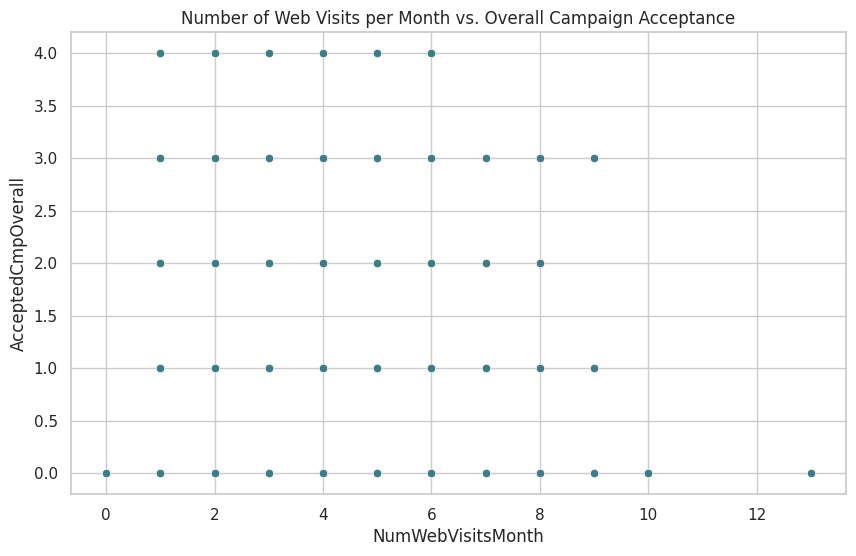

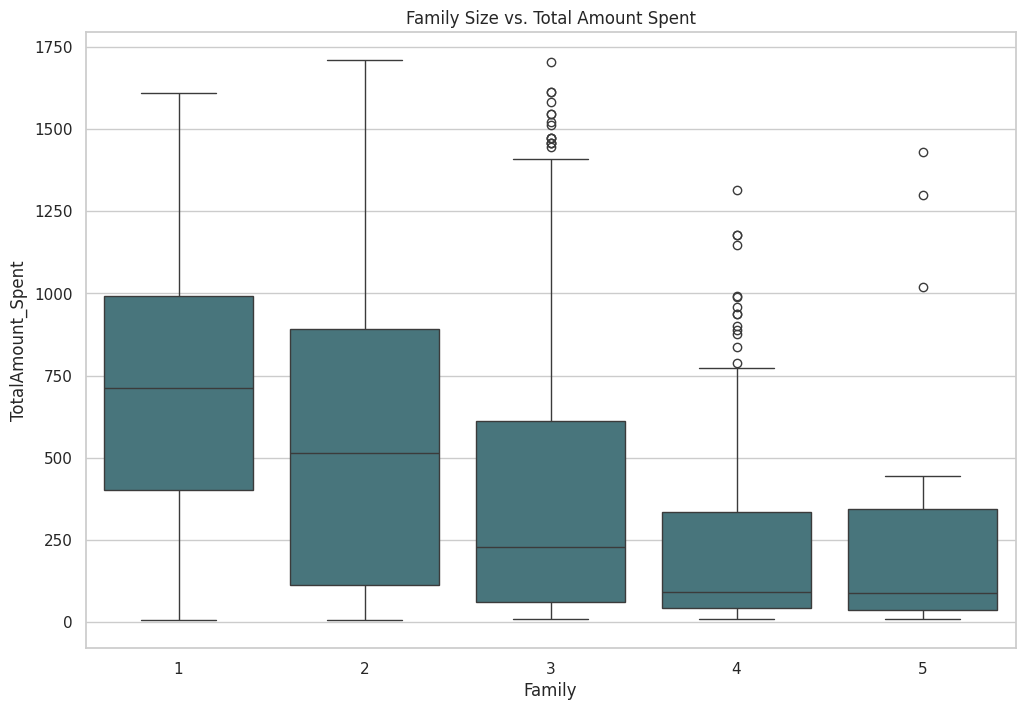

In [ ]:
# 1. Income vs. Total_Amount_Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalAmount_Spent', data=df_no_outliers)
plt.title('Income vs. Total Amount Spent')
plt.show()

# 2. Recency vs. Total_num_of_Purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Total_Purchases', data=df_no_outliers)
plt.title('Recency vs. Total Number of Purchases')
plt.show()

# 3. MntTotal vs. Revenue_generated
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntTotal', y='Revenue_generated', data=df_no_outliers)
plt.title('Total Expenditure vs. Revenue Generated')
plt.show()

# 4. NumWebPurchases vs. NumStorePurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebPurchases', y='NumStorePurchases', data=df_no_outliers)
plt.title('Number of Web Purchases vs. Number of Store Purchases')
plt.show()

# 5. Age vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df_no_outliers)
plt.title('Age vs. Income')
plt.show()

# 6. Education Level vs. Total_Amount_Spent
plt.figure(figsize=(12, 8))
sns.boxplot(x='Educational_years', y='TotalAmount_Spent', data=df_no_outliers)
plt.title('Education Level vs. Total Amount Spent')
plt.show()

# 7. Marital Status vs. Total_num_of_Purchases
plt.figure(figsize=(12, 8))
sns.boxplot(x='Marital_Status_Num', y='Total_Purchases', data=df_no_outliers)
plt.title('Marital Status vs. Total Number of Purchases')
plt.show()

# 8. NumWebVisitsMonth vs. AcceptedCmpOverall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebVisitsMonth', y='AcceptedCmpOverall', data=df_no_outliers)
plt.title('Number of Web Visits per Month vs. Overall Campaign Acceptance')
plt.show()


# 9. Family vs. Total_Amount_Spent
plt.figure(figsize=(12, 8))
sns.boxplot(x='Family', y='TotalAmount_Spent', data=df_no_outliers)
plt.title('Family Size vs. Total Amount Spent')
plt.show()



**1. analysis of Income vs. Total Amount Spent**


Visual Interpretation:

The scatter plot illustrates a positive correlation between income and total amount spent. As income increases, there's a general trend of higher spending. However, the relationship is not perfectly linear, indicating that other factors may also influence spending behavior.

The data points are somewhat spread out, indicating some variability in spending behavior even within similar income groups.

**2. Analysis of Recency vs. Total Number of Purchases**


Visual Interpretation:

The scatter plot illustrates a weak negative correlation between recency (days since the last purchase) and the total number of purchases. This suggests that customers who have made recent purchases tend to have a lower overall number of purchases compared to those who have not purchased recently.

The data points are relatively spread out, suggesting a degree of variability in the relationship between recency and purchase frequency


**3. Analysis of Total Expenditure vs. Revenue Generated**

Visual Interpretation:

The scatter plot illustrates a strong positive correlation between total expenditure and revenue generated. This indicates a direct relationship, where an increase in total expenditure is generally associated with an increase in revenue.

The data points appear to follow a linear trend, suggesting a proportional relationship between expenditure and revenue.The strong positive correlation suggests that increased spending is directly linked to higher revenue generation.


**4. Analysis of Number of Web Purchases vs. Number of Store Purchases**

Visual Interpretation:

The scatter plot illustrates a weak negative correlation between the number of web purchases and the number of store purchases. This suggests that customers who tend to make more purchases online are generally less likely to make frequent store purchases, and vice versa.

Different customers may have distinct preferences for shopping online or in-store, based on factors such as convenience, product availability, or personal habits.

The availability of specific products or brands online or in-store could influence customer purchasing decisions.

**5. Analysis of Age vs. Income Scatter Plot**

There appears to be a general positive correlation between age and income. This suggests that as age increases, income tends to increase as well.


**6. Analysis of Education Level vs. Total Amount Spent**

Key Observations:

As the educational level increases (from 10 to 22 years), the median and overall distribution of total amount spent tend to shift upwards. This suggests a positive correlation between education level and spending.

Individuals with higher education levels may have higher incomes, allowing them to spend more.


**7. Analysis of Marital Status vs. Total Number of Purchases**

Key Observations:

Minimal Difference: The box plots for the two marital status groups (1 and 2) appear very similar, indicating that there is no significant difference in the distribution of total number of purchases between them.

The data suggests that marital status may not be a strong predictor of total number of purchases.

**8. Analysis of Number of Web Visits per Month vs. Overall Campaign Acceptance**

Key Observations:

Limited Correlation: There appears to be a weak, if any, correlation between the number of web visits per month and overall campaign acceptance. The data points are scattered, with no clear pattern or trend

The data points tend to cluster around certain values of AcceptedCmpOverall, indicating that some levels of campaign acceptance are more common than others.

**9. Analysis of Family Size vs. Total Amount Spent**

Key Observations:

Decreasing Spending with Larger Families: As family size increases
(from 1 to 5), the median and overall distribution of total amount spent tend to shift downwards. This suggests a negative correlation between family size While the general trend is downward, there is still significant variability within each family size. This indicates that other factors besides family size, such as income, lifestyle, and personal preferences, influence spending behavior.

# ***Section 03: Data Visualization***

# **Which marketing campaign is most successful?**

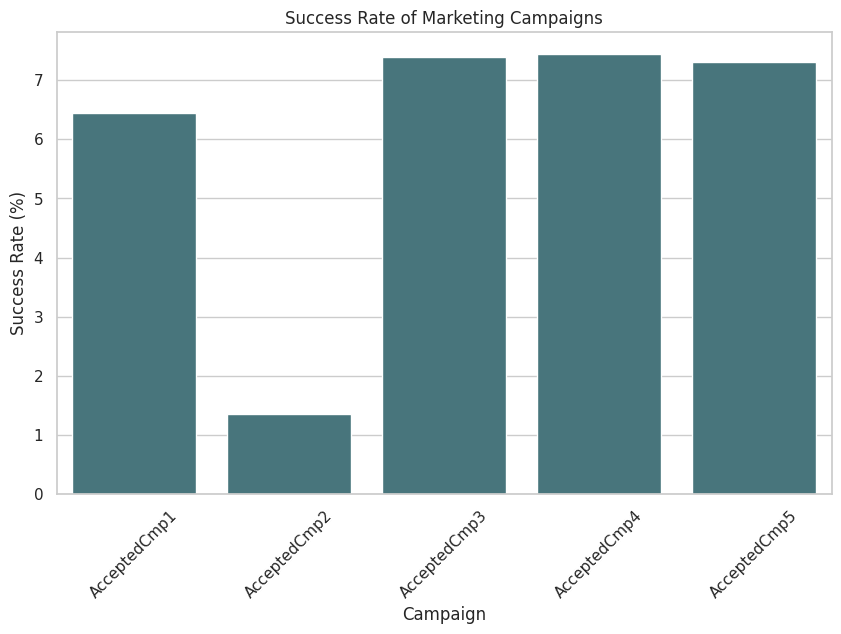

In [ ]:
campaign_success = df_no_outliers[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_success.index, y=campaign_success.values)
plt.title('Success Rate of Marketing Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.show()


**Campaign 3 and 4 Dominate:** AcceptedCmp3 and AcceptedCmp4 have achieved the highest success rates, indicating their effectiveness in engaging customers.

**Campaign 1 and 5 Underperform:** These campaigns have significantly lower success rates, suggesting that their strategies or messaging may need to be revised.

**Campaign 2 Shows Moderate Success:** AcceptedCmp2 has a moderate success rate, falling between the top-performing and underperforming campaigns.


**Recommendations:**

Leverage Insights from Successful Campaigns, Reassess Underperforming Campaigns

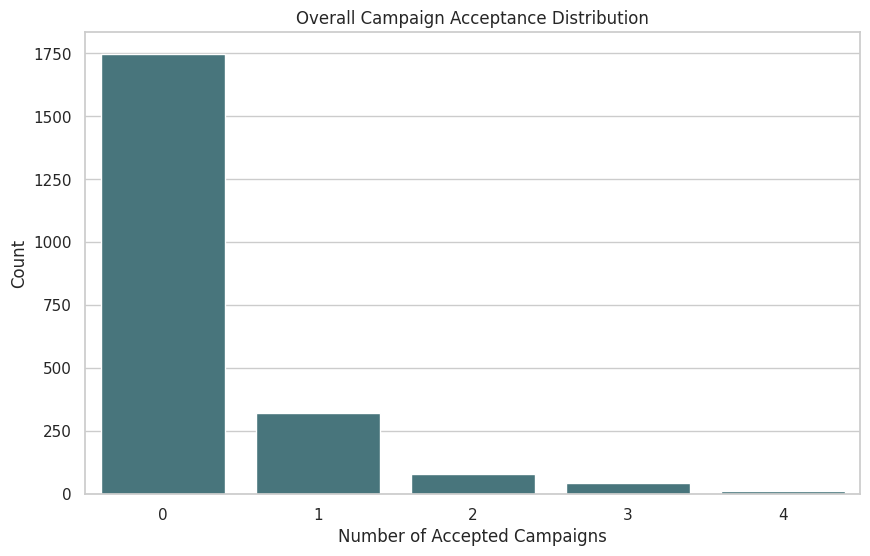

In [ ]:
accepted_counts_dis = df_no_outliers['AcceptedCmpOverall'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accepted_counts_dis.index, y=accepted_counts_dis.values)
plt.title('Overall Campaign Acceptance Distribution')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Count')
plt.show()


AcceptedCmp1    142
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    164
AcceptedCmp5    161
dtype: int64


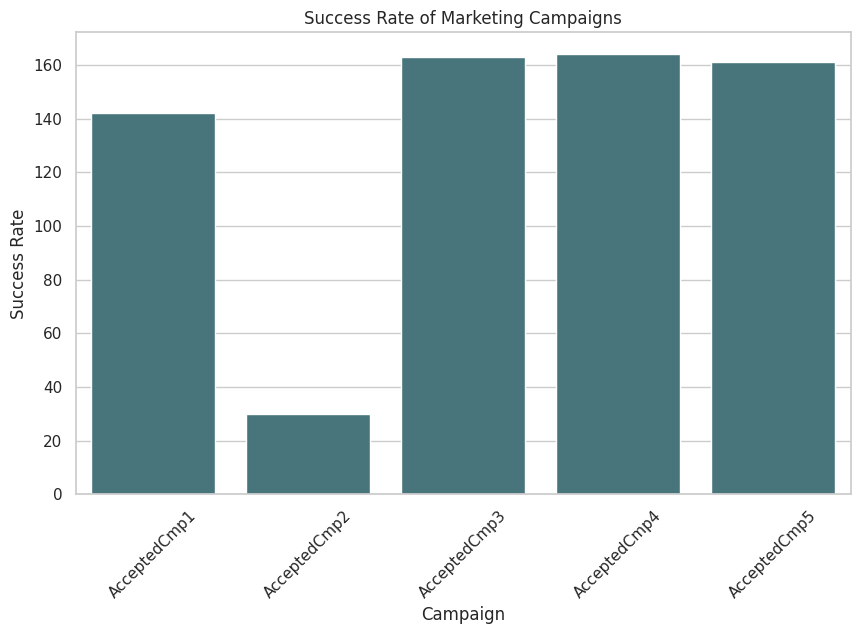

In [ ]:
accepted_counts = df_no_outliers[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
print(accepted_counts)


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accepted_counts.index, y=accepted_counts.values)
plt.title('Success Rate of Marketing Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

Display the total amount spent by a customer in each product category.

# **Display the total amount spent by a customer in each product category.**



---



**MntWines Dominates:** MntWines has emerged as the top-performing product category, generating significantly more revenue than the others.

**MntFruits and MntFishProducts Underperform:** These categories have generated considerably lower revenue compared to MntWines and MntMeatProducts.

**MntSweetProducts and MntGoldProds Lag Behind:** These categories have the lowest revenue, indicating less customer interest or lower profit margins.

**Can be due to :**
Customer Preferences,Product Availability or Variety,Marketing and Promotion

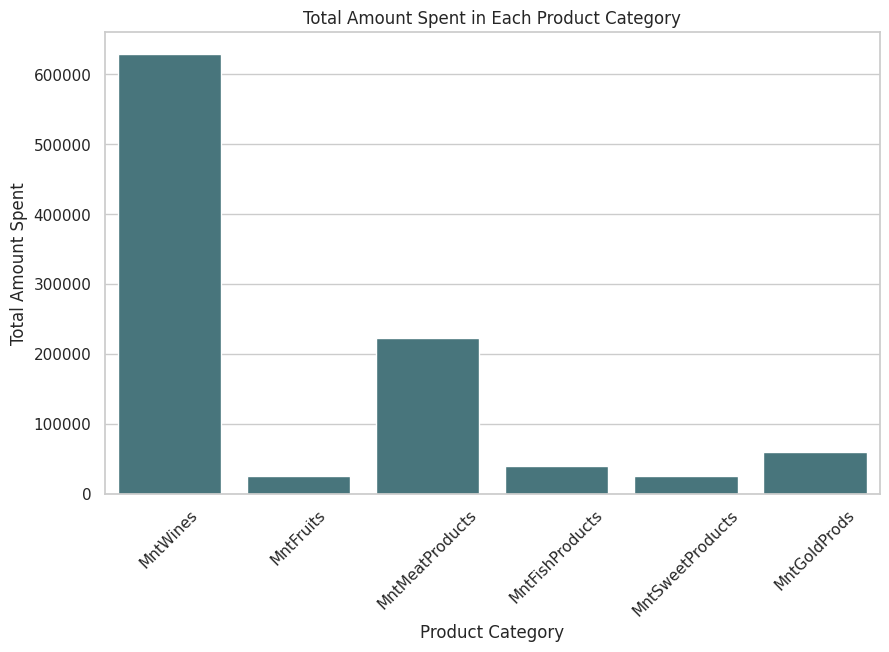

In [ ]:
total_spending = df_no_outliers[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                                'MntSweetProducts', 'MntGoldProds']].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_spending.index, y=total_spending.values)
plt.title('Total Amount Spent in Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()


# **What is the average spending in each age group?**

<ipython-input-35-a4700f77a369>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spending_by_age = df_no_outliers.groupby('Age_Group')['TotalAmount_Spent'].mean()


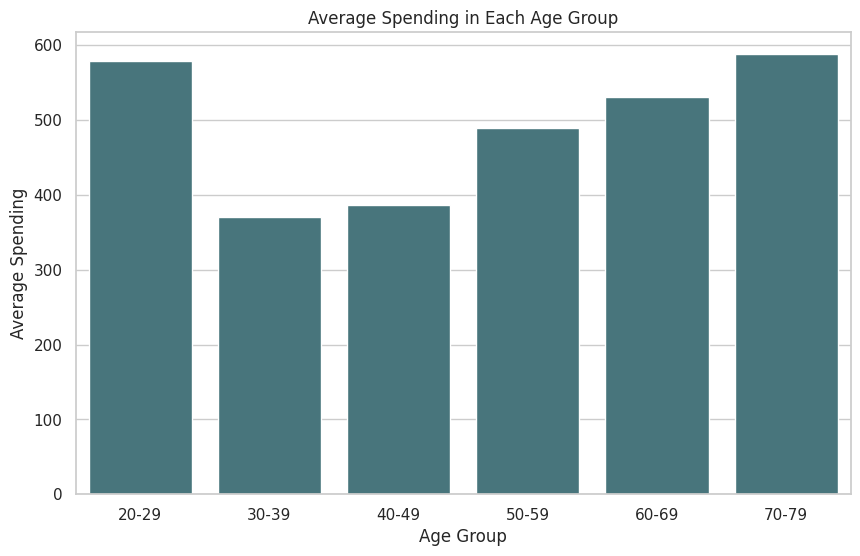

In [ ]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_no_outliers['Age_Group'] = pd.cut(df_no_outliers['Age'], bins=bins, labels=labels, right=False)

average_spending_by_age = df_no_outliers.groupby('Age_Group')['TotalAmount_Spent'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_spending_by_age.index, y=average_spending_by_age.values)
plt.title('Average Spending in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()

# **Which products are performing best, and which are performing the least in terms of revenue? Analyze the data and plot a suitable graph to display a report on revenuegenerated by different products**

**MntWines Dominates:** MntWines has emerged as the top-performing product category, generating a total revenue of 680,000. This suggests that wine products are particularly popular among the customer base.

**MntFruits Underperforms:** MntFruits, on the other hand, has generated the least revenue. This may indicate that fruit products are less in demand or have lower profit margins compared to other categories.



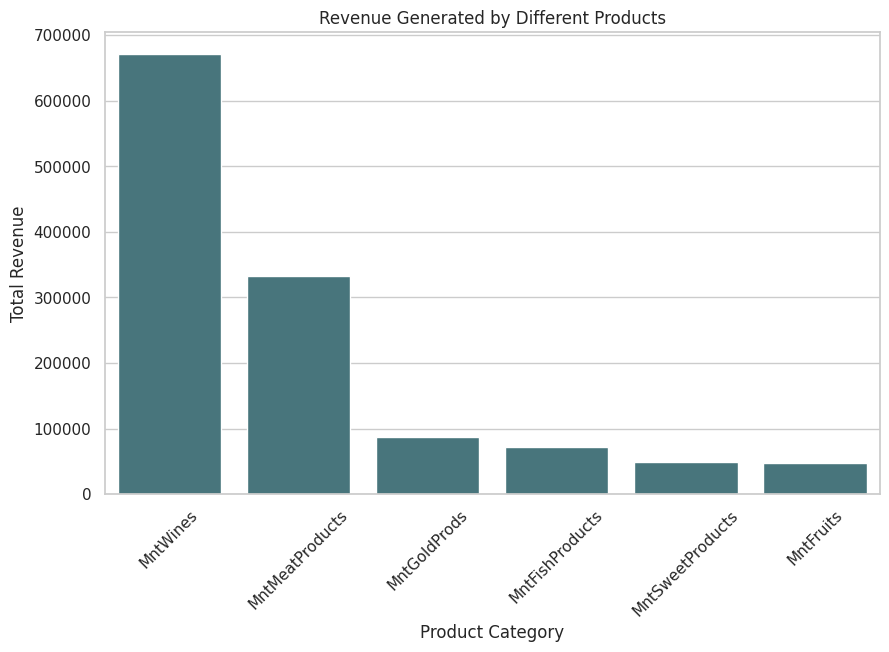

Revenue Generated by Different Products (Descending Order):
MntWines: 671236.0
MntMeatProducts: 332819.0
MntGoldProds: 87343.0
MntFishProducts: 71179.0
MntSweetProducts: 49172.0
MntFruits: 47675.5

Best Performing Product: MntWines
Least Performing Product: MntFruits


In [ ]:
product_revenue = df_no_outliers[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                                    'MntSweetProducts', 'MntGoldProds']].sum()


product_revenue_sorted = product_revenue.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue_sorted.index, y=product_revenue_sorted.values)
plt.title('Revenue Generated by Different Products')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

print("Revenue Generated by Different Products (Descending Order):")
for product, revenue in product_revenue_sorted.items():
    print(f"{product}: {revenue}")


best_performing_product = product_revenue_sorted.index[0]
least_performing_product = product_revenue_sorted.index[-1]

print(f"\nBest Performing Product: {best_performing_product}")
print(f"Least Performing Product: {least_performing_product}")


# **Data-Driven Recommendations and Suggestions**


**Leverage Wine and Meat Product Success:** Given the strong performance of MntWines and MntMeatProducts, consider expanding the product ranges or offering exclusive experiences related to these categories to further capitalize on their popularity.

**Revamp Underperforming Categories:** Analyze customer preferences and market trends to identify opportunities for improvement in MntFruits and MntFishProducts, such as introducing new products, adjusting pricing, or enhancing marketing efforts.

**Targeted Marketing**


**Focus on Mature Demographic:** Given the observed interest in shopping among individuals aged 50-79, implement targeted marketing campaigns specifically tailored to this demographic. Consider their family and household needs when developing offers and messaging.

**Optimize Campaign Strategies:** Learn from the success of AcceptedCmp3 and AcceptedCmp4. Analyze their strategies to identify key factors contributing to their effectiveness and apply these insights to future campaigns.

**Omnichannel Strategy**

**Enhance Online Presence:** Optimize the online shopping experience to attract and retain customers.

**Focus on Customer Loyalty:** Implement loyalty programs or rewards systems to encourage repeat purchases and build customer loyalty.
